# 프로야수 투수의 연봉 예측 프로젝트

> 1983-1988에 활동했던 최동원 선수가 현재라면 얼마의 연봉을 받을 수 있을지 예측하는 프로젝트이다.


연봉을 예측하기위한 머신러닝 알고리즘으로 다중회귀분석을 사용한다.

$$ 
\Large {y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n} 
$$

- 연봉이라는 결과값을 도출하기 위한 독립변수로 투수의 성적을 나타내는 지표들($x_1,~x_2,~\cdots,~x_n$)을 Features로 사용한다.

- 우선 투수의 성적을 나타내는 지표들로 무엇을 사용해야 할지 알기 위해 각각의 지표가 무엇을 의미하는지 조사가 필요했다.

- 2개의 논문을 참조하였다.

1. 한양대 글로벌스포츠산업학과 전홍권님 논문 : [한국프로야구 투수 연봉 평가 척도에 영향을 미치는 경기력 변수 분석](https://repository.hanyang.ac.kr/handle/20.500.11754/124799)

2. 서울대 체육교육과 황수웅님 논문 : [프로야구 선수의 가치 평가 요인 탐색(연봉 결정요인 분석)](https://s-space.snu.ac.kr/bitstream/10371/142067/1/000000150483.pdf)

	어떤 특성들을 컬럼으로 쓰면 좋은지 확인해 보았다.

👉 결론

- 두 개의 그룹으로 특성 데이터로 나누어 모델링을 시행한다.

1. **투수의 경기력을 측정한 전통적인 통산 기록 및 기존 지표**

	- 출장 (`G`)		 출장 경기, 게임 횟수 <br></br>
	- 완투 (`CG`)		 선발투수가 경기의 모든 이닝을 던졌을 때 <br></br>
	- 완봉 (`SHO`)		 선발투수가 경기의 모든 이닝을 무실점으로 던졌을 때 <br></br>
	- 선발 (`GS`, starting pitcher) <br></br>
	- 승 (`W`, win) <br></br>
	- 패 (`L`, lose) <br></br>
	--> 승, 패를 승률로 대체한다. <br></br>
	- 승률 (`WPCT`, winning percentage = W / (W+L)) - 게임 횟수에서 승리한 경기 기록 <br></br>
	- 세이브 (`SV`, save) - 마무리 투수를 평가할 때 많이 사용하는 지표로, 역전을 허용하지 않고 경기를 마무리했을 때 주어지는 기록 <br></br>
	- 홀드 (`HLD`, hold) - 구원 투수가 세이브 요건을 충족했으나, 경기 종료 전에 물러났을 경우 부여하는 기록 <br></br>
	- 이닝 (`IP`, inning piched) - 투수의 투구 이닝수 <br></br>
	- 실점 (`R`, runs) - 득점 당한 갯수 <br></br>
	- 자책 (`ER`, earned run) - 투수가 허용한 자책점 (안타, 희생플라이, 희생타, 사사구, 폭투, 야수선택, 도루에 의해 책임주자가 득점을 한 경우) <br></br>
	- 타자 (`TBF`) - 상대타자수 <br></br>
	- 안타 (`H`, hits) - 피안타, 안타를 맞은 갯수 <br></br>
	- 홈런 (`HR`, home runs) - 홈런을 맞은 개수 <br></br>
	- 볼넷 (`BB`, bases on balls) - 볼 넷의 갯수(볼넷이 많을 수록 제구를 의심) <br></br>
	- 고4 (`IBB`) - 고의 사구의 수 <br></br>
	- 사구 (`HBP`, hit by pitch) - 타자 몸에 맞는 데드볼 <br></br>
	- 삼진 (`SO`, strike out) - 탈삼진, 삼진 아웃 수 <br></br>
	- 보크 (`BK`, baulk(balk)), 부정 투구 동작으로 인한 반칙 행위, 주자는 한 루씩 안전 진루권 획득
		- 투수판에 선 투수가 투구 동작에 들어간 뒤 투구를 하지 않을 경우
		- 투수판에 선 투수가 1루에 송구하는 흉내만 내고 송구를 하지 않을 경우
		- 투수판에 선 투수가 견제를 할 때 견제를 하려는 루의 방향으로 발을 정확히 내딛지 않고 던진 경우 등 <br></br>
	- 폭투 (`WP`, wild pitch) - 투수가 던진 공이 원바운드, 혹은 노바운드로 포수의 글러브에 들어가지 않는 경우 <br></br>
	- `ERA`(Earned Run Average, 평균자책점, <방어율 = (총자책점$\,\times\,9$) / 등판 이닝 수>): </br>
		투수에게만 해당되는 확률로, 낮을 수록 투수가 점수를 허용하지 않았다는 뜻이다.</br>
		투수를 평가하는 대표적인 지표로, 9이닝 당 자책점을 의미한다. <br></br>

2. **기존 지표에 비해 정교하고 세분화된 투수의 세이버메트릭스(Sabermetrics) 지표 활용**

	$~❕~$ 세이버메트릭스는 야구 경기에서 발생하는 기록들을 활용하여 통계적, 수학적으로 분석하는 기법을 의미한다. <br></br>
	$~❕~$ 창립자 중 한 명인 빌 제임스(Bill James)는 세이버메트릭스를 ‘야구에 대한 객관적 지식을 찾고자 하는 연구’라고 정의하였고, </br>
	$~~~~$ 그 목적은 선수의 가치와 경기력을 정량화하는 것이라고 하였다. <br></br>
	$~❕~$ 다년간 축적한 통계 데이터를 분석하는 세이버메트리션(sabermetrician)들은 팀의 도움 및 외적 요소와 무관하게 투수 자신의 책임으로 이루어진 통계량이다.<br></br>
	$~❕~$ 각종 세이버메트릭스(sabermetrics) 지표는 투수의 평가에 중요한 잣대가 되고 있다. <br></br>
	$~❕~$ 세이버메트릭스는 득점 및 승리와의 상관관계가 높은 만큼 이에 기초하여 파생된 지표를 활용하여 선수의 능력을 평가하는 것은 </br>
	$~~~~$ 기존 지표를 활용하는 것 보다 더 합리적이다.<br></br>

	- `WAR`【Wins Above Replacement, 대체 선수 대비 승리 기여】 : 선수가 팀 승리에 얼마나 기여했는지 알 수 있는 지표로 높을수록 팀 기여도가 높다.

	- `ERA`【Earned Run Average, 평균자책점, 방어율 = (총자책점$\,\times\,9$) / 등판 이닝 수】:

		투수를 평가하는 대표적인 지표로, 9이닝 당 자책점을 의미한다.<br></br>

	- `FIP`【Fielding Independent Pitching, 수비 무관 추정 평균 자책점 = {(13×피홈런 + 3×(볼넷-고4+사구) - 2×삼진) / 이닝} + C(보통 3.20, 리그 ERA에 맞게 조정)】

		- 홈런, 삼진을 제외한 인플레이 타구는 투수기록에 투수 외적인 수비능력이 반영된다.</br>
		- 이러한 BABIP와 달리 투수가 통제가능한 영역만으로 투수를 평가하는 지수이다.<br>
		- FIP는 투수가 통제가능한 영역인 삼진, 볼넷, 홈런기록만으로 투수의 능력을 나타낸다. </br>
		- 팀의 수비능력이 반영되는 지수인 ERA와 같은 형태로 나타내기에, 투수의 독립적인 경기력을 ERA와 비교하여 쉽게 살펴볼 수 있다는 장점이 있다.
		- C는 Constant의 약자로 리그 ERA와 비슷한 값을 갖도록 더해주는 상수이다. 일반적으로 3.20 정도의 값을 더해준다.	<br></br>


	- `ERA+`【조정 평균자책점 = (득점 파크팩터 적용 평균자책점) / (리그 평균자책점)】 : 리그 평균자책점 대비 우위를 보여주는 비율지표.

		- 100이 평균이며, 높을수록 좋은 투수라고 입증할 수 있다.<br></br>

	- `FIP+` = (득점 파크팩터 적용 FIP) / (리그 평균 실점율) : ERA+와 같은 조정지표이자 비율지표

		- 리그 평균 실점율 대비 우위를 보여주는 지표로 100이 평균이며, 높을수록 좋은 투수라고 입증할 수 있다.<br></br>

	- `K/9` = 탈삼진×9 / 이닝 : 9이닝 동안의 탈삼진 개수로, 9이닝을 기준으로 하였기에 선발투수의 삼진 능력을 평가하는 기준이 된다.

		- 9를 곱하는 이유는 9이닝을 던졌을 때를 기준으로 보기 위함이다. <br></br>

	- `BB/9` = 볼넷×9 / 이닝 : 9이닝 동안 허용한 볼넷의 개수를 의미로, 투수의 제구력을 평가하는 기준으로 쓰인다.<br></br>

	- `K/BB` = 탈삼진 / 볼넷<br></br>

	- `HR/9` = 홈런×9 / 이닝<br></br>

	- `K%` = 삼진 / 상대타자<br></br>

	- `BB%` = 볼넷 / 상대타자<br></br>

	- `PFR` = (삼진+볼넷) / 이닝<br></br>

	- `BABIP`【, 인플레이된 타구의 비율 = (안타-홈런) / (타수-삼진-홈런+희비)】 

		- 인플레이로 이어진 타구에 대한 타율을 계산하는 수치이다.
	    - 홈런, 삼진을 제외한 인플레이 타구는 수비수의 능력이 투수 평가에 영향을 미치기에 BABIP가 야구 통계학자들에 의해 고안되었다. 
		- 투수의 경우 해당 수치가 리그 평균보다 높으면 수비의 도움을 받지 못한 것으로 판단할 수 있다.<br></br>

	- `LOB%`【, 잔루율 = (안타+볼넷+사구-실점) / (안타+볼넷+사구-(1.4×홈런))】<br></br>

	- `WHIP`【Walks plus Hits divided by Innings Pitched, 이닝 당 출루 허용률, 이닝 당 평균 출루율 = (볼넷+피안타) / 이닝】

		- 피안타와 볼넷 허용 개수를 이닝으로 나눈 수치이다. 
		- 단순한 계산으로 쉽게 투수의 성적을 쉽게 이해하고 평가할 수 있기에 최근 야구 중계 방송에 자주 나타나는 기록이다. 
		- 하지만 몸에 맞는 볼과 장타를 평가 요소에서 배제했다는 비판 또한 따른다.<br></br>

	- `WHIP+`【, = (볼넷+사구+피안타) / 이닝】<br></br>

	- `IP/G` (경기당 이닝)

<br></br>

<참고> **FIP**와 **탈삼진 수**, **선발등판 경기 수**, **연령**이 연봉 인상에 유의미한 영향을 주는 변수로 나타났다.

<br></br>

# 문제 1. Data

> 우리 과제는 최동원의 롯데 시절 1983년부터 1988년의 데이터를 사용하도록 하겠습니다.
> 최동원의 당시 데이터와 함께 1983년부터 1988년 사이 투수들의 데이터(연봉포함)를 구하고, 2015년부터 2020년까지 프로야구의 투수들의 데이터를 구하시오.
>
> 모든 투수의 데이터를 구하기 어려울 수도 있습니다. 모두 구할 필요는 없습니다.
> 그러나 선발/마무리에 대해서는 고민하기 바랍니다. 왜냐하면 최동원은 선발로도, 혹은 마무리로도 활동을 했기 때문입니다.

## Dataset 1.

- https://enook.jbnu.ac.kr/contents/138/#!/p/4

In [3]:
import pandas as pd

pitcher = pd.read_csv("./머신러닝 과제/retired_pitcher.txt", sep='\t')
pitcher
#salary

선수명           생년월일                 출신교     출신    연도   팀명  평균자책점  경기  \
0      가내영  1971년 03월 29일  제물포고-태평양-쌍방울-SK-해태     한국  1991  태평양   2.25   3   
1      가내영  1971년 03월 29일  제물포고-태평양-쌍방울-SK-해태     한국  1992  태평양   5.47  20   
2      가내영  1971년 03월 29일  제물포고-태평양-쌍방울-SK-해태     한국  1993  태평양   3.36  25   
3      가내영  1971년 03월 29일  제물포고-태평양-쌍방울-SK-해태     한국  1994  태평양   5.03  11   
4      가내영  1971년 03월 29일  제물포고-태평양-쌍방울-SK-해태     한국  1995  태평양   5.01  23   
...    ...            ...                 ...    ...   ...  ...    ...  ..   
3029   황태환  1952년 08월 06일                 한양대     한국  1987   OB   5.48  28   
3030   황태환  1952년 08월 06일                 한양대     한국  1988   OB   6.52  23   
3031   황태환  1952년 08월 06일                 한양대     한국  1989   OB   0.00   2   
3032   후타도  1970년 02월 01일           베네주엘라 라라고  베네수엘라  2004   LG   5.79   6   
3033  히메네스  1980년 10월 27일   도미니카 EXP.U.A.S.D고   도미니카  2010   두산   3.32  27   

      완투  완봉  ...     승률   타자       이닝  피안타  피홈런  볼넷 사구  탈삼진  실점  자책점  
0      0   0  ...  0.000   16        4    3    1   1  0    3   1    1  
1      1   0  ...  0.438  474      107  128   10  47  4   49  69   65  
2      5   0  ...  0.538  521  128 2/3  111    9  34  3   57  51   48  
3      0   0  ...  1.000  154       34   44    3   8  1   15  21   19  
4      3   1  ...  0.364  415       97  109   11  23  1   55  59   54  
...   ..  ..  ...    ...  ...      ...  ...  ...  .. ..  ...  ..  ...  
3029   0   0  ...  0.400  280   65 2/3   73    6  20  1   20  42   40  
3030   1   0  ...  0.000  221   49 2/3   58    7  21  1   11  38   36  
3031   0   0  ...  0.000    6        1    2    0   1  0    1   0    0  
3032   0   0  ...  0.000  138       28   36    1  21  2   13  24   18  
3033   1   0  ...  0.737  654      152  139    7  62  9   87  65   56  

[3034 rows x 24 columns]

In [5]:
pitcher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     3034 non-null   object 
 1   생년월일    3034 non-null   object 
 2   출신교     3033 non-null   object 
 3   출신      3034 non-null   object 
 4   연도      3034 non-null   int64  
 5   팀명      3034 non-null   object 
 6   평균자책점   3034 non-null   float64
 7   경기      3034 non-null   int64  
 8   완투      3034 non-null   int64  
 9   완봉      3034 non-null   int64  
 10  승       3034 non-null   int64  
 11  패       3034 non-null   int64  
 12  세       3034 non-null   int64  
 13  홀       3034 non-null   int64  
 14  승률      3034 non-null   float64
 15  타자      3034 non-null   int64  
 16  이닝      3034 non-null   object 
 17  피안타     3034 non-null   int64  
 18  피홈런     3034 non-null   int64  
 19  볼넷      3034 non-null   int64  
 20  사구      3034 non-null   int64  
 21  탈삼진     3034 non-null   int64  
 22  

In [6]:
pitcher.isnull().sum()

선수명      0
생년월일     0
출신교      1
출신       0
연도       0
팀명       0
평균자책점    0
경기       0
완투       0
완봉       0
승        0
패        0
세        0
홀        0
승률       0
타자       0
이닝       0
피안타      0
피홈런      0
볼넷       0
사구       0
탈삼진      0
실점       0
자책점      0
dtype: int64

In [46]:
pitcher_1983_88 = pitcher[(pitcher['연도']>1982) & (pitcher['연도']<1989)].sort_values(by='연도').reset_index(drop=True)
pitcher_1983_88.drop(columns=['출신교','출신'], inplace=True)
pitcher_1983_88

선수명           생년월일    연도   팀명  평균자책점  경기  완투  완봉   승   패  ...     승률  \
0     감사용  1957년 03월 23일  1983   삼미   2.92   6   0   0   0   0  ...  0.000   
1     성낙수  1957년 08월 12일  1983   삼성   4.91  19   0   0   3   2  ...  0.600   
2    선우대영  1957년 09월 12일  1983   OB   3.91  17   5   1   4   6  ...  0.400   
3     김용남  1958년 02월 26일  1983   해태   2.83  35   6   3  13  10  ...  0.565   
4     오영일  1960년 02월 06일  1983  MBC   2.91  36   7   0  10   9  ...  0.526   
..    ...            ...   ...  ...    ...  ..  ..  ..  ..  ..  ...    ...   
424   문병권  1965년 04월 04일  1988  MBC   3.72  19   2   1   1   3  ...  0.250   
425   이척기  1962년 05월 25일  1988  빙그레   3.86   4   0   0   0   0  ...  0.000   
426   문희수  1965년 03월 15일  1988   해태   3.02  26   4   1   8   7  ...  0.533   
427   장호연  1960년 05월 05일  1988   OB   3.95  36   3   1   8  12  ...  0.400   
428   황태환  1952년 08월 06일  1988   OB   6.52  23   1   0   0   2  ...  0.000   

      타자       이닝  피안타 피홈런  볼넷  사구  탈삼진  실점  자책점  
0     51   12 1/3   12   1   4   0    6   6    4  
1    234       55   63  10  13   5   21  33   30  
2    408   96 2/3   97  13  28   6   38  45   42  
3    731  181 1/3  171  12  30   5   80  67   57  
4    704      173  147   8  59   8   69  62   56  
..   ...      ...  ...  ..  ..  ..  ...  ..  ...  
424  274   65 1/3   66   4  21   4   26  29   27  
425   11    2 1/3    3   0   2   0    1   1    1  
426  458  110 1/3  101   9  33   1   55  45   37  
427  629      146  163  12  44   6   46  76   64  
428  221   49 2/3   58   7  21   1   11  38   36  

[429 rows x 22 columns]

In [47]:
def get_age(row):
    pitcher_1983_88.loc[row.name, '생년월일'] = row['연도'] - int(row['생년월일'][:4]) +1
    
pitcher_1983_88.apply(get_age, axis=1)
pitcher_1983_88.rename(columns={'생년월일':'나이'}, inplace=True)
pitcher_1983_88

선수명  나이    연도   팀명  평균자책점  경기  완투  완봉   승   패  ...     승률   타자       이닝  \
0     감사용  27  1983   삼미   2.92   6   0   0   0   0  ...  0.000   51   12 1/3   
1     성낙수  27  1983   삼성   4.91  19   0   0   3   2  ...  0.600  234       55   
2    선우대영  27  1983   OB   3.91  17   5   1   4   6  ...  0.400  408   96 2/3   
3     김용남  26  1983   해태   2.83  35   6   3  13  10  ...  0.565  731  181 1/3   
4     오영일  24  1983  MBC   2.91  36   7   0  10   9  ...  0.526  704      173   
..    ...  ..   ...  ...    ...  ..  ..  ..  ..  ..  ...    ...  ...      ...   
424   문병권  24  1988  MBC   3.72  19   2   1   1   3  ...  0.250  274   65 1/3   
425   이척기  27  1988  빙그레   3.86   4   0   0   0   0  ...  0.000   11    2 1/3   
426   문희수  24  1988   해태   3.02  26   4   1   8   7  ...  0.533  458  110 1/3   
427   장호연  29  1988   OB   3.95  36   3   1   8  12  ...  0.400  629      146   
428   황태환  37  1988   OB   6.52  23   1   0   0   2  ...  0.000  221   49 2/3   

     피안타 피홈런  볼넷  사구  탈삼진  실점  자책점  
0     12   1   4   0    6   6    4  
1     63  10  13   5   21  33   30  
2     97  13  28   6   38  45   42  
3    171  12  30   5   80  67   57  
4    147   8  59   8   69  62   56  
..   ...  ..  ..  ..  ...  ..  ...  
424   66   4  21   4   26  29   27  
425    3   0   2   0    1   1    1  
426  101   9  33   1   55  45   37  
427  163  12  44   6   46  76   64  
428   58   7  21   1   11  38   36  

[429 rows x 22 columns]

In [ ]:
pitcher_1983_88[pitcher_1983_88['연도']==1983].sort_values(by='팀명')

In [ ]:
pitcher_1983_88[pitcher_1983_88['연도']==1984].sort_values(by='팀명')

In [52]:
pitcher_1983_88[pitcher_1983_88['선수명']=='최동원']

선수명  나이    연도  팀명  평균자책점  경기  완투  완봉   승   패  ...     승률    타자       이닝  \
8    최동원  26  1983  롯데   2.89  38  16   1   9  16  ...  0.360   863  208 2/3   
77   최동원  27  1984  롯데   2.40  51  14   1  27  13  ...  0.675  1132  284 2/3   
140  최동원  28  1985  롯데   1.92  42  14   4  20   9  ...  0.690   865      225   
206  최동원  29  1986  롯데   1.55  39  17   4  19  14  ...  0.576  1039      267   
255  최동원  30  1987  롯데   2.81  32  15   4  14  12  ...  0.538   920      224   
350  최동원  31  1988  롯데   2.05  16   3   1   7   3  ...  0.700   349   83 1/3   

     피안타 피홈런  볼넷  사구  탈삼진  실점  자책점  
8    202  17  51   8  148  89   67  
77   229  18  68  14  223  91   76  
140  170   7  41   8  161  60   48  
206  204   7  55   6  208  60   46  
255  218   6  61   7  163  80   70  
350   77   4  24   1   83  24   19  

[6 rows x 22 columns]

## Dataset 2.

- STATIZ : http://www.statiz.co.kr/

- 1983~1988년의 프로야구 선수의 연봉 자료는 구할 수 없었다. (거의 하루 반을 투자했음.ㅠㅠ)

- 최동원 선수가 85년부터 90년도까지 최고 연봉의 선수로 기록되어 있었다. (신인과 외국인 선수는 제외)

- 그래서 1983년부터 1988년까지의 최고 연봉 선수에 대한 데이터 정도만 활용한다.

- 당시 억대 연봉을 받은 일본인 선수(장명부-1억484)가 있었지만 최고 연봉 산정 데이터에서는 제외되어 있었다.

- 그러므로 모든 데이터는 국내 선수를 기준으로 획득한다.

- 2015~2020 데이터 - STATIZ에서 자료 획득 

	- 기록이 테이블 형태로 되어 있어 HTML 테이블로 크롤링

	- KBO에서 발표하는 연봉 협상 결과는 매년 3월에 이루어진다.

	- 2015년의 연봉은 이전 해인 2014년도의 경기력을 기준으로 산정되었음을 미루어 짐작할 수 있다.

	- 그러므로 투수의 경기력 지표는 2014년부터 2019년까지의 데이터를 가져오고, 여기에 2015~2020 연봉 데이터를 매핑한다.

	- KBO에서 매년 발표되는 연봉의 평균은 신인과 외국인선수가 제외된 평균이다.

	- 외국인은 화폐의 단위가 달라 연봉 산정 기준이나 적용 규약이 다르게 적용된다. 그러므로 데이터에서 외국인 선수는 제외한다.
		- 국외선수는 (연간계약금 + 연봉)으로 계약하고 달러 화폐단위를 사용한다.

	- 매년 KBO에 등록된 투수는 평균 250명 가량되나 STATIZ에서 연봉 데이터를 얻을 수 있는 선수만을 대상으로 한다.

</br>

### 📌 2015 ~ 2020 

### --▶ Test

### ◾ Pitcher Features Group 1.

In [ ]:
"""
http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=2014&ye=2014&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=2&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2015&ye=2015&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=0&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2015&ye=2015&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=100&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2015&ye=2015&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=200&si=&cn=

http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2016&ye=2016&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=0&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2016&ye=2016&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=100&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2016&ye=2016&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=200&si=&cn=

http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2017&ye=2017&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=0&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2017&ye=2017&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=100&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2017&ye=2017&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=200&si=&cn=

http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2018&ye=2018&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=0&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2018&ye=2018&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=100&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2018&ye=2018&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=200&si=&cn=

http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2019&ye=2019&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=0&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2019&ye=2019&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=100&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2019&ye=2019&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=200&si=&cn=

http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2020&ye=2020&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=0&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2020&ye=2020&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=100&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2020&ye=2020&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=200&si=&cn=
"""

In [148]:
url = "http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2014&ye=2014&se=0&te=&tm=&ty=0&qu=auto&po=0" \
      "&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=0&si=&cn="
    
df = pd.read_html(url)[0]
df

순    이름    팀    정렬  출장 완투 완봉  선발   승  패  ...   삼진 보크  폭투    비율        \
      순    이름    팀   WAR  출장 완투 완봉  선발   승  패  ...   삼진 보크  폭투   ERA   FIP   
0     1   밴헤켄  14넥  6.92  31  0  0  31  20  6  ...  178  2   6  3.51  3.48   
1     2  밴덴헐크  14삼  6.00  25  1  0  25  13  4  ...  180  0   4  3.18  3.76   
2     3   김광현  14S  5.20  28  1  0  28  13  9  ...  145  1   9  3.42  4.37   
3     4   니퍼트  14두  5.03  30  1  0  28  14  7  ...  158  0  10  3.81  4.23   
4     5   양현종  14K  4.99  29  0  0  29  16  8  ...  165  0   5  4.25  4.24   
..  ...   ...  ...   ...  .. .. ..  ..  .. ..  ...  ... ..  ..   ...   ...   
95   96   이재영  14S  0.51  38  0  0   0   1  0  ...   42  0   5  6.19  5.75   
96   97   이재우  14두  0.50  11  0  0   9   1  2  ...   30  0   1  5.02  5.98   
97   98   하영민  14넥  0.48  14  0  0  13   3  5  ...   43  0   2  7.22  5.70   
98   99   한승혁  14K  0.47  26  0  0   6   1  5  ...   54  0   6  7.21  5.73   
99  100   배장호  14롯  0.47  16  0  0   2   2  2  ...    9  0   0  4.82  5.71   

                         WAR   WPA  
    WHIP   ERA+   FIP+   WAR   WPA  
0   1.32  150.1  152.1  6.92  1.24  
1   1.11  166.1  139.7  6.00  1.90  
2   1.49  149.2  118.8  5.20  0.94  
3   1.31  129.7  118.7  5.03  0.22  
4   1.40  122.7  125.1  4.99  2.03  
..   ...    ...    ...   ...   ...  
95  1.52   82.5   90.9  0.51 -0.57  
96  1.67   98.6   83.6  0.50 -0.60  
97  1.80   73.0   94.2  0.48 -1.68  
98  1.88   72.4   92.4  0.47 -1.79  
99  1.50  113.1   92.5  0.47 -0.41  

[100 rows x 33 columns]

- __투수 특성 HTML Table__

In [235]:
pitchers_raw = pd.DataFrame({})

for n in range(0, 300, 100):
    url = "http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2014&ye=2014&se=0&te=&tm=&ty=0&qu=auto&po=0" \
         f"&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa={n}&si=&cn="
    
    df = pd.read_html(url)[0]
    #display(df)
    pitchers_raw = pd.concat([pitchers_raw, df])

In [236]:

url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=2012&ye=2013&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=" \
      "&pl=%EC%9C%A4%EC%84%9D%EB%AF%BC%2C+%EC%A0%95%EC%9A%B0%EB%9E%8C&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&si=&cn="
df = pd.read_html(url)[0]
df.iloc[1:, :]

순   이름    팀    정렬  출장 완투 완봉  선발  승  패   세 홀드    이닝  실점  자책   타자  안타  2타  \
   순   이름    팀   WAR  출장 완투 완봉  선발  승  패   세 홀드    이닝  실점  자책   타자  안타  2타   
1  2  정우람  12S  2.59  53  0  0   0  2  4  30  0  49.0  12  12  193  33 NaN   
2  3  윤석민  13K  1.92  30  1  0  11  3  6   7  2  87.2  41  39  372  91 NaN   

   3타 홈런  볼넷 고4 사구  삼진 보크 폭투   비율                             WAR WPA  
   3타 홈런  볼넷 고4 사구  삼진 보크 폭투  ERA   FIP  WHIP   ERA+   FIP+   WAR WPA  
1 NaN  0   9  2  4  55  0  1  2.2  1.53  0.86  172.9  248.7  2.59 NaN  
2 NaN  9  28  0  1  76  1  0  4.0  3.94  1.36  107.2  108.9  1.92 NaN

In [246]:
#pitchers = pitchers_raw.copy()
pitchers = pd.concat([pitchers_raw, df.iloc[1:, :]])
pitchers.head()

순    이름    팀    정렬  출장 완투 완봉  선발   승  패  세 홀드     이닝  실점  자책   타자   안타  \
     순    이름    팀   WAR  출장 완투 완봉  선발   승  패  세 홀드     이닝  실점  자책   타자   안타   
0  1.0   밴헤켄  14넥  6.92  31  0  0  31  20  6  0  0  187.0  81  73  788  193   
1  2.0  밴덴헐크  14삼  6.00  25  1  0  25  13  4  0  0  152.2  54  54  622  125   
2  3.0   김광현  14S  5.20  28  1  0  28  13  9  0  0  173.2  77  66  749  178   
3  4.0   니퍼트  14두  5.03  30  1  0  28  14  7  0  1  179.1  83  76  760  186   
4  5.0   양현종  14K  4.99  29  0  0  29  16  8  0  0  171.1  85  81  732  162   

     2타   3타  홈런  볼넷 고4 사구   삼진 보크  폭투    비율                             WAR  \
     2타   3타  홈런  볼넷 고4 사구   삼진 보크  폭투   ERA   FIP  WHIP   ERA+   FIP+   WAR   
0  33.0  5.0   9  53  0  3  178  2   6  3.51  3.48  1.32  150.1  152.1  6.92   
1  30.0  1.0  15  45  0  5  180  0   4  3.18  3.76  1.11  166.1  139.7  6.00   
2  36.0  4.0  10  81  1  3  145  1   9  3.42  4.37  1.49  149.2  118.8  5.20   
3  20.0  1.0  17  48  0  6  158  0  10  3.81  4.23  1.31  129.7  118.7  5.03   
4  30.0  6.0  12  77  1  4  165  0   5  4.25  4.24  1.40  122.7  125.1  4.99   

    WPA  
    WPA  
0  1.24  
1  1.90  
2  0.94  
3  0.22  
4  2.03

- __이중컬럼 처리__

In [88]:
import pandas as pd

# 예시 DataFrame 생성
data = {
    ('A', 'B'): [1, 2, 3],
    ('C', 'D'): [4, 5, 6]
}
df = pd.DataFrame(data)
display(df)

# 0번째 이중 컬럼을 제거
df = df.droplevel(0, axis=1)
df

A  C
   B  D
0  1  4
1  2  5
2  3  6

B  D
0  1  4
1  2  5
2  3  6

In [247]:
pitchers = pitchers.droplevel(0, axis=1)
pitchers.reset_index(drop=True, inplace=True)
pitchers.head()

순    이름    팀   WAR  출장  완투  완봉  선발   승  패  세  홀드     이닝  실점  자책   타자  \
0  1.0   밴헤켄  14넥  6.92  31   0   0  31  20  6  0   0  187.0  81  73  788   
1  2.0  밴덴헐크  14삼  6.00  25   1   0  25  13  4  0   0  152.2  54  54  622   
2  3.0   김광현  14S  5.20  28   1   0  28  13  9  0   0  173.2  77  66  749   
3  4.0   니퍼트  14두  5.03  30   1   0  28  14  7  0   1  179.1  83  76  760   
4  5.0   양현종  14K  4.99  29   0   0  29  16  8  0   0  171.1  85  81  732   

    안타    2타   3타  홈런  볼넷  고4  사구   삼진  보크  폭투   ERA   FIP  WHIP   ERA+  \
0  193  33.0  5.0   9  53   0   3  178   2   6  3.51  3.48  1.32  150.1   
1  125  30.0  1.0  15  45   0   5  180   0   4  3.18  3.76  1.11  166.1   
2  178  36.0  4.0  10  81   1   3  145   1   9  3.42  4.37  1.49  149.2   
3  186  20.0  1.0  17  48   0   6  158   0  10  3.81  4.23  1.31  129.7   
4  162  30.0  6.0  12  77   1   4  165   0   5  4.25  4.24  1.40  122.7   

    FIP+   WAR   WPA  
0  152.1  6.92  1.24  
1  139.7  6.00  1.90  
2  118.8  5.20  0.94  
3  118.7  5.03  0.22  
4  125.1  4.99  2.03

- __외국인 선수 HTML Table__

In [152]:
url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=2014&ye=2014&se=0&te=&tm=&ty=0&qu=auto&po=0" \
      "&as=&ae=&hi=&un=2&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&si=&cn="

tables = pd.read_html(url)
df_foreigner = tables[0]
df_foreigner

순    이름    팀    정렬  출장 완투 완봉  선발   승   패  ...   삼진 보크  폭투    비율        \
     순    이름    팀   WAR  출장 완투 완봉  선발   승   패  ...   삼진 보크  폭투   ERA   FIP   
0    1   밴헤켄  14넥  6.92  31  0  0  31  20   6  ...  178  2   6  3.51  3.48   
1    2  밴덴헐크  14삼  6.00  25  1  0  25  13   4  ...  180  0   4  3.18  3.76   
2    3   니퍼트  14두  5.03  30  1  0  28  14   7  ...  158  0  10  3.81  4.23   
3    4  옥스프링  14롯  4.79  32  0  0  31  10   8  ...  130  0   1  4.20  4.95   
4    5    해커  14N  4.31  30  1  0  29   8   8  ...  112  0   5  4.07  4.93   
5    6   리오단  14L  4.14  28  2  1  28   9  10  ...   77  0   8  3.96  4.77   
6    7    찰리  14N  3.77  28  1  1  28  12   8  ...   92  2   5  3.81  4.93   
7    8    마틴  14삼  3.54  23  0  0  22   9   6  ...   84  2   2  4.78  4.43   
8    9    소사  14넥  2.79  20  0  0  20  10   2  ...   98  0   3  4.61  5.31   
9   10    웨버  14N  2.57  24  0  0  23   9   6  ...   85  2   5  4.58  4.99   
10  11   앨버스  14한  2.56  28  1  1  28   6  13  ...  107  0   9  5.89  4.86   
11  12   밴와트  14S  2.00  11  0  0  11   9   1  ...   56  0   1  3.11  4.70   
12  13    유먼  14롯  1.95  28  0  0  28  12  10  ...   84  0   3  5.93  5.77   
13  14    홀튼  14K  1.65  17  0  0  17   5   8  ...   58  0   4  4.80  5.64   
14  15   티포드  14L  1.58  20  0  0  19   5   6  ...   85  0   2  5.24  4.98   
15  16    울프  14S  1.54  23  0  0  13   2   2  ...   41  0   1  4.85  5.58   
16  17  어센시오  14K  1.53  46  0  0   0   4   1  ...   56  0   5  4.05  3.88   
17  18   토마스  14K  1.37  10  0  0   9   2   2  ...   51  0   0  4.44  3.73   
18  19    마야  14두  1.27  11  1  0  11   2   4  ...   54  0   2  4.86  4.71   
19  20  타투스코  14한  0.52  14  1  0  12   2   6  ...   49  0  10  7.07  6.15   
20  21  레이예스  14S  0.39  13  0  0  13   2   7  ...   41  0   4  6.55  6.00   
21  22  볼스테드  14두  0.36  17  1  0  17   5   7  ...   32  0   4  6.21  5.83   
22  23   나이트  14넥  0.19   6  0  0   6   1   2  ...   19  0   0  5.52  7.13   
23  24   클레이  14한 -0.29  10  0  0  10   3   4  ...   20  0   0  8.33  7.56   

                         WAR   WPA  
    WHIP   ERA+   FIP+   WAR   WPA  
0   1.32  150.1  152.1  6.92  1.24  
1   1.11  166.1  139.7  6.00  1.90  
2   1.31  129.7  118.7  5.03  0.22  
3   1.34  129.8  107.8  4.79 -0.35  
4   1.34  128.0  107.0  4.31  0.54  
5   1.27  124.9  106.3  4.14  0.45  
6   1.45  136.6  107.1  3.77 -0.82  
7   1.40  110.6  119.3  3.54  0.01  
8   1.48  114.4  101.1  2.79  0.01  
9   1.48  113.7  105.8  2.57 -0.84  
10  1.59   92.1  108.8  2.56 -3.69  
11  1.23  164.4  110.8  2.00  0.78  
12  1.71   91.9   92.8  1.95 -3.17  
13  1.54  108.6   93.6  1.65 -0.58  
14  1.57   94.5  101.3  1.58 -1.50  
15  1.35  105.2   94.1  1.54 -0.16  
16  1.35  128.9  137.0  1.53  0.10  
17  1.59  117.7  142.8  1.37 -0.82  
18  1.44  101.8  106.8  1.27 -0.15  
19  1.71   76.8   86.0  0.52 -1.54  
20  1.80   77.9   87.5  0.39 -2.54  
21  1.76   79.7   86.8  0.36 -2.01  
22  1.98   95.5   75.3  0.19 -0.43  
23  2.18   65.2   69.9 -0.29 -1.57  

[24 rows x 33 columns]

- __외국인 선수 List__

In [153]:
for name in df_foreigner['이름'].values:
    print(name[0])

밴헤켄
밴덴헐크
니퍼트
옥스프링
해커
리오단
찰리
마틴
소사
웨버
앨버스
밴와트
유먼
홀튼
티포드
울프
어센시오
토마스
마야
타투스코
레이예스
볼스테드
나이트
클레이


In [154]:
foreigners = [name[0] for name in df_foreigner['이름'].values]
print(foreigners)
len(foreigners)

['밴헤켄', '밴덴헐크', '니퍼트', '옥스프링', '해커', '리오단', '찰리', '마틴', '소사', '웨버', '앨버스', '밴와트', '유먼', '홀튼', '티포드', '울프', '어센시오', '토마스', '마야', '타투스코', '레이예스', '볼스테드', '나이트', '클레이']


24

- __외국인 선수 제거__

In [156]:
pitchers[pitchers['이름'].isin(foreigners)]

index      순    이름    팀   WAR  출장  완투  완봉  선발   승  ...   삼진  보크  폭투  \
0        0    1.0   밴헤켄  14넥  6.92  31   0   0  31  20  ...  178   2   6   
1        1    2.0  밴덴헐크  14삼  6.00  25   1   0  25  13  ...  180   0   4   
3        3    4.0   니퍼트  14두  5.03  30   1   0  28  14  ...  158   0  10   
5        5    6.0  옥스프링  14롯  4.79  32   0   0  31  10  ...  130   0   1   
7        7    8.0    해커  14N  4.31  30   1   0  29   8  ...  112   0   5   
8        8    9.0   리오단  14L  4.14  28   2   1  28   9  ...   77   0   8   
11      11   12.0    찰리  14N  3.77  28   1   1  28  12  ...   92   2   5   
13      13   14.0    마틴  14삼  3.54  23   0   0  22   9  ...   84   2   2   
18      18   19.0    소사  14넥  2.79  20   0   0  20  10  ...   98   0   3   
21      21   22.0    웨버  14N  2.57  24   0   0  23   9  ...   85   2   5   
22      22   23.0   앨버스  14한  2.56  28   1   1  28   6  ...  107   0   9   
30      30   31.0   밴와트  14S  2.00  11   0   0  11   9  ...   56   0   1   
31      31   32.0    유먼  14롯  1.95  28   0   0  28  12  ...   84   0   3   
38      38   39.0    홀튼  14K  1.65  17   0   0  17   5  ...   58   0   4   
42      42   43.0   티포드  14L  1.58  20   0   0  19   5  ...   85   0   2   
44      44   45.0    울프  14S  1.54  23   0   0  13   2  ...   41   0   1   
45      45   46.0  어센시오  14K  1.53  46   0   0   0   4  ...   56   0   5   
50      50   51.0   토마스  14K  1.37  10   0   0   9   2  ...   51   0   0   
54      54   55.0    마야  14두  1.27  11   1   0  11   2  ...   54   0   2   
94      94   95.0  타투스코  14한  0.52  14   1   0  12   2  ...   49   0  10   
104      4  105.0  레이예스  14S  0.39  13   0   0  13   2  ...   41   0   4   
105      5  106.0  볼스테드  14두  0.36  17   1   0  17   5  ...   32   0   4   
118     18  119.0   나이트  14넥  0.19   6   0   0   6   1  ...   19   0   0   
203      3  204.0   클레이  14한 -0.29  10   0   0  10   3  ...   20   0   0   

      ERA   FIP  WHIP   ERA+   FIP+   WAR   WPA  
0    3.51  3.48  1.32  150.1  152.1  6.92  1.24  
1    3.18  3.76  1.11  166.1  139.7  6.00  1.90  
3    3.81  4.23  1.31  129.7  118.7  5.03  0.22  
5    4.20  4.95  1.34  129.8  107.8  4.79 -0.35  
7    4.07  4.93  1.34  128.0  107.0  4.31  0.54  
8    3.96  4.77  1.27  124.9  106.3  4.14  0.45  
11   3.81  4.93  1.45  136.6  107.1  3.77 -0.82  
13   4.78  4.43  1.40  110.6  119.3  3.54  0.01  
18   4.61  5.31  1.48  114.4  101.1  2.79  0.01  
21   4.58  4.99  1.48  113.7  105.8  2.57 -0.84  
22   5.89  4.86  1.59   92.1  108.8  2.56 -3.69  
30   3.11  4.70  1.23  164.4  110.8  2.00  0.78  
31   5.93  5.77  1.71   91.9   92.8  1.95 -3.17  
38   4.80  5.64  1.54  108.6   93.6  1.65 -0.58  
42   5.24  4.98  1.57   94.5  101.3  1.58 -1.50  
44   4.85  5.58  1.35  105.2   94.1  1.54 -0.16  
45   4.05  3.88  1.35  128.9  137.0  1.53  0.10  
50   4.44  3.73  1.59  117.7  142.8  1.37 -0.82  
54   4.86  4.71  1.44  101.8  106.8  1.27 -0.15  
94   7.07  6.15  1.71   76.8   86.0  0.52 -1.54  
104  6.55  6.00  1.80   77.9   87.5  0.39 -2.54  
105  6.21  5.83  1.76   79.7   86.8  0.36 -2.01  
118  5.52  7.13  1.98   95.5   75.3  0.19 -0.43  
203  8.33  7.56  2.18   65.2   69.9 -0.29 -1.57  

[24 rows x 34 columns]

In [248]:
pitchers = pitchers[~pitchers['이름'].isin(foreigners)]
pitchers.head()

순   이름    팀   WAR  출장  완투  완봉  선발   승  패  세  홀드     이닝  실점  자책   타자  \
2    3.0  김광현  14S  5.20  28   1   0  28  13  9  0   0  173.2  77  66  749   
4    5.0  양현종  14K  4.99  29   0   0  29  16  8  0   0  171.1  85  81  732   
6    7.0  윤성환  14삼  4.67  28   1   1  28  12  7  0   0  170.1  87  83  728   
9   10.0  우규민  14L  3.96  29   0   0  28  11  5  0   0  153.2  78  69  653   
10  11.0  이재학  14N  3.80  29   1   0  28  10  9  0   0  156.0  77  73  668   

     안타    2타   3타  홈런  볼넷  고4  사구   삼진  보크  폭투   ERA   FIP  WHIP   ERA+  \
2   178  36.0  4.0  10  81   1   3  145   1   9  3.42  4.37  1.49  149.2   
4   162  30.0  6.0  12  77   1   4  165   0   5  4.25  4.24  1.40  122.7   
6   196  30.0  4.0  18  37   0   8  133   0   4  4.39  4.46  1.37  120.6   
9   170  18.0  5.0  11  34   1  12  103   0   2  4.04  4.32  1.33  122.5   
10  152  28.0  2.0  16  68   0   8  131   0   2  4.21  4.97  1.41  123.6   

     FIP+   WAR   WPA  
2   118.8  5.20  0.94  
4   125.1  4.99  2.03  
6   118.4  4.67 -0.04  
9   117.3  3.96  0.28  
10  106.2  3.80 -0.20

In [157]:
pitchers[pitchers['이름'].isin(foreigners)].index #--> pitchers DataFrame의 인덱스 정렬이 필요

Index([  0,   1,   3,   5,   7,   8,  11,  13,  18,  21,  22,  30,  31,  38,
        42,  44,  45,  50,  54,  94, 104, 105, 118, 203],
      dtype='int64')

In [159]:
pitchers.drop(index=pitchers[pitchers['이름'].isin(foreigners)].index)

index      순   이름    팀   WAR  출장  완투  완봉  선발   승  ...   삼진  보크  폭투  \
2        2    3.0  김광현  14S  5.20  28   1   0  28  13  ...  145   1   9   
4        4    5.0  양현종  14K  4.99  29   0   0  29  16  ...  165   0   5   
6        6    7.0  윤성환  14삼  4.67  28   1   1  28  12  ...  133   0   4   
9        9   10.0  우규민  14L  3.96  29   0   0  28  11  ...  103   0   2   
10      10   11.0  이재학  14N  3.80  29   1   0  28  10  ...  131   0   2   
..     ...    ...  ...  ...   ...  ..  ..  ..  ..  ..  ...  ...  ..  ..   
206      6  207.0  김혁민  14한 -0.48  17   0   0   4   0  ...   22   0   7   
207      7  208.0  백인식  14S -0.52   6   0   0   2   0  ...    3   0   2   
208      8  209.0  강윤구  14넥 -0.65  24   0   0   6   1  ...   36   1   6   
209      9  210.0  고효준  14S -0.73  21   0   0   8   2  ...   40   0   5   
210     10  211.0  노경은  14두 -0.85  29   0   0  19   3  ...   74   0   8   

       ERA    FIP  WHIP   ERA+   FIP+   WAR   WPA  
2     3.42   4.37  1.49  149.2  118.8  5.20  0.94  
4     4.25   4.24  1.40  122.7  125.1  4.99  2.03  
6     4.39   4.46  1.37  120.6  118.4  4.67 -0.04  
9     4.04   4.32  1.33  122.5  117.3  3.96  0.28  
10    4.21   4.97  1.41  123.6  106.2  3.80 -0.20  
..     ...    ...   ...    ...    ...   ...   ...  
206  11.15   7.38  2.35   48.6   71.6 -0.48 -2.25  
207  18.32  10.61  3.11   27.9   49.7 -0.52 -0.74  
208   7.71   9.76  2.19   68.3   55.9 -0.65 -1.92  
209   9.18   7.62  2.06   55.6   68.8 -0.73 -1.51  
210   9.03   6.08  1.97   54.8   82.4 -0.85 -4.30  

[187 rows x 34 columns]

- __컬럼 정리__

In [240]:
pitchers.columns, len(pitchers.columns)

(Index(['순', '이름', '팀', 'WAR', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드',
        '이닝', '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진',
        '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR', 'WPA'],
       dtype='object'),
 33)

In [180]:
pitchers.columns[1:31]

Index(['이름', '팀', 'WAR', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝',
       '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크',
       '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+'],
      dtype='object')

In [249]:
pitchers = pitchers.iloc[:, 1:31].drop(columns=['2타','3타'])
pitchers.head()

이름    팀   WAR  출장  완투  완봉  선발   승  패  세  홀드     이닝  실점  자책   타자   안타  홈런  \
2   김광현  14S  5.20  28   1   0  28  13  9  0   0  173.2  77  66  749  178  10   
4   양현종  14K  4.99  29   0   0  29  16  8  0   0  171.1  85  81  732  162  12   
6   윤성환  14삼  4.67  28   1   1  28  12  7  0   0  170.1  87  83  728  196  18   
9   우규민  14L  3.96  29   0   0  28  11  5  0   0  153.2  78  69  653  170  11   
10  이재학  14N  3.80  29   1   0  28  10  9  0   0  156.0  77  73  668  152  16   

    볼넷  고4  사구   삼진  보크  폭투   ERA   FIP  WHIP   ERA+   FIP+  
2   81   1   3  145   1   9  3.42  4.37  1.49  149.2  118.8  
4   77   1   4  165   0   5  4.25  4.24  1.40  122.7  125.1  
6   37   0   8  133   0   4  4.39  4.46  1.37  120.6  118.4  
9   34   1  12  103   0   2  4.04  4.32  1.33  122.5  117.3  
10  68   0   8  131   0   2  4.21  4.97  1.41  123.6  106.2

In [181]:
# pitchers = pitchers[~pitchers['이름'].isin(foreigners)].iloc[:, 1:31]
# pitchers.drop(columns=['2타','3타'], inplace=True)
# pitchers

이름   WAR  출장  완투  완봉  선발   승   패   세  홀드  ...  고4  사구   삼진  보크  폭투  \
2    김광현  5.20  28   1   0  28  13   9   0   0  ...   1   3  145   1   9   
4    양현종  4.99  29   0   0  29  16   8   0   0  ...   1   4  165   0   5   
6    윤성환  4.67  28   1   1  28  12   7   0   0  ...   0   8  133   0   4   
9    우규민  3.96  29   0   0  28  11   5   0   0  ...   1  12  103   0   2   
10   이재학  3.80  29   1   0  28  10   9   0   0  ...   0   8  131   0   2   
..   ...   ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ...  ..  ..   
208  강윤구 -0.65  24   0   0   6   1   1   0   1  ...   0   1   36   1   6   
209  고효준 -0.73  21   0   0   8   2   5   0   1  ...   0   5   40   0   5   
210  노경은 -0.85  29   0   0  19   3  15   0   0  ...   0   1   74   0   8   
211  정우람  2.59  53   0   0   0   2   4  30   0  ...   2   4   55   0   1   
212  윤석민  1.92  30   1   0  11   3   6   7   2  ...   0   1   76   1   0   

      ERA   FIP  WHIP   ERA+   FIP+  
2    3.42  4.37  1.49  149.2  118.8  
4    4.25  4.24  1.40  122.7  125.1  
6    4.39  4.46  1.37  120.6  118.4  
9    4.04  4.32  1.33  122.5  117.3  
10   4.21  4.97  1.41  123.6  106.2  
..    ...   ...   ...    ...    ...  
208  7.71  9.76  2.19   68.3   55.9  
209  9.18  7.62  2.06   55.6   68.8  
210  9.03  6.08  1.97   54.8   82.4  
211  2.20  1.53  0.86  172.9  248.7  
212  4.00  3.94  1.36  107.2  108.9  

[189 rows x 27 columns]

In [250]:
pitchers_name = pitchers['이름'].values.tolist()

- __연봉 데이터 HTML Table__

In [164]:
url = "http://www.statiz.co.kr/salary.php?opt=0&sopt=2015&te="

tables = pd.read_html(url)
# len(tables)
df_salary = tables[1]
df_salary

선수    연도    팀  연봉(만원)     WAR
0   로저스  2015   한화  170000   2.836
1   김태균  2015   한화  160000   5.196
2   윤석민  2015  KIA  125000   3.873
3   테임즈  2015   NC  125000  10.873
4   니퍼트  2015   두산  120000   0.862
..  ...   ...  ...     ...     ...
95  이지영  2015   삼성   21000   2.123
96   정훈  2015   롯데   21000   3.075
97  김태군  2015   NC   21000   0.253
98  노경은  2015   두산   20000   0.583
99  양의지  2015   두산   20000   5.879

[100 rows x 5 columns]

- __투수 연봉 정보만 남기기__

In [183]:
display(df_salary[df_salary['선수'].isin(pitchers_name)].iloc[:, :4])
len(df_salary[df_salary['선수'].isin(pitchers_name)])

선수    연도    팀  연봉(만원)
2   윤석민  2015  KIA  125000
5   정우람  2015   한화  120000
10  장원준  2015   두산  100000
12  김광현  2015   SK   85000
16  윤성환  2015   삼성   80000
18  양현종  2015  KIA   75000
21  장원삼  2015   삼성   75000
23  안지만  2015   삼성   75000
26  손승락  2015   롯데   70000
35  이동현  2015   LG   60000
40  배영수  2015   한화   55000
48  임창용  2015   삼성   50000
50  윤길현  2015   롯데   50000
55  송은범  2015   한화   45000
56   권혁  2015   한화   45000
58  이현승  2015   두산   40000
59  차우찬  2015   삼성   40000
62  송승준  2015   롯데   40000
65  정현욱  2015   LG   40000
66  우규민  2015   LG   40000
69  유희관  2015   두산   40000
73  정대현  2015   롯데   32000
75  강영식  2015   롯데   30000
79  봉중근  2015   LG   30000
80  박정진  2015   한화   30000
81  한현희  2015   넥센   30000
85  안영명  2015   한화   28000
88  채병용  2015   SK   25000
90  심수창  2015   한화   25000
93  김승회  2015   SK   22000
98  노경은  2015   두산   20000

31

- __연봉 + 투수 특성 Merge__

In [255]:
df_salary[df_salary['선수'].isin(pitchers_name)].iloc[:, :4].merge(
	pitchers, how='left', left_on='선수', right_on='이름'
).drop_duplicates(subset='선수', keep='first').drop(['이름','팀_y'], axis=1).head()

선수    연도  팀_x  연봉(만원)   WAR  출장  완투  완봉  선발   승  패   세  홀드     이닝  실점  자책  \
0  윤석민  2015  KIA  125000  1.92  30   1   0  11   3  6   7   2   87.2  41  39   
1  정우람  2015   한화  120000  2.59  53   0   0   0   2  4  30   0   49.0  12  12   
2  장원준  2015   두산  100000  3.55  27   0   0  27  10  9   0   0  155.0  87  79   
3  김광현  2015   SK   85000  5.20  28   1   0  28  13  9   0   0  173.2  77  66   
4  윤성환  2015   삼성   80000  4.67  28   1   1  28  12  7   0   0  170.1  87  83   

    타자   안타  홈런  볼넷  고4  사구   삼진  보크  폭투   ERA   FIP  WHIP   ERA+   FIP+  
0  372   91   9  28   0   1   76   1   0  4.00  3.94  1.36  107.2  108.9  
1  193   33   0   9   2   4   55   0   1  2.20  1.53  0.86  172.9  248.7  
2  674  160  15  67   1   3  107   0   9  4.59  5.07  1.47  118.8  105.0  
3  749  178  10  81   1   3  145   1   9  3.42  4.37  1.49  149.2  118.8  
4  728  196  18  37   0   8  133   0   4  4.39  4.46  1.37  120.6  118.4

In [258]:
pitchers_15 = df_salary[df_salary['선수'].isin(pitchers_name)].iloc[:, :4].merge(
		pitchers, how='left', left_on='선수', right_on='이름'
    ).drop_duplicates(subset='선수', keep='first').drop(['이름','팀_y'], axis=1)
pitchers_15

선수    연도  팀_x  연봉(만원)   WAR  출장  완투  완봉  선발   승   패   세  홀드     이닝   실점  \
0   윤석민  2015  KIA  125000  1.92  30   1   0  11   3   6   7   2   87.2   41   
1   정우람  2015   한화  120000  2.59  53   0   0   0   2   4  30   0   49.0   12   
2   장원준  2015   두산  100000  3.55  27   0   0  27  10   9   0   0  155.0   87   
3   김광현  2015   SK   85000  5.20  28   1   0  28  13   9   0   0  173.2   77   
4   윤성환  2015   삼성   80000  4.67  28   1   1  28  12   7   0   0  170.1   87   
5   양현종  2015  KIA   75000  4.99  29   0   0  29  16   8   0   0  171.1   85   
6   장원삼  2015   삼성   75000  2.66  24   0   0  24  11   5   0   0  129.1   70   
7   안지만  2015   삼성   75000  2.30  55   0   0   0   6   3   1  27   62.1   27   
8   손승락  2015   롯데   70000  2.17  62   0   0   0   3   5  32   0   62.1   30   
9   이동현  2015   LG   60000  2.30  61   0   0   0   5   1   2  23   59.1   18   
10  배영수  2015   한화   55000  2.80  25   1   0  24   8   6   0   0  133.2   87   
11  임창용  2015   삼성   50000  0.65  49   0   0   0   5   4  31   0   44.2   33   
12  윤길현  2015   롯데   50000  1.62  59   0   0   0   3   3   7   9   57.2   27   
13  송은범  2015   한화   45000  0.19  27   0   0  11   4   8   0   0   78.2   73   
14   권혁  2015   한화   45000  1.18  38   0   0   0   3   2   0   1   34.2   13   
15  이현승  2015   두산   40000  1.15  65   0   0   3   3   3   0  15   55.0   34   
16  차우찬  2015   삼성   40000  1.34  69   0   0   0   3   4   0  21   82.0   57   
17  송승준  2015   롯데   40000  1.64  24   0   0  23   8  11   0   0  122.0   91   
18  정현욱  2015   LG   40000  0.57  25   0   0   0   2   2   0   1   32.1   17   
19  우규민  2015   LG   40000  3.96  29   0   0  28  11   5   0   0  153.2   78   
20  유희관  2015   두산   40000  3.28  30   1   0  30  12   9   0   0  177.1   98   
21  정대현  2015   롯데   32000  1.34  60   0   0   0   4   2   2  13   42.0   19   
23  강영식  2015   롯데   30000  1.20  52   0   0   0   2   5   0  14   47.0   25   
24  봉중근  2015   LG   30000  2.59  50   0   0   0   2   4  30   0   49.2   16   
25  박정진  2015   한화   30000  0.70  60   0   0   0   4   4   9   7   49.1   39   
26  한현희  2015   넥센   30000  3.00  66   0   0   0   4   2   2  31   78.2   30   
27  안영명  2015   한화   28000  2.15  48   0   0   6   7   6   4   6   97.2   59   
28  채병용  2015   SK   25000  0.89  27   1   0  24   8  12   0   0  130.0   94   
29  심수창  2015   한화   25000  0.04  11   0   0   0   0   0   2   0   19.2   20   
30  김승회  2015   SK   22000  2.30  54   0   0   0   1   2  20   4   56.0   19   
31  노경은  2015   두산   20000 -0.85  29   0   0  19   3  15   0   0  109.2  117   

     자책   타자   안타  홈런  볼넷  고4  사구   삼진  보크  폭투   ERA   FIP  WHIP   ERA+   FIP+  
0    39  372   91   9  28   0   1   76   1   0  4.00  3.94  1.36  107.2  108.9  
1    12  193   33   0   9   2   4   55   0   1  2.20  1.53  0.86  172.9  248.7  
2    79  674  160  15  67   1   3  107   0   9  4.59  5.07  1.47  118.8  105.0  
3    66  749  178  10  81   1   3  145   1   9  3.42  4.37  1.49  149.2  118.8  
4    83  728  196  18  37   0   8  133   0   4  4.39  4.46  1.37  120.6  118.4  
5    81  732  162  12  77   1   4  165   0   5  4.25  4.24  1.40  122.7  125.1  
6    59  562  149  16  37   0   5   63   0   6  4.11  5.46  1.44  128.8   97.0  
7    26  263   51   5  30   2   4   67   0   4  3.75  4.29  1.30  140.9  122.6  
8    30  259   69   6  11   0   2   53   0   3  4.33  4.03  1.28  121.7  132.6  
9    18  250   54   2  21   1   8   38   0   3  2.73  4.43  1.26  181.3  116.4  
10   81  597  171  14  39   1   5  111   1   4  5.45  4.52  1.57   97.0  116.8  
11   29  205   50   4  21   0   4   52   0   5  5.84  4.37  1.59   90.5  120.3  
12   25  247   49   7  28   2   1   63   0   9  3.90  4.65  1.34  130.8  111.8  
13   64  390  114  11  43   0   5   60   0  12  7.32  5.98  2.00   71.3   88.3  
14   11  137   27   4  11   1   0   38   0   1  2.86  4.03  1.10  185.2  130.6  
15   31  259   68   2  23   1   3   39   1   4  5.07  4.27  1.66   97.5  120.5  
16   51  375   86   9  42   2   2   79   0   7  5.60  4.89  1.56   

In [191]:
pitchers_15[pitchers_15['선수'].duplicated()]

선수    연도   팀  연봉(만원)   이름   WAR  출장  완투  완봉  선발  ...  고4  사구  삼진  보크  폭투  \
22  정대현  2015  롯데   32000  정대현 -0.11  12   0   0   5  ...   0   1  21   1   1   

    ERA   FIP  WHIP  ERA+  FIP+  
22  7.9  6.12  1.98  62.6  83.2  

[1 rows x 31 columns]

- __최종 Feature Group 1.__

In [ ]:
pitchers_15.iloc[:, :25].drop(columns='WAR')

선수    연도  팀_x  연봉(만원)  출장  완투  완봉  선발   승   패   세  홀드     이닝   실점   자책  \
0   윤석민  2015  KIA  125000  30   1   0  11   3   6   7   2   87.2   41   39   
1   정우람  2015   한화  120000  53   0   0   0   2   4  30   0   49.0   12   12   
2   장원준  2015   두산  100000  27   0   0  27  10   9   0   0  155.0   87   79   
3   김광현  2015   SK   85000  28   1   0  28  13   9   0   0  173.2   77   66   
4   윤성환  2015   삼성   80000  28   1   1  28  12   7   0   0  170.1   87   83   
5   양현종  2015  KIA   75000  29   0   0  29  16   8   0   0  171.1   85   81   
6   장원삼  2015   삼성   75000  24   0   0  24  11   5   0   0  129.1   70   59   
7   안지만  2015   삼성   75000  55   0   0   0   6   3   1  27   62.1   27   26   
8   손승락  2015   롯데   70000  62   0   0   0   3   5  32   0   62.1   30   30   
9   이동현  2015   LG   60000  61   0   0   0   5   1   2  23   59.1   18   18   
10  배영수  2015   한화   55000  25   1   0  24   8   6   0   0  133.2   87   81   
11  임창용  2015   삼성   50000  49   0   0   0   5   4  31   0   44.2   33   29   
12  윤길현  2015   롯데   50000  59   0   0   0   3   3   7   9   57.2   27   25   
13  송은범  2015   한화   45000  27   0   0  11   4   8   0   0   78.2   73   64   
14   권혁  2015   한화   45000  38   0   0   0   3   2   0   1   34.2   13   11   
15  이현승  2015   두산   40000  65   0   0   3   3   3   0  15   55.0   34   31   
16  차우찬  2015   삼성   40000  69   0   0   0   3   4   0  21   82.0   57   51   
17  송승준  2015   롯데   40000  24   0   0  23   8  11   0   0  122.0   91   81   
18  정현욱  2015   LG   40000  25   0   0   0   2   2   0   1   32.1   17   17   
19  우규민  2015   LG   40000  29   0   0  28  11   5   0   0  153.2   78   69   
20  유희관  2015   두산   40000  30   1   0  30  12   9   0   0  177.1   98   87   
21  정대현  2015   롯데   32000  60   0   0   0   4   2   2  13   42.0   19   19   
23  강영식  2015   롯데   30000  52   0   0   0   2   5   0  14   47.0   25   25   
24  봉중근  2015   LG   30000  50   0   0   0   2   4  30   0   49.2   16   16   
25  박정진  2015   한화   30000  60   0   0   0   4   4   9   7   49.1   39   33   
26  한현희  2015   넥센   30000  66   0   0   0   4   2   2  31   78.2   30   28   
27  안영명  2015   한화   28000  48   0   0   6   7   6   4   6   97.2   59   49   
28  채병용  2015   SK   25000  27   1   0  24   8  12   0   0  130.0   94   92   
29  심수창  2015   한화   25000  11   0   0   0   0   0   2   0   19.2   20   20   
30  김승회  2015   SK   22000  54   0   0   0   1   2  20   4   56.0   19   19   
31  노경은  2015   두산   20000  29   0   0  19   3  15   0   0  109.2  117  110   

     타자   안타  홈런  볼넷  고4  사구   삼진  보크  폭투  
0   372   91   9  28   0   1   76   1   0  
1   193   33   0   9   2   4   55   0   1  
2   674  160  15  67   1   3  107   0   9  
3   749  178  10  81   1   3  145   1   9  
4   728  196  18  37   0   8  133   0   4  
5   732  162  12  77   1   4  165   0   5  
6   562  149  16  37   0   5   63   0   6  
7   263   51   5  30   2   4   67   0   4  
8   259   69   6  11   0   2   53   0   3  
9   250   54   2  21   1   8   38   0   3  
10  597  171  14  39   1   5  111   1   4  
11  205   50   4  21   0   4   52   0   5  
12  247   49   7  28   2   1   63   0   9  
13  390  114  11  43   0   5   60   0  12  
14  137   27   4  11   1   0   38   0   1  
15  259   68   2  23   1   3   39   1   4  
16  375   86   9  42   2   2   79   0   7  
17  572  166  16  43   0  10   89   0   4  
18  148   39   4  15   0   1   24   0   0  
19  653  170  11  34   1  12  103   0   2  
20  779  202  21  51   0   8  112   0   5  
21  181   40   2  13   2   6   27   0   0  
23  203   46   4  24   0   2   42   0   4  
24  216   51   2  17   2   4   45   0   6  
25  224   54   5  25   1   1   51   0   1  
26  342   75   6  31   1   4   83   0   2  
27  447  114   8  36   1  13   64   0   3  
28  585  151  27  49   0   8   87   0   2  
29   89   24   7   8   0   0   14   0   1  
30  229   47   4  18   0   3   40   0   1  
31  530  147  14  69   0   1   74   0   8

### ◾ Pitcher Features Group 2.

In [196]:
url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=2012&ye=2013&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=" \
      "&pl=%EC%A0%95%EC%9A%B0%EB%9E%8C%2C%EC%9C%A4%EC%84%9D%EB%AF%BC&da=2&o1=FIP&de=0&o2=WAR&lr=0&tr=&cv=&ml=2&sn=100&si=&cn="
pd.read_html(url)[0]

순   이름    팀    정렬  출장     이닝   ERA   FIP    K/9  BB/9  ... 상대 타자      WHIP  \
   순   이름    팀   FIP  출장     이닝   ERA   FIP    K/9  BB/9  ...   장타율 OPS  WHIP   
0  1  정우람  12S  1.53  53   49.0  2.20  1.53  10.10  1.65  ...   NaN NaN  0.86   
1  2  윤석민  12K  2.88  28  153.0  3.12  2.88   8.06  1.94  ...   NaN NaN  1.00   
2  3  윤석민  13K  3.94  30   87.2  4.00  3.94   7.80  2.88  ...   NaN NaN  1.36   

  WHIP+  투구 IP/G P/G P/IP P/PA   CYP  
  WHIP+  투구 IP/G P/G P/IP P/PA   CYP  
0  0.94 NaN  0.9 NaN  NaN  NaN  20.0  
1  1.05 NaN  5.5 NaN  NaN  NaN  46.2  
2  1.37 NaN  2.9 NaN  NaN  NaN  15.4  

[3 rows x 30 columns]

- __투수 특성 HTML Table__

In [198]:
"""
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2014&ye=2014&se=0&te=&tm=&ty=0&qu=all&po=0&as=&ae=&hi=&un=&pl=&da=2&o1=FIP&o2=WAR&de=0&lr=0&tr=&cv=&ml=2&sn=100&pa=0&si=&cn=
http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2014&ye=2014&se=0&te=&tm=&ty=0&qu=all&po=0&as=&ae=&hi=&un=&pl=&da=2&o1=FIP&o2=WAR&de=0&lr=0&tr=&cv=&ml=2&sn=100&pa=100&si=&cn=
"""


extra_raw = pd.DataFrame({})

url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=2012&ye=2013&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=" \
      "&pl=%EC%A0%95%EC%9A%B0%EB%9E%8C%2C%EC%9C%A4%EC%84%9D%EB%AF%BC&da=2&o1=FIP&de=0&o2=WAR&lr=0&tr=&cv=&ml=2&sn=100&si=&cn="
df = pd.read_html(url)[0]
extra_raw = pd.concat([extra_raw, df.iloc[[0,2], :]])

for n in range(0, 300, 100):
    url = "http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2014&ye=2014&se=0&te=&tm=&ty=0&qu=all&po=0" \
         f"&as=&ae=&hi=&un=&pl=&da=2&o1=FIP&o2=WAR&de=0&lr=0&tr=&cv=&ml=2&sn=100&pa={n}&si=&cn="
    
    df = pd.read_html(url)[0]
    #display(df)
    extra_raw = pd.concat([extra_raw, df])

extra_raw = extra_raw.droplevel(0, axis=1)
extra_raw

순   이름    팀   FIP  출장    이닝   ERA   FIP    K/9  BB/9  ...    장타율  \
0     1.0  정우람  12S  1.53  53  49.0  2.20  1.53  10.10  1.65  ...    NaN   
2     3.0  윤석민  13K  3.94  30  87.2  4.00  3.94   7.80  2.88  ...    NaN   
0     1.0  구승민  14롯  0.86   1   0.2  0.00  0.86  13.50  0.00  ...  0.000   
1     2.0  심규범  14롯  1.86   1   1.0  0.00  1.86   9.00  0.00  ...  0.000   
2     3.0  박희수  14S  3.13  21  20.2  3.48  3.13  12.63  3.48  ...  0.293   
..    ...  ...  ...   ...  ..   ...   ...   ...    ...   ...  ...    ...   
6   207.0  김희걸  14삼   NaN   0   0.0   NaN   NaN    NaN   NaN  ...    NaN   
7     NaN   김준  14K   NaN   1   0.0   NaN   NaN    NaN   NaN  ...    NaN   
8     NaN  임현준  14삼   NaN   1   0.0   NaN   NaN    NaN   NaN  ...  1.000   
9     NaN  김광수  14한   NaN   1   0.0   NaN   NaN    NaN   NaN  ...  2.000   
10    NaN  윤기호  14한   NaN   1   0.0   NaN   NaN    NaN   NaN  ...  1.667   

      OPS  WHIP  WHIP+     투구  IP/G   P/G  P/IP  P/PA   CYP  
0     NaN  0.86   0.94    NaN   0.9   NaN   NaN   NaN  20.0  
2     NaN  1.36   1.37    NaN   2.9   NaN   NaN   NaN  15.4  
0   0.000  0.00   0.00    7.0   0.7   7.0  10.5  7.00   0.4  
1   0.000  0.00   0.00   12.0   1.0  12.0  12.0  4.00   0.6  
2   0.627  1.21   1.40  368.0   1.0  17.5  17.8  4.18   6.2  
..    ...   ...    ...    ...   ...   ...   ...   ...   ...  
6     NaN   NaN    NaN    0.0   NaN   NaN   NaN   NaN   0.0  
7     NaN   NaN    NaN   12.0   0.0  12.0   NaN  6.00   0.0  
8   2.000   NaN    NaN   12.0   0.0  12.0   NaN  4.00   0.0  
9   3.000   NaN    NaN   12.0   0.0  12.0   NaN  4.00  -3.0  
10  2.667   NaN    NaN    6.0   0.0   6.0   NaN  2.00  -2.0  

[213 rows x 30 columns]

- __연봉 + 투수 특성 Merge__

In [277]:
extra_raw.columns[[1,8,9,10,11,12,13,15,16,17,25]]

Index(['이름', 'K/9', 'BB/9', 'K/BB', 'HR/9', 'K%', 'BB%', 'PFR', 'BABIP',
       'LOB%', 'IP/G'],
      dtype='object')

In [272]:
pitchers_15.columns[[0,1,2,3,4,25,26,27,28,29]]

Index(['선수', '연도', '팀_x', '연봉(만원)', 'WAR', 'ERA', 'FIP', 'WHIP', 'ERA+',
       'FIP+'],
      dtype='object')

In [275]:
# pd.set_option('display.max_columns', None)

tmp = pitchers_15.iloc[:, [0,1,2,3,4,25,26,27,28,29]].merge(
	extra_raw.iloc[:, [1,8,9,10,11,12,13,15,16,17,25]],
	how='left', left_on='선수', right_on='이름'
).drop_duplicates(subset='선수', keep='first').drop(columns='이름')
tmp

선수    연도  팀_x  연봉(만원)   WAR   ERA   FIP  WHIP   ERA+   FIP+    K/9  BB/9  \
0   윤석민  2015  KIA  125000  1.92  4.00  3.94  1.36  107.2  108.9   7.80  2.88   
1   정우람  2015   한화  120000  2.59  2.20  1.53  0.86  172.9  248.7  10.10  1.65   
2   장원준  2015   두산  100000  3.55  4.59  5.07  1.47  118.8  105.0   6.21  3.89   
3   김광현  2015   SK   85000  5.20  3.42  4.37  1.49  149.2  118.8   7.51  4.20   
4   윤성환  2015   삼성   80000  4.67  4.39  4.46  1.37  120.6  118.4   7.03  1.96   
5   양현종  2015  KIA   75000  4.99  4.25  4.24  1.40  122.7  125.1   8.67  4.05   
6   장원삼  2015   삼성   75000  2.66  4.11  5.46  1.44  128.8   97.0   4.38  2.58   
7   안지만  2015   삼성   75000  2.30  3.75  4.29  1.30  140.9  122.6   9.67  4.33   
8   손승락  2015   롯데   70000  2.17  4.33  4.03  1.28  121.7  132.6   7.65  1.59   
9   이동현  2015   LG   60000  2.30  2.73  4.43  1.26  181.3  116.4   5.76  3.19   
10  배영수  2015   한화   55000  2.80  5.45  4.52  1.57   97.0  116.8   7.47  2.63   
11  임창용  2015   삼성   50000  0.65  5.84  4.37  1.59   90.5  120.3  10.48  4.23   
12  윤길현  2015   롯데   50000  1.62  3.90  4.65  1.34  130.8  111.8   9.83  4.37   
13  송은범  2015   한화   45000  0.19  7.32  5.98  2.00   71.3   88.3   6.86  4.92   
14   권혁  2015   한화   45000  1.18  2.86  4.03  1.10  185.2  130.6   9.87  2.86   
15  이현승  2015   두산   40000  1.15  5.07  4.27  1.66   97.5  120.5   6.38  3.76   
16  차우찬  2015   삼성   40000  1.34  5.60  4.89  1.56   94.5  107.9   8.67  4.61   
17  송승준  2015   롯데   40000  1.64  5.98  5.41  1.71   91.2   98.8   6.57  3.17   
18  정현욱  2015   LG   40000  0.57  4.73  5.46  1.67  104.6   91.5   6.68  4.18   
19  우규민  2015   LG   40000  3.96  4.04  4.32  1.33  122.5  117.3   6.03  1.99   
20  유희관  2015   두산   40000  3.28  4.42  5.13  1.43  112.0   97.5   5.68  2.59   
21  정대현  2015   롯데   32000  1.34  4.07  4.40  1.26  133.9  120.1   5.79  2.79   
23  강영식  2015   롯데   30000  1.20  4.79  4.83  1.49  113.9  109.5   8.04  4.60   
24  봉중근  2015   LG   30000  2.59  2.90  3.71  1.37  170.8  138.2   8.15  3.08   
25  박정진  2015   한화   30000  0.70  6.02  4.63  1.60   90.1  114.2   9.30  4.56   
26  한현희  2015   넥센   30000  3.00  3.20  4.03  1.35  164.6  131.8   9.50  3.55   
27  안영명  2015   한화   28000  2.15  4.52  5.08  1.54  120.1  104.0   5.90  3.32   
28  채병용  2015   SK   25000  0.89  6.37  6.53  1.54   80.1   80.6   6.02  3.39   
29  심수창  2015   한화   25000  0.04  9.15  8.28  1.63   59.6   65.8   6.41  3.66   
30  김승회  2015   SK   22000  2.30  3.05  4.48  1.16  178.5  118.2   6.43  2.89   
31  노경은  2015   두산   20000 -0.85  9.03  6.08  1.97   54.8   82.4   6.07  5.66   

    K/BB  HR/9    K%   BB%   PFR  BABIP  LOB%  IP/G  
0   2.71  0.92  20.4   7.5  1.19  0.329  73.6   2.9  
1   6.11  0.00  28.5   4.7  1.31  0.275  73.9   0.9  
2   1.60  0.87  15.9   9.9  1.12  0.309  68.4   5.7  
3   1.79  0.52  19.4  10.8  1.30  0.337  74.6   6.2  
4   3.60  0.95  18.3   5.1  1.00  0.342  71.4   6.1  
5   2.14  0.63  22.5  10.5  1.41  0.321  69.9   5.9  
6   1.70  1.11  11.2   6.6  0.77  0.306  71.8   5.4  
7   2.23  0.72  25.5  11.4  1.56  0.305  74.4   1.1  
8   4.82  0.87  20.5   4.2  1.03  0.339  70.7   1.0  
9   1.81  0.30  15.2   8.4  0.99  0.296  81.0   1.0  
10  2.85  0.94  18.6   6.5  1.12  0.370  65.5   5.4  
11  2.48  0.81  25.4  10.2  1.63  0.377  60.5   0.9  
12  2.25  1.09  25.5  11.3  1.58  0.286  74.8   1.0  
13  1.40  1.26  15.4  11.0  1.31  0.389  60.7   2.9  
14  3.46  1.04  27.7   8.0  1.41  0.274  77.2   0.9  
15  1.70  0.33  15.1   8.9  1.13  0.353  65.8   0.9  
16  1.88  0.99  21.1  11.2  1.48  0.324  62.2   1.2  
17  2.07  1.18  15.6   7.5  1.08  0.365  65.1   5.1  
18  1.60  1.11  16.2  10.1  1.21  0.350  76.9   1.3  
19  3.03  0.64  15.8   5.2  0.89  0.325  68.8   5.3  
20  2.20  1.07  14.4   6.5  0.92  0.314  70.4   5.9  
21  2.08  0.43  14.9   7.2  0.95  0.286  71.2   0.7  
23  1.75  0.77  20.7  11.8  1.40  0.328  70.8   0.9  
24  2.65  0.36  20.8   7.9  1.25  0.336  80.9   1.0  
25  2.04  0.91  22.8  11.2  1.54  0.360  56.2   0.8  
26  2.68

In [233]:
tmp[tmp['선수'].duplicated()]

선수    연도 팀_x  연봉(만원)   WAR   ERA  FIP  WHIP   ERA+   FIP+   이름  팀_y  \
22  정대현  2015  롯데   32000  1.34  4.07  4.4  1.26  133.9  120.1  정대현  14두   

     K/9  BB/9  K/BB  HR/9    K%   BB%   PFR  BABIP  LOB%  IP/G  
22  6.92  8.23  0.84  0.66  15.4  18.4  1.68  0.314  53.6   2.3

</br>

### --▶ Get_Pitcher_Features 함수화

In [280]:
def get_pitcher_features(year):
    t_raw = pd.DataFrame({})
    s_raw = pd.DataFrame({})
    
    # 결측치 처리
    if year == 2015:
        url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=2012&ye=2013&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=" \
            "&pl=%EC%9C%A4%EC%84%9D%EB%AF%BC%2C+%EC%A0%95%EC%9A%B0%EB%9E%8C&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&si=&cn="
        df = pd.read_html(url)[0]
        t_raw = pd.concat([t_raw, df.iloc[1:, :]])
        
        url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=2012&ye=2013&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=" \
            "&pl=%EC%A0%95%EC%9A%B0%EB%9E%8C%2C%EC%9C%A4%EC%84%9D%EB%AF%BC&da=2&o1=FIP&de=0&o2=WAR&lr=0&tr=&cv=&ml=2&sn=100&si=&cn="
        df = pd.read_html(url)[0]
        s_raw = pd.concat([s_raw, df.iloc[[0,2], :]])
    
    # 투수 평가 지표 가져오기
    for n in range(0, 300, 100):
        # feature Group 1.
        url = f"http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys={year-1}&ye={year-1}&se=0&te=&tm=&ty=0&qu=auto&po=0" \
              f"&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa={n}&si=&cn="
        t_raw = pd.concat([t_raw, pd.read_html(url)[0]])
        
        # feagure Group 2.
        url = f"http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys={year-1}&ye={year-1}&se=0&te=&tm=&ty=0&qu=all&po=0" \
              f"&as=&ae=&hi=&un=&pl=&da=2&o1=FIP&o2=WAR&de=0&lr=0&tr=&cv=&ml=2&sn=100&pa={n}&si=&cn="
        s_raw = pd.concat([s_raw, pd.read_html(url)[0]])
    
    # 이중컬럼 [0] level 제거
    t_raw = t_raw.droplevel(0, axis=1)
    s_raw = s_raw.droplevel(0, axis=1)
    
    
    # 외국인 선수 제외
    url = f"http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys={year-1}&ye={year-1}&se=0&te=&tm=&ty=0&qu=auto&po=0" \
           "&as=&ae=&hi=&un=2&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&si=&cn="
    foreigner_df = pd.read_html(url)[0]
    foreigners = [name[0] for name in foreigner_df['이름'].values]
    t_raw = t_raw[~t_raw['이름'].isin(foreigners)]
    
    # 컬럼 정리
    t_raw = t_raw.iloc[:, 1:31].drop(columns=['팀','2타','3타'])
    pitchers_name = t_raw['이름'].values.tolist()
    
    # 연봉 데이터 가져오기
    url = f"http://www.statiz.co.kr/salary.php?opt=0&sopt={year}&te="
    salary = pd.read_html(url)[1]
    
    # 연봉 데이터에 투수 평가 지표 Merge
    t_raw = salary[salary['선수'].isin(pitchers_name)].iloc[:, :4].merge(
        t_raw, how='left', left_on='선수', right_on='이름'
    ).drop_duplicates(subset='선수', keep='first').drop(['이름'], axis=1)
    
    # 최종 Feature Group 1.
    t_df = t_raw.iloc[:, :25].drop(columns='WAR')
    t_df.reset_index(drop=True, inplace=True)
    display(t_df)
    
    # 최종 Feature Group 2.
    s_df = t_raw.iloc[:, [0,1,2,3,4,25,26,27,28,29]].merge(
        s_raw.iloc[:, [1,8,9,10,11,12,13,15,16,17,25]], how='left', left_on='선수', right_on='이름'
    ).drop_duplicates(subset='선수', keep='first').drop(columns='이름')
    s_df.reset_index(drop=True, inplace=True)
    display(s_df)
    
    return (t_df, s_df)

In [282]:
pitcher_features_g1 = pd.DataFrame({})
pitcher_features_g2 = pd.DataFrame({})

for year in range(2015, 2021):
    tradition, sabemetrics = get_pitcher_features(year)
    
    pitcher_features_g1 = pd.concat([pitcher_features_g1, tradition])
    pitcher_features_g2 = pd.concat([pitcher_features_g2, sabemetrics])

display(pitcher_features_g1)
display(pitcher_features_g2)

선수    연도    팀  연봉(만원)  출장  완투  완봉  선발   승   패   세  홀드     이닝   실점   자책  \
0   윤석민  2015  KIA  125000  30   1   0  11   3   6   7   2   87.2   41   39   
1   정우람  2015   한화  120000  53   0   0   0   2   4  30   0   49.0   12   12   
2   장원준  2015   두산  100000  27   0   0  27  10   9   0   0  155.0   87   79   
3   김광현  2015   SK   85000  28   1   0  28  13   9   0   0  173.2   77   66   
4   윤성환  2015   삼성   80000  28   1   1  28  12   7   0   0  170.1   87   83   
5   양현종  2015  KIA   75000  29   0   0  29  16   8   0   0  171.1   85   81   
6   장원삼  2015   삼성   75000  24   0   0  24  11   5   0   0  129.1   70   59   
7   안지만  2015   삼성   75000  55   0   0   0   6   3   1  27   62.1   27   26   
8   손승락  2015   롯데   70000  62   0   0   0   3   5  32   0   62.1   30   30   
9   이동현  2015   LG   60000  61   0   0   0   5   1   2  23   59.1   18   18   
10  배영수  2015   한화   55000  25   1   0  24   8   6   0   0  133.2   87   81   
11  임창용  2015   삼성   50000  49   0   0   0   5   4  31   0   44.2   33   29   
12  윤길현  2015   롯데   50000  59   0   0   0   3   3   7   9   57.2   27   25   
13  송은범  2015   한화   45000  27   0   0  11   4   8   0   0   78.2   73   64   
14   권혁  2015   한화   45000  38   0   0   0   3   2   0   1   34.2   13   11   
15  이현승  2015   두산   40000  65   0   0   3   3   3   0  15   55.0   34   31   
16  차우찬  2015   삼성   40000  69   0   0   0   3   4   0  21   82.0   57   51   
17  송승준  2015   롯데   40000  24   0   0  23   8  11   0   0  122.0   91   81   
18  정현욱  2015   LG   40000  25   0   0   0   2   2   0   1   32.1   17   17   
19  우규민  2015   LG   40000  29   0   0  28  11   5   0   0  153.2   78   69   
20  유희관  2015   두산   40000  30   1   0  30  12   9   0   0  177.1   98   87   
21  정대현  2015   롯데   32000  60   0   0   0   4   2   2  13   42.0   19   19   
23  강영식  2015   롯데   30000  52   0   0   0   2   5   0  14   47.0   25   25   
24  봉중근  2015   LG   30000  50   0   0   0   2   4  30   0   49.2   16   16   
25  박정진  2015   한화   30000  60   0   0   0   4   4   9   7   49.1   39   33   
26  한현희  2015   넥센   30000  66   0   0   0   4   2   2  31   78.2   30   28   
27  안영명  2015   한화   28000  48   0   0   6   7   6   4   6   97.2   59   49   
28  채병용  2015   SK   25000  27   1   0  24   8  12   0   0  130.0   94   92   
29  심수창  2015   한화   25000  11   0   0   0   0   0   2   0   19.2   20   20   
30  김승회  2015   SK   22000  54   0   0   0   1   2  20   4   56.0   19   19   
31  노경은  2015   두산   20000  29   0   0  19   3  15   0   0  109.2  117  110   

     타자   안타  홈런  볼넷  고4  사구   삼진  보크  폭투  
0   372   91   9  28   0   1   76   1   0  
1   193   33   0   9   2   4   55   0   1  
2   674  160  15  67   1   3  107   0   9  
3   749  178  10  81   1   3  145   1   9  
4   728  196  18  37   0   8  133   0   4  
5   732  162  12  77   1   4  165   0   5  
6   562  149  16  37   0   5   63   0   6  
7   263   51   5  30   2   4   67   0   4  
8   259   69   6  11   0   2   53   0   3  
9   250   54   2  21   1   8   38   0   3  
10  597  171  14  39   1   5  111   1   4  
11  205   50   4  21   0   4   52   0   5  
12  247   49   7  28   2   1   63   0   9  
13  390  114  11  43   0   5   60   0  12  
14  137   27   4  11   1   0   38   0   1  
15  259   68   2  23   1   3   39   1   4  
16  375   86   9  42   2   2   79   0   7  
17  572  166  16  43   0  10   89   0   4  
18  148   39   4  15   0   1   24   0   0  
19  653  170  11  34   1  12  103   0   2  
20  779  202  21  51   0   8  112   0   5  
21  181   40   2  13   2   6   27   0   0  
23  203   46   4  24   0   2   42   0   4  
24  216   51   2  17   2   4   45   0   6  
25  224   54   5  25   1   1   51   0   1  
26  342   75   6  31   1   4   83   0   2  
27  447  114   8  36   1  13   64   0   3  
28  585  151  27  49   0   8   87   0   2  
29   89   24   7   8   0   0   14   0   1  
30  229   47   4  18   0   3   40   0   1  
31  530  147  14  69   0   1   74   0   8

선수    연도    팀  연봉(만원)   WAR   ERA   FIP  WHIP   ERA+   FIP+    K/9  BB/9  \
0   윤석민  2015  KIA  125000  1.92  4.00  3.94  1.36  107.2  108.9   7.80  2.88   
1   정우람  2015   한화  120000  2.59  2.20  1.53  0.86  172.9  248.7  10.10  1.65   
2   장원준  2015   두산  100000  3.55  4.59  5.07  1.47  118.8  105.0   6.21  3.89   
3   김광현  2015   SK   85000  5.20  3.42  4.37  1.49  149.2  118.8   7.51  4.20   
4   윤성환  2015   삼성   80000  4.67  4.39  4.46  1.37  120.6  118.4   7.03  1.96   
5   양현종  2015  KIA   75000  4.99  4.25  4.24  1.40  122.7  125.1   8.67  4.05   
6   장원삼  2015   삼성   75000  2.66  4.11  5.46  1.44  128.8   97.0   4.38  2.58   
7   안지만  2015   삼성   75000  2.30  3.75  4.29  1.30  140.9  122.6   9.67  4.33   
8   손승락  2015   롯데   70000  2.17  4.33  4.03  1.28  121.7  132.6   7.65  1.59   
9   이동현  2015   LG   60000  2.30  2.73  4.43  1.26  181.3  116.4   5.76  3.19   
10  배영수  2015   한화   55000  2.80  5.45  4.52  1.57   97.0  116.8   7.47  2.63   
11  임창용  2015   삼성   50000  0.65  5.84  4.37  1.59   90.5  120.3  10.48  4.23   
12  윤길현  2015   롯데   50000  1.62  3.90  4.65  1.34  130.8  111.8   9.83  4.37   
13  송은범  2015   한화   45000  0.19  7.32  5.98  2.00   71.3   88.3   6.86  4.92   
14   권혁  2015   한화   45000  1.18  2.86  4.03  1.10  185.2  130.6   9.87  2.86   
15  이현승  2015   두산   40000  1.15  5.07  4.27  1.66   97.5  120.5   6.38  3.76   
16  차우찬  2015   삼성   40000  1.34  5.60  4.89  1.56   94.5  107.9   8.67  4.61   
17  송승준  2015   롯데   40000  1.64  5.98  5.41  1.71   91.2   98.8   6.57  3.17   
18  정현욱  2015   LG   40000  0.57  4.73  5.46  1.67  104.6   91.5   6.68  4.18   
19  우규민  2015   LG   40000  3.96  4.04  4.32  1.33  122.5  117.3   6.03  1.99   
20  유희관  2015   두산   40000  3.28  4.42  5.13  1.43  112.0   97.5   5.68  2.59   
21  정대현  2015   롯데   32000  1.34  4.07  4.40  1.26  133.9  120.1   5.79  2.79   
23  강영식  2015   롯데   30000  1.20  4.79  4.83  1.49  113.9  109.5   8.04  4.60   
24  봉중근  2015   LG   30000  2.59  2.90  3.71  1.37  170.8  138.2   8.15  3.08   
25  박정진  2015   한화   30000  0.70  6.02  4.63  1.60   90.1  114.2   9.30  4.56   
26  한현희  2015   넥센   30000  3.00  3.20  4.03  1.35  164.6  131.8   9.50  3.55   
27  안영명  2015   한화   28000  2.15  4.52  5.08  1.54  120.1  104.0   5.90  3.32   
28  채병용  2015   SK   25000  0.89  6.37  6.53  1.54   80.1   80.6   6.02  3.39   
29  심수창  2015   한화   25000  0.04  9.15  8.28  1.63   59.6   65.8   6.41  3.66   
30  김승회  2015   SK   22000  2.30  3.05  4.48  1.16  178.5  118.2   6.43  2.89   
31  노경은  2015   두산   20000 -0.85  9.03  6.08  1.97   54.8   82.4   6.07  5.66   

    K/BB  HR/9    K%   BB%   PFR  BABIP  LOB%  IP/G  
0   2.71  0.92  20.4   7.5  1.19  0.329  73.6   2.9  
1   6.11  0.00  28.5   4.7  1.31  0.275  73.9   0.9  
2   1.60  0.87  15.9   9.9  1.12  0.309  68.4   5.7  
3   1.79  0.52  19.4  10.8  1.30  0.337  74.6   6.2  
4   3.60  0.95  18.3   5.1  1.00  0.342  71.4   6.1  
5   2.14  0.63  22.5  10.5  1.41  0.321  69.9   5.9  
6   1.70  1.11  11.2   6.6  0.77  0.306  71.8   5.4  
7   2.23  0.72  25.5  11.4  1.56  0.305  74.4   1.1  
8   4.82  0.87  20.5   4.2  1.03  0.339  70.7   1.0  
9   1.81  0.30  15.2   8.4  0.99  0.296  81.0   1.0  
10  2.85  0.94  18.6   6.5  1.12  0.370  65.5   5.4  
11  2.48  0.81  25.4  10.2  1.63  0.377  60.5   0.9  
12  2.25  1.09  25.5  11.3  1.58  0.286  74.8   1.0  
13  1.40  1.26  15.4  11.0  1.31  0.389  60.7   2.9  
14  3.46  1.04  27.7   8.0  1.41  0.274  77.2   0.9  
15  1.70  0.33  15.1   8.9  1.13  0.353  65.8   0.9  
16  1.88  0.99  21.1  11.2  1.48  0.324  62.2   1.2  
17  2.07  1.18  15.6   7.5  1.08  0.365  65.1   5.1  
18  1.60  1.11  16.2  10.1  1.21  0.350  76.9   1.3  
19  3.03  0.64  15.8   5.2  0.89  0.325  68.8   5.3  
20  2.20  1.07  14.4   6.5  0.92  0.314  70.4   5.9  
21  2.08  0.43  14.9   7.2  0.95  0.286  71.2   0.7  
23  1.75  0.77  20.7  11.8  1.40  0.328  70.8   0.9  
24  2.65  0.36  20.8   7.9  1.25  0.336  80.9   1.0  
25  2.04  0.91  22.8  11.2  1.54  0.360  56.2   0.8  
26  2.68

선수    연도    팀  연봉(만원)  출장  완투  완봉  선발   승   패   세  홀드     이닝  실점  자책  \
0   윤석민  2016  KIA  125000  51   0   0   0   2   6  30   0   70.0  23  23   
1   정우람  2016   한화  120000  69   0   0   0   7   5  16  11   70.0  25  25   
2   장원준  2016   두산  100000  30   1   0  30  12  12   0   0  169.2  86  77   
3   김광현  2016   SK   85000  30   1   1  29  14   6   0   1  176.2  86  73   
4   윤성환  2016   삼성   80000  30   3   1  30  17   8   0   0  194.0  86  81   
5   장원삼  2016   삼성   75000  26   0   0  25  10   9   0   0  136.2  96  88   
6   양현종  2016  KIA   75000  32   1   1  31  15   6   0   1  184.1  52  50   
7   손승락  2016   롯데   70000  58   0   0   0   4   6  23   0   61.1  35  26   
8   이동현  2016   LG   60000  60   0   0   0   5   5   4  11   59.1  33  29   
9   배영수  2016   한화   55000  32   0   0  21   4  11   0   1  101.0  93  79   
10  임창용  2016  KIA   50000  55   0   0   0   5   2  33   0   54.0  17  17   
11  윤길현  2016   롯데   50000  70   0   0   0   0   4  13  17   62.2  25  22   
12  송은범  2016   한화   45000  33   0   0  14   2   9   4   1   70.1  59  55   
13   권혁  2016   한화   45000  78   0   0   0   9  13  17   6  112.0  68  62   
14  이현승  2016   두산   40000  41   0   0   0   3   1  18   2   46.2  16  15   
15  차우찬  2016   삼성   40000  31   0   0  29  13   7   0   1  173.0  98  92   
16  우규민  2016   LG   40000  25   1   0  25  11   9   0   0  152.2  64  58   
17  송승준  2016   롯데   40000  25   0   0  23   8   7   0   0  125.0  71  66   
18  유희관  2016   두산   40000  30   1   1  30  18   5   0   0  189.2  84  83   
19  정대현  2016   롯데   32000  30   0   0  26   5  11   0   0  118.0  80  68   
21  김상수  2016   삼성   31000   2   0   0   1   0   1   0   0    5.0   8   6   
22  박정진  2016   한화   30000  76   0   0   0   6   1   1  15   96.0  37  33   
23  강영식  2016   롯데   30000  50   0   0   0   2   1   2   6   38.2  21  18   
24  봉중근  2016   LG   30000  47   0   0   2   5   2  15   0   49.1  28  27   
25  한현희  2016   넥센   30000  45   0   0  17  11   4   0  10  123.1  70  66   
26  안영명  2016   한화   28000  35   0   0  27  10   6   0   1  125.1  77  71   
27  채병용  2016   SK   25000  33   0   0   8   4   4   0   1   83.0  56  56   
28  심수창  2016   한화   25000  39   0   0   6   4   6   5   3   73.1  56  49   
29  김승회  2016   SK   22000  39   0   0   7   7   3   2   2   75.0  52  52   
30  김사율  2016   kt   20000  21   0   0   0   0   0   0   0   25.2  28  23   

     타자   안타  홈런  볼넷  고4  사구   삼진  보크  폭투  
0   297   69   4  24   7   2   68   0   1  
1   287   52   3  28   5   1   90   0   3  
2   748  182  13  68   1  14  128   0   4  
3   754  173  19  66   2   3  160   0  10  
4   809  199  27  30   0  10  164   0   1  
5   599  151  29  50   1   1  107   0   3  
6   756  150  18  78   0   7  157   0   6  
7   272   73   6  13   2   3   63   0   1  
8   258   65   4  20   5   2   55   0   7  
9   469  124  21  39   0  14   56   0   6  
10  219   45   2  13   2   3   71   0   1  
11  284   58   7  36   4   2   62   0   3  
12  341  103  10  30   0   4   48   1  11  
13  506  124  15  53   7   5   88   1   5  
14  191   45   3  10   2   2   41   0   2  
15  743  160  28  74   1   5  194   1   9  
16  621  163  13  17   0  12  119   0   2  
17  551  131  17  46   1   4  112   0   8  
18  786  193  23  44   0   4  126   1   4  
19  542  138  19  62   0   4   82   0   6  
21   30   10   1   5   0   0    2   0   0  
22  411   84   8  39   3   5   92   0   7  
23  159   40   6  10   0   0   46   0   2  
24  223   60  10  23   4   6   39   0   3  
25  542  126  14  41   0  13  122   1   3  
26  568  137  15  60   1  11   82   0   4  
27  367  103  17  27   1   3   78   0   4  
28  340   99   9  29   4   3   76   0  14  
29  343   96  13  28   3   4   50   0   2  
30  126   40   4  11   1   2   24   0   3

선수    연도    팀  연봉(만원)   WAR    ERA   FIP  WHIP   ERA+   FIP+    K/9  \
0   윤석민  2016  KIA  125000  3.87   2.96  3.23  1.33  166.8  155.3   8.74   
1   정우람  2016   한화  120000  3.24   3.21  2.63  1.14  150.3  181.6  11.57   
2   장원준  2016   두산  100000  2.89   4.08  4.54  1.47  114.8  104.1   6.79   
3   김광현  2016   SK   85000  3.96   3.72  4.34  1.35  129.9  111.8   8.15   
4   윤성환  2016   삼성   80000  3.91   3.76  4.35  1.18  131.4  112.8   7.61   
5   장원삼  2016   삼성   75000 -0.37   5.80  5.91  1.47   85.2   83.3   7.05   
6   양현종  2016  KIA   75000  8.14   2.44  4.57  1.24  202.1  108.5   7.67   
7   손승락  2016   롯데   70000  0.92   3.82  3.52  1.40  130.4  141.6   9.25   
8   이동현  2016   LG   60000  1.04   4.40  3.50  1.43  106.7  134.8   8.34   
9   배영수  2016   한화   55000 -1.55   7.04  6.78  1.61   70.8   72.9   4.99   
10  임창용  2016  KIA   50000  2.08   2.83  2.25  1.07  174.3  218.1  11.83   
11  윤길현  2016   롯데   50000  2.31   3.16  4.72  1.50  152.9  102.8   8.90   
12  송은범  2016   한화   45000 -0.53   7.04  5.55  1.89   70.8   89.0   6.14   
13   권혁  2016   한화   45000  0.87   4.98  5.15  1.58  100.0   95.7   7.07   
14  이현승  2016   두산   40000  2.21   2.89  3.34  1.18  162.1  141.4   7.91   
15  차우찬  2016   삼성   40000  1.62   4.79  4.83  1.35  103.2  101.8  10.09   
16  우규민  2016   LG   40000  4.95   3.42  3.73  1.18  137.3  125.5   7.02   
17  송승준  2016   롯데   40000  1.76   4.75  4.77  1.42  106.1  103.5   8.06   
18  유희관  2016   두산   40000  4.40   3.94  4.62  1.25  119.0  100.2   5.98   
19  정대현  2016   롯데   32000  1.10   5.19  6.00  1.70   96.9   81.4   8.35   
21  김상수  2016   삼성   31000 -0.27  10.80  8.42  3.00   46.1   59.2   3.60   
22  박정진  2016   한화   30000  2.81   3.09  4.06  1.28  161.0  121.4   8.63   
23  강영식  2016   롯데   30000  0.60   4.19  4.03  1.29  120.3  122.5  10.71   
24  봉중근  2016   LG   30000  0.92   4.93  6.19  1.68   95.3   73.8   7.12   
25  한현희  2016   넥센   30000  2.00   4.82  4.43  1.35  103.3  112.2   8.90   
26  안영명  2016   한화   28000  0.92   5.10  5.54  1.57   97.7   89.1   5.89   
27  채병용  2016   SK   25000  0.48   6.07  5.45  1.57   79.5   89.5   8.46   
28  심수창  2016   한화   25000 -0.15   6.01  4.28  1.75   83.8  114.9   9.33   
29  김승회  2016   SK   22000  0.06   6.24  5.70  1.65   80.8   87.2   6.00   
30  김사율  2016   kt   20000 -0.45   8.06  5.17  1.99   62.3   94.6   8.42   

    BB/9  K/BB  HR/9    K%   BB%   PFR  BABIP  LOB%  IP/G  
0   3.09  2.83  0.51  22.9   8.1  1.31  0.339  80.5   1.4  
1   3.60  3.21  0.39  31.4   9.8  1.69  0.304  72.9   1.0  
2   3.61  1.88  0.69  17.1   9.1  1.16  0.330  72.4   5.7  
3   3.36  2.42  0.97  21.2   8.8  1.28  0.311  72.4   5.9  
4   1.39  5.47  1.25  20.3   3.7  1.00  0.302  76.0   6.5  
5   3.29  2.14  1.91  17.9   8.3  1.15  0.302  65.7   5.3  
6   3.81  2.01  0.88  20.8  10.3  1.28  0.277  87.2   5.8  
7   1.91  4.85  0.88  23.2   4.8  1.24  0.372  67.0   1.1  
8   3.03  2.75  0.61  21.3   7.8  1.26  0.359  66.3   1.0  
9   3.48  1.44  1.87  11.9   8.3  0.94  0.308  56.9   3.2  
10  2.17  5.46  0.33  32.4   5.9  1.56  0.339  75.6   1.0  
11  5.17  1.72  1.01  21.8  12.7  1.56  0.298  82.4   0.9  
12  3.84  1.60  1.28  14.1   8.8  1.11  0.380  63.4   2.1  
13  4.26  1.66  1.21  17.4  10.5  1.26  0.318  70.8   1.4  
14  1.93  4.10  0.58  21.5   5.2  1.09  0.316  77.7   1.1  
15  3.85  2.62  1.46  26.1  10.0  1.55  0.303  70.6   5.6  
16  1.00  7.00  0.77  19.2   2.7  0.89  0.333  73.6   6.1  
17  3.31  2.44  1.22  20.3   8.3  1.26  0.312  70.0   5.0  
18  2.09  2.86  1.09  16.0   5.6  0.90  0.296  75.2   6.3  
19  3.44  2.43  1.47  22.1   9.1  1.31  0.271  91.3   1.0  
21  9.00  0.40  1.80   6.7  16.7  1.40  0.409  51.5   2.5  
22  3.66  2.36  0.75  22.4   9.5  1.37  0.289  77.9   1.3  
23  2.33  4.60  1.40  28.9   6.3  1.45  0.362  69.7   0.8  
24  4.20  1.70  1.82  17.5  10.3  1.26  0.355  81.3   1.1  
25  2.99  2.98  1.02  22.5   7.6  1.32  0.327  68.6   2.7  
26  4.31  1.37  1.08  14.4  10.6  1.13  0.313  70.1   3.6  
27  2.93  2.89  1.84  21.3  

선수    연도    팀  연봉(만원)  출장  완투  완봉  선발   승   패   세  홀드     이닝  실점  자책  \
0   양현종  2017  KIA  150000  31   3   0  31  10  12   0   0  200.1  96  82   
1   윤석민  2017  KIA  125000  16   1   0   3   2   2   1   6   31.0  14  11   
2   정우람  2017   한화  120000  61   0   0   0   8   5  16   1   81.0  33  30   
3   장원준  2017   두산  100000  27   0   0  27  15   6   0   0  168.0  66  62   
4   차우찬  2017   LG  100000  24   1   0  24  12   6   0   0  152.1  87  80   
5   김광현  2017   SK   90000  27   1   0  21  11   8   0   1  137.0  68  59   
6   윤성환  2017   삼성   80000  28   1   0  28  11  10   0   0  180.0  95  87   
7   장원삼  2017   삼성   75000  26   0   0  13   5   8   0   2   78.1  69  61   
8   우규민  2017   삼성   70000  28   1   1  24   6  11   0   1  132.0  89  72   
9   손승락  2017   롯데   70000  48   0   0   0   7   3  20   0   50.2  25  24   
10  이동현  2017   LG   60000  46   0   0   0   4   3   2   5   43.1  26  26   
11  임창용  2017  KIA   50000  34   0   0   0   3   3  15   0   35.0  18  17   
12  유희관  2017   두산   50000  30   0   0  29  15   6   0   0  185.2  95  91   
13  윤길현  2017   롯데   50000  62   0   0   0   7   7   2  16   60.0  42  40   
14  송은범  2017   한화   45000  30   0   0  27   2  11   0   1  122.0  95  87   
15   권혁  2017   한화   45000  66   0   0   0   6   2   3  13   95.1  45  41   
16  송승준  2017   롯데   40000  10   0   0  10   1   2   0   0   41.1  43  40   
17  이현승  2017   두산   40000  56   0   0   0   1   4  25   1   57.2  36  31   
18  봉중근  2017   LG   35000  19   0   0   5   1   0   0   2   36.1  23  20   
19  류제국  2017   LG   35000  29   1   1  29  13  11   0   0  161.1  83  77   
20  박정진  2017   한화   33000  77   0   0   1   4   4   0   6   84.0  58  52   
21  김상수  2017   삼성   31000  67   0   0   0   6   5   0  21   74.0  40  38   
22  김세현  2017   넥센   27000  62   0   0   0   2   0  36   0   62.1  19  18   
23  채병용  2017   SK   25000  68   0   0   0   6   3   2   9   83.2  43  40   
24  심수창  2017   한화   25000  66   0   0  10   5   5   2   6  113.1  86  75   
25  임창민  2017   NC   22500  65   0   0   0   1   3  26   6   70.0  22  20   
26  송창식  2017   한화   22000  66   0   0   1   8   5   0   8   97.2  61  54   
27  임정우  2017   LG   22000  67   0   0   0   3   8  28   0   70.2  31  30   
29  심창민  2017   삼성   21000  62   0   0   0   2   6  25   4   72.2  29  24   
30  박희수  2017   SK   21000  51   0   0   0   4   5  26   0   54.2  23  20   

     타자   안타  홈런  볼넷  고4  사구   삼진  보크  폭투  
0   850  191  19  77   0   2  146   2   6  
1   139   36   1   8   0   5   26   0   1  
2   331   64   7  26   6   4   85   1   5  
3   727  161  14  76   0   9  137   0   8  
4   671  168  16  65   0   8  120   0   5  
5   583  139  17  41   2   6  116   0   3  
6   767  202  25  41   0  13   85   1   6  
7   366  114  16  23   1   2   53   0   2  
8   599  166  16  36   1  18   81   0   1  
9   232   61   5  24   4   3   48   1   5  
10  195   54   5  14   3   3   38   0   3  
11  159   45   5  10   3   1   38   1   5  
12  809  212  22  58   0   6  102   0   5  
13  275   75   8  22   2   2   50   1   3  
14  562  159  13  49   1   5   85   0  11  
15  418   93   5  42   5   7   77   1   2  
16  201   62   6  21   0   2   35   0   4  
17  260   65   8  17   3   7   41   1   2  
18  175   41   4  22   0   2   20   0   0  
19  701  152  14  70   0  21  138   0  13  
20  374   96  11  33   2   2   85   0   9  
21  331   77   6  34   2   1   76   0   2  
22  254   66   2   7   0   0   50   0   4  
23  345   77   9  29   1   3   67   0   2  
24  529  138  14  58   2   4   76   0   6  
25  302   61   5  30   0   5   91   1   8  
26  437   97  10  45   0  10   77   0   7  
27  317   73   5  36   4   6   87   0   6  
29  303   59   6  26   3   4   76   1   1  
30  237   43   3  26   3   5   37   0   2

선수    연도    팀  연봉(만원)   WAR   ERA   FIP  WHIP   ERA+   FIP+    K/9  BB/9  \
0   양현종  2017  KIA  150000  5.69  3.68  4.75  1.34  140.6  109.9   6.56  3.46   
1   윤석민  2017  KIA  125000  0.88  3.19  3.79  1.42  162.2  138.3   7.55  2.32   
2   정우람  2017   한화  120000  3.26  3.33  3.71  1.11  157.5  141.0   9.44  2.89   
3   장원준  2017   두산  100000  5.67  3.32  4.76  1.41  153.9  105.9   7.34  4.07   
4   차우찬  2017   LG  100000  3.18  4.73  5.02  1.53  111.5  103.9   7.09  3.84   
5   김광현  2017   SK   90000  3.69  3.88  4.70  1.31  134.7  111.7   7.62  2.69   
6   윤성환  2017   삼성   80000  4.13  4.35  5.55  1.35  121.2   93.9   4.25  2.05   
7   장원삼  2017   삼성   75000 -0.50  7.01  6.01  1.75   75.2   86.9   6.09  2.64   
8   우규민  2017   삼성   70000  0.76  4.91  5.35  1.53  103.6   93.1   5.52  2.46   
9   손승락  2017   롯데   70000  1.42  4.26  4.54  1.68  122.6  114.9   8.53  4.26   
10  이동현  2017   LG   60000  0.45  5.40  4.51  1.57   94.2  110.0   7.89  2.91   
11  임창용  2017  KIA   50000  0.85  4.37  4.16  1.57  118.5  126.4   9.77  2.57   
12  유희관  2017   두산   50000  4.13  4.41  5.27  1.45  115.9   94.9   4.94  2.81   
13  윤길현  2017   롯데   50000  0.10  6.00  4.96  1.62   87.1  105.5   7.50  3.30   
14  송은범  2017   한화   45000  0.40  6.42  5.09  1.71   81.8  103.0   6.27  3.62   
15   권혁  2017   한화   45000  2.79  3.87  4.24  1.42  135.7  122.9   7.27  3.97   
16  송승준  2017   롯데   40000 -0.77  8.71  5.66  2.01   60.0   92.5   7.62  4.57   
17  이현승  2017   두산   40000  0.24  4.84  5.27  1.42  105.6   94.5   6.40  2.65   
18  봉중근  2017   LG   35000  0.34  4.95  6.10  1.73  102.7   82.0   4.95  5.45   
19  류제국  2017   LG   35000  3.70  4.30  4.90  1.38  118.4  102.5   7.70  3.91   
20  박정진  2017   한화   33000  0.63  5.57  4.65  1.54   94.3  113.0   9.11  3.54   
21  김상수  2017   삼성   31000  1.42  4.62  4.13  1.50  113.6  125.7   9.24  4.14   
22  김세현  2017   넥센   27000  2.99  2.60  2.94  1.17  202.1  177.0   7.22  1.01   
23  채병용  2017   SK   25000  1.67  4.30  4.70  1.27  121.3  111.5   7.21  3.12   
24  심수창  2017   한화   25000  0.37  5.96  5.65  1.73   88.2   92.9   6.04  4.61   
25  임창민  2017   NC   22500  3.25  2.57  3.62  1.30  198.0  141.3  11.70  3.86   
26  송창식  2017   한화   22000  1.21  4.98  5.24  1.45  105.5  100.1   7.10  4.15   
27  임정우  2017   LG   22000  2.06  3.82  3.86  1.54  133.1  130.2  11.08  4.59   
28  심창민  2017   삼성   21000  2.79  2.97  3.89  1.17  177.4  134.0   9.41  3.22   
29  박희수  2017   SK   21000  1.94  3.29  4.69  1.26  158.5  111.3   6.09  4.28   

    K/BB  HR/9    K%   BB%   PFR  BABIP  LOB%  IP/G  
0   1.90  0.85  17.2   9.1  1.11  0.292  71.5   6.5  
1   3.25  0.29  18.7   5.8  1.10  0.354  73.5   1.9  
2   3.27  0.78  25.7   7.9  1.37  0.286  72.4   1.3  
3   1.80  0.75  18.8  10.5  1.27  0.304  79.5   6.2  
4   1.85  0.95  17.9   9.7  1.21  0.336  70.4   6.4  
5   2.83  1.12  19.9   7.0  1.15  0.307  72.8   5.1  
6   2.07  1.25  11.1   5.3  0.70  0.299  72.9   6.4  
7   2.30  1.84  14.5   6.3  0.97  0.370  60.0   3.0  
8   2.25  1.09  13.5   6.0  0.89  0.337  66.3   4.7  
9   2.00  0.89  20.7  10.3  1.42  0.389  77.8   1.1  
10  2.71  1.04  19.5   7.2  1.20  0.377  70.3   0.9  
11  3.80  1.29  23.9   6.3  1.37  0.388  77.6   1.0  
12  1.76  1.07  12.6   7.2  0.86  0.312  73.8   6.2  
13  2.27  1.20  18.2   8.0  1.20  0.351  64.9   1.0  
14  1.74  0.96  15.1   8.7  1.10  0.361  60.6   4.1  
15  1.83  0.47  18.4  10.0  1.25  0.318  71.9   1.4  
16  1.67  1.31  17.4  10.4  1.36  0.412  54.8   4.1  
17  2.41  1.25  15.8   6.5  1.01  0.310  68.1   1.0  
18  0.91  0.99  11.4  12.6  1.16  0.296  70.7   1.9  
19  1.97  0.78  19.7  10.0  1.29  0.305  71.6   5.6  
20  2.58  1.18  22.7   8.8  1.41  0.360  63.1   1.1  
21  2.24  0.73  23.0  10.3  1.49  0.337  69.5   1.1  
22  7.14  0.29  19.7   2.8  0.91  0.333  76.9   1.0  
23  2.31  0.97  19.4   8.4  1.15  0.291  68.5   1.2  
24  1.31  1.11  14.4  11.0  1.18  0.340  63.2   1.7  
25  3.03  0.64  30.1   9.9  1.73  0.333  83.1   1.1  
26  1.71  0.92  17.6  10.3  1.25  0

선수    연도    팀  연봉(만원)  출장  완투  완봉  선발   승   패   세  홀드     이닝   실점  자책  \
0   양현종  2018  KIA  230000  31   1   0  31  20   6   0   0  193.1   88  74   
1   정우람  2018   한화  120000  56   0   0   0   6   4  26   0   59.0   20  18   
2   차우찬  2018   LG  100000  28   0   0  28  10   7   0   0  175.2   75  67   
3   장원준  2018   두산  100000  29   1   1  29  14   9   0   0  180.1   70  63   
4   윤성환  2018   삼성   80000  28   1   0  28  12   9   0   0  174.1   86  83   
5   손승락  2018   롯데   70000  61   0   0   0   1   3  37   0   62.0   16  15   
6   우규민  2018   삼성   70000  27   0   0  25   7  10   0   0  133.0   95  77   
7   이동현  2018   LG   60000  45   0   0   0   3   6   7   5   50.2   30  27   
8   유희관  2018   두산   50000  30   2   1  29  11   6   0   1  188.2  104  95   
9   윤길현  2018   롯데   50000  40   0   0   0   1   4   0  13   39.1   29  28   
10  배영수  2018   한화   50000  25   1   0  25   7   8   0   0  128.0   82  72   
11   권혁  2018   한화   45000  37   0   0   0   1   3   0  11   31.1   23  22   
12  송은범  2018   한화   45000  13   0   0   6   0   4   1   0   37.1   30  27   
13  송승준  2018   롯데   40000  30   0   0  22  11   5   0   1  130.1   63  61   
14  이현승  2018   두산   40000  57   0   0   0   3   2   5   9   52.0   23  23   
15  안영명  2018   한화   35000  25   0   0  16   1   8   0   0   87.2   62  56   
16  채병용  2018   SK   30000  43   0   0   0   6   4   0   6   50.0   40  38   
17  류제국  2018   LG   29000  25   0   0  25   8   6   0   0  131.1   87  78   
18  김세현  2018  KIA   29000  48   0   0   0   1   5  18   7   50.0   31  30   
19  임창민  2018   NC   25000  60   0   0   0   4   3  29   0   66.0   27  27   
20  박세웅  2018   롯데   25000  28   0   0  28  12   6   0   0  171.1   74  70   
21  송창식  2018   한화   24000  63   0   0   0   5   6   0  15   73.1   56  54   
22  김상수  2018   삼성   24000  60   0   0   0   0   7  15   9   61.1   29  26   
23  이용찬  2018   두산   23500  68   0   0   0   5   5  22   2   71.2   38  35   
24  김진성  2018   NC   23000  69   0   0   0  10   6   0  15   89.2   38  36   
25  심창민  2018   삼성   23000  66   0   0   0   4   7   6  16   75.1   36  35   
26  한현희  2018   넥센   23000  38   0   0  13   5   6   5   5  106.2   61  53   
27  윤규진  2018   한화   21000  36   0   0  18   8   7   0   2  119.0   71  69   
28  박종훈  2018   SK   20000  29   0   0  28  12   7   0   1  151.1   74  69   
29  심수창  2018   한화   20000  48   0   0   0   3   1   2   2   57.0   32  30   

     타자   안타  홈런  볼넷  고4  사구   삼진  보크  폭투  
0   808  209  17  45   0   0  158   0  14  
1   247   47   5  19   2   4   78   0   5  
2   732  171  20  38   0   7  157   0  10  
3   760  172  12  51   2  14  125   0   3  
4   731  181  22  37   0  15  130   0   3  
5   250   59   7  11   2   1   62   1   0  
6   591  161  19  23   1  16  100   0   2  
7   211   52   4  10   7   3   39   0   7  
8   822  228  20  41   1  10  106   1   5  
9   182   46   3  16   2   5   43   0   3  
10  575  155  17  29   0  13   86   2   2  
11  147   39   6   9   0   5   17   0   3  
12  177   45   4  23   1   3   15   0   1  
13  558  132  19  41   1   4  113   0   6  
14  235   62   4  16   3   4   38   0   0  
15  410  123  11  28   2   5   54   1   5  
16  231   62   8  15   2   3   43   0   1  
17  591  140  10  55   0  19  107   0  15  
18  230   65   4  15   2   2   47   0   3  
19  272   60  10  23   2   1   62   0   4  
20  725  170  21  56   2   9  117   0   7  
21  331   77  13  33   4   5   64   0   2  
22  262   59   8  22   5   3   62   1   5  
23  324   83   5  27   1   4   57   0   3  
24  361   72  13  27   3   2   98   0  11  
25  333   55  12  44   7   7  103   0   5  
26  457  105  14  17   0  17   79   0   3  
27  526  138  19  44   0   4   93   0   5  
28  664  145  16  61   1  25  107   0   4  
29  260   71   8  22   1   2   54   0   4

선수    연도    팀  연봉(만원)   WAR   ERA   FIP  WHIP   ERA+   FIP+    K/9  BB/9  \
0   양현종  2018  KIA  230000  4.56  3.44  3.94  1.31  144.2  126.8   7.36  2.10   
1   정우람  2018   한화  120000  2.88  2.75  3.26  1.12  183.1  155.5  11.90  2.90   
2   차우찬  2018   LG  100000  4.23  3.43  4.20  1.19  141.1  114.3   8.04  1.95   
3   장원준  2018   두산  100000  5.41  3.14  4.26  1.24  153.1  114.0   6.24  2.55   
4   윤성환  2018   삼성   80000  3.73  4.28  4.78  1.25  118.4  105.4   6.71  1.91   
5   손승락  2018   롯데   70000  4.12  2.18  3.69  1.13  231.4  136.8   9.00  1.60   
6   우규민  2018   삼성   70000  0.20  5.21  4.95  1.38   97.4  102.0   6.77  1.56   
7   이동현  2018   LG   60000  0.41  4.80  3.58  1.22  101.0  134.6   6.93  1.78   
8   유희관  2018   두산   50000  2.33  4.53  4.78  1.43  106.2  100.6   5.06  1.96   
9   윤길현  2018   롯데   50000 -0.00  6.41  3.99  1.58   78.6  125.7   9.84  3.66   
10  배영수  2018   한화   50000  1.13  5.06  5.10  1.44   99.3   99.2   6.05  2.04   
11   권혁  2018   한화   45000  0.01  6.32  6.48  1.53   79.6   78.2   4.88  2.59   
12  송은범  2018   한화   45000 -0.04  6.51  6.33  1.82   77.3   79.7   3.62  5.55   
13  송승준  2018   롯데   40000  2.77  4.21  4.91  1.33  119.6  102.7   7.80  2.83   
14  이현승  2018   두산   40000  1.45  3.98  4.25  1.50  120.9  113.6   6.58  2.77   
15  안영명  2018   한화   35000  0.49  5.75  5.20  1.72   87.5   97.3   5.54  2.88   
16  채병용  2018   SK   30000 -0.39  6.84  5.06  1.54   73.6  100.7   7.74  2.70   
17  류제국  2018   LG   29000  0.24  5.35  4.79  1.49   90.6  101.6   7.33  3.77   
18  김세현  2018  KIA   29000  0.51  5.40  3.80  1.60   92.1  130.4   8.46  2.70   
19  임창민  2018   NC   25000  2.27  3.68  4.83  1.26  134.7  103.7   8.46  3.14   
20  박세웅  2018   롯데   25000  4.63  3.68  5.07  1.32  137.0   99.3   6.15  2.94   
21  송창식  2018   한화   24000 -0.21  6.63  5.69  1.50   75.9   89.3   7.86  4.05   
22  김상수  2018   삼성   24000  1.85  3.82  4.39  1.32  130.4  110.9   9.10  3.23   
23  이용찬  2018   두산   23500  1.23  4.40  4.31  1.54  109.5  112.6   7.16  3.39   
24  김진성  2018   NC   23000  2.56  3.61  4.30  1.10  137.2  116.1   9.84  2.71   
25  심창민  2018   삼성   23000  2.08  4.18  4.82  1.31  121.3  104.5  12.31  5.26   
26  한현희  2018   넥센   23000  1.74  4.47  4.92  1.14  111.2   99.3   6.67  1.43   
27  윤규진  2018   한화   21000  1.68  5.22  5.46  1.53   96.4   92.9   7.03  3.33   
28  박종훈  2018   SK   20000  3.48  4.10  5.38  1.36  122.7   93.8   6.36  3.63   
29  심수창  2018   한화   20000  1.02  4.74  4.88  1.63  106.2  104.0   8.53  3.47   

    K/BB  HR/9    K%   BB%   PFR  BABIP  LOB%  IP/G  
0   3.51  0.79  19.6   5.6  1.05  0.331  72.1   6.2  
1   4.11  0.76  31.6   7.7  1.64  0.304  79.4   1.1  
2   4.13  1.03  21.4   5.2  1.11  0.298  75.0   6.3  
3   2.45  0.60  16.4   6.7  0.98  0.293  75.8   6.2  
4   3.51  1.14  17.8   5.1  0.96  0.305  72.7   6.2  
5   5.64  1.02  24.8   4.4  1.18  0.311  89.9   1.0  
6   4.35  1.29  16.9   3.9  0.93  0.334  60.6   4.9  
7   3.90  0.71  18.5   4.7  0.97  0.329  58.9   1.1  
8   2.59  0.95  12.9   5.0  0.78  0.329  69.7   6.3  
9   2.69  0.69  23.6   8.8  1.50  0.384  60.5   1.0  
10  2.97  1.20  15.0   5.0  0.90  0.328  66.4   5.1  
11  1.89  1.72  11.6   6.1  0.83  0.311  67.3   0.9  
12  0.65  0.96   8.5  13.0  1.02  0.315  62.7   2.9  
13  2.76  1.31  20.3   7.3  1.18  0.298  75.8   4.3  
14  2.38  0.69  16.2   6.8  1.04  0.349  77.2   0.9  
15  1.93  1.13  13.2   6.8  0.94  0.366  66.9   3.5  
16  2.87  1.44  18.6   6.5  1.16  0.342  58.1   1.2  
17  1.95  0.69  18.1   9.3  1.23  0.328  63.5   5.3  
18  3.13  0.72  20.4   6.5  1.24  0.381  66.8   1.0  
19  2.70  1.36  22.8   8.5  1.29  0.289  81.4   1.1  
20  2.09  1.10  16.1   7.7  1.01  0.290  78.3   6.1  
21  1.94  1.60  19.3  10.0  1.32  0.303  61.0   1.2  
22  2.82  1.17  23.7   8.4  1.37  0.309  75.5   1.0  
23  2.11  0.63  17.6   8.3  1.17  0.341  71.0   1.1  
24  3.63  1.31  27.1   7.5  1.39  0.268  76.1   1.3  
25  2.34  1.43  30.9  13.2  1.95  0.265  78.5   1.1  
26  4.65  1.18  17.3   3.7  0.90  0

선수    연도    팀  연봉(만원)  출장  완투  완봉  선발   승  패   세  홀드     이닝  실점  자책   타자  \
0   김광현  2019  SSG  150000  25   0   0  25  11  8   0   0  136.0  48  45  554   
1   손승락  2019  KIA   70000  57   0   0   0   3  5  28   0   57.2  26  25  250   
2   윤길현  2019   롯데   50000  32   0   0   0   1  2   0   4   33.0  18  17  145   
3   윤석민  2019  KIA   20000  28   0   0   3   0  8  11   0   40.0  32  30  182   
4   이민호  2019   NC   18800  50   0   0   0   5  4  14   0   50.0  34  26  224   
5   채병용  2019  SSG   18000  29   0   0   0   2  1   1   3   30.0  16  16  128   
6   박정배  2019   두산   14000  49   0   0   0   1  3   9   2   44.2  30  29  197   
7   이동현  2019   LG   10000  36   0   0   0   2  1   0   4   36.1  35  32  167   
8   배영수  2019   롯데   10000  11   0   0  11   2  3   0   0   55.2  42  41  251   
9   고효준  2019   롯데    9000  43   0   0   0   2  3   0   7   32.1  27  25  153   
10  한승혁  2019  KIA    8500  21   0   0  19   7  3   0   0   88.0  62  57  406   
11  허준혁  2019   두산    8500   1   0   0   1   0  1   0   0    1.2   5   5   12   
12  엄상백  2019   kt    8000  55   0   0   0   1  8   2  12   46.1  33  28  211   
13  한기주  2019   삼성    7500  33   0   0   1   1  4   0   3   39.0  32  29  183   
14  김재영  2019   한화    7100  29   0   0  21   6  4   0   1  111.1  74  70  503   
15  유승철  2019  KIA    6000  39   0   0   0   1  0   1   3   47.1  25  23  220   
16  윤지웅  2019   NC    5800  10   0   0   0   0  0   0   0    6.1   4   3   33   
17  김승현  2019   삼성    5500  28   0   0   0   1  3   0   2   32.1  18  16  158   
18  심수창  2019   LG    5000   3   0   0   0   0  0   0   0    2.1   4   4   13   
19  윤수호  2019   두산    5000  17   0   0   0   0  1   0   0   25.1  31  26  127   
20  박근홍  2019   롯데    5000  22   0   0   0   2  0   0   0   23.0  21  19  117   
21  하영민  2019   넥센    4500   9   0   0   1   0  2   0   0   16.1  18  14   89   
22  정재원  2019  SSG    4000   2   0   0   0   0  1   0   0    2.1   8   8   15   
23  배우열  2019   kt    4000   5   0   0   0   0  0   0   0    5.2   2   1   28   
24  정성종  2019   롯데    3700  10   0   0   0   0  1   0   0   19.0  13  13   85   
25  윤근영  2019   kt    3700  17   0   0   0   1  0   0   0   16.2  19  18   86   
26  이상민  2019   삼성    3700   4   0   0   0   0  0   0   0    4.2   0   0   16   
27  김영준  2019   LG    3700  14   0   0   2   2  1   0   0   20.2  12  10  100   
28  김성훈  2019   한화    3600  10   0   0   5   0  2   0   0   27.2  12  11  118   
29  민태호  2019   NC    3600   8   0   0   0   1  0   0   0    9.2   7   6   42   
30  임지섭  2019   LG    3500   2   0   0   2   0  2   0   0    4.2  13  13   32   
31  조무근  2019   롯데    3500   2   0   0   0   1  0   0   0    0.2   1   1    6   
32  박경태  2019  KIA    3500   4   0   0   0   0  0   0   0    6.1   5   4   29   
33  최대성  2019   두산    3500   8   0   0   0   0  0   0   0   10.0  13  13   52   
34  김태오  2019   kt    3300   8   0   0   4   1  2   0   0   21.0  16  14  102   
35  유재유  2019   두산    3200   5   0   0   1   0  1   0   0    6.1   5   5   34   
36  신병률  2019   kt    3100  21   0   0   1   0  0   1   2   25.2  22  20  120   
37  김용주  2019   kt    3100   1   0   0   1   0  0   0   0    2.0   4   4   13   

     안타  홈런  볼넷  고4  사구   삼진  보크  폭투  
0   125  16  30   0   2  130   0   3  
1    53   1  20   4   1   60   0   2  
2    33   4  15   0   0   29   0   2  
3    55   9  10   2   0   29   0   5  
4    52   8  19   1   3   42   1   2  
5    33   8   8   0   1   15   0   0  
6    51   9  12   2   2   44   0   1  
7    49   6   7   0   3   23   0   0  
8    69   6  15   1   6   47   1   0  
9    33   3  23   0   0   39   0   5  
10  105   8  44   1   4   65   0  16  
11    4   0   3   0   0    1   0   0  
12   51   4  17   5   8   44   0   3  
13   54   8  12   0   5   30   1   1  
14  136  15  37   0  12   56   0   4  
15   49   5  29   3   4   44   0   4  
16    9   0   3   0   3    4   0   0  
17   48   3  15   2   5   29   0   3  
18    7   2   0   0   0    2   0   0  
19   33   4  17   2   1   19   0   1  
20   28   3  12   0   6   

선수    연도    팀  연봉(만원)   WAR    ERA    FIP  WHIP   ERA+   FIP+    K/9  \
0   김광현  2019  SSG  150000  5.26   2.98   4.16  1.14  176.5  127.4   8.60   
1   손승락  2019  KIA   70000  2.24   3.90   2.86  1.27  133.7  182.5   9.36   
2   윤길현  2019   롯데   50000  0.62   4.64   5.02  1.46  112.5  104.4   7.91   
3   윤석민  2019  KIA   20000  0.03   6.75   5.91  1.63   76.0   87.2   6.53   
4   이민호  2019   NC   18800  0.15   4.68   5.49  1.42  110.9   95.8   7.56   
5   채병용  2019  SSG   18000  0.51   4.80   7.20  1.37  109.5   73.9   4.50   
6   박정배  2019   두산   14000  0.26   5.84   5.29  1.41   90.0  101.1   8.87   
7   이동현  2019   LG   10000 -0.47   7.93   5.54  1.54   63.6   89.9   5.70   
8   배영수  2019   롯데   10000 -0.03   6.63   4.62  1.51   79.9  115.2   7.60   
9   고효준  2019   롯데    9000 -0.14   6.96   4.76  1.73   75.0  110.1  10.86   
10  한승혁  2019  KIA    8500  0.43   5.83   5.14  1.69   88.0  100.4   6.65   
11  허준혁  2019   두산    8500 -0.28  27.00   8.03  4.20   18.7   64.1   5.40   
12  엄상백  2019   kt    8000  0.17   5.44   4.35  1.47   97.4  119.7   8.55   
13  한기주  2019   삼성    7500 -0.05   6.69   6.27  1.69   79.3   84.2   6.92   
14  김재영  2019   한화    7100  1.03   5.66   5.90  1.55   93.6   90.1   4.53   
15  유승철  2019  KIA    6000  0.84   4.37   5.25  1.65  117.4   98.3   8.37   
16  윤지웅  2019   NC    5800  0.06   4.26   5.41  1.90  118.3   95.4   5.68   
17  김승현  2019   삼성    5500  0.56   4.45   4.92  1.95  119.1  106.3   8.07   
18  심수창  2019   LG    5000 -0.20  15.43  13.26  3.00   34.3   41.2   7.71   
19  윤수호  2019   두산    5000 -0.64   9.24   6.28  1.97   55.2   81.2   6.75   
20  박근홍  2019   롯데    5000 -0.10   7.43   5.53  1.74   71.3   94.5  10.57   
21  하영민  2019   넥센    4500 -0.32   7.71   6.47  2.27   66.8   78.9   5.51   
22  정재원  2019  SSG    4000 -0.49  30.86   5.12  3.86   17.2  102.2   0.00   
23  배우열  2019   kt    4000  0.15   1.59   2.25  1.77  333.6  234.8  14.29   
24  정성종  2019   롯데    3700  0.16   6.16   5.36  1.42   84.7   97.4   5.68   
25  윤근영  2019   kt    3700 -0.46   9.72   5.75  2.16   54.5   90.6   9.18   
26  이상민  2019   삼성    3700  0.22   0.00   3.62  0.86    NaN  143.6   3.86   
27  김영준  2019   LG    3700  0.24   4.35   6.79  1.65  115.8   74.0   6.97   
28  김성훈  2019   한화    3600  0.73   3.58   4.27  1.30  148.1  124.7   9.11   
29  민태호  2019   NC    3600  0.04   5.59   5.90  1.55   92.9   89.0   3.72   
30  임지섭  2019   LG    3500 -0.64  25.07  14.98  3.86   20.1   32.7   7.71   
31  조무근  2019   롯데    3500 -0.04  13.50  14.33  4.50   38.6   35.4  13.50   
32  박경태  2019  KIA    3500  0.02   5.68   3.36  1.42   90.3  154.3   8.53   
33  최대성  2019   두산    3500 -0.44  11.70   7.83  2.30   43.2   63.1   9.00   
34  김태오  2019   kt    3300  0.09   6.00   6.55  1.95   88.3   79.2   6.00   
35  유재유  2019   두산    3200 -0.02   7.11   7.15  2.21   71.1   70.5   7.11   
36  신병률  2019   kt    3100 -0.06   7.01   6.95  1.64   75.6   74.5   4.91   
37  김용주  2019   kt    3100 -0.18  18.00  11.33  3.50   29.4   45.8   9.00   

     BB/9  K/BB  HR/9    K%   BB%   PFR  BABIP   LOB%  IP/G  
0    1.99  4.33  1.06  23.5   5.4  1.18  0.294   81.0   5.4  
1    3.12  3.00  0.16  24.0   8.0  1.39  0.313   66.1   1.0  
2    4.09  1.93  1.09  20.0  10.3  1.33  0.305   70.8   1.0  
3    2.25  2.90  2.03  15.9   5.5  0.98  0.357   63.0   1.4  
4    3.42  2.21  1.44  18.8   8.5  1.22  0.295   63.7   1.0  
5    2.40  1.88  2.40  11.7   6.3  0.77  0.260   84.4   1.0  
6    2.42  3.67  1.81  22.3   6.1  1.25  0.326   66.8   0.9  
7    1.73  3.29  1.49  13.8   4.2  0.83  0.344   47.4   1.0  
8    2.43  3.13  0.97  18.7   6.0  1.11  0.356   58.8   5.1  
9    6.40  1.70  0.84  25.5  15.0  1.92  0.345   56.0   0.8  
10   4.50  1.48  0.82  16.0  10.8  1.24  0.342   64.2   4.2  
11  16.20  0.33  0.00   8.3  25.0  2.40  0.500   28.6   1.7  
12   3.30  2.59  0.78  20.9   8.1  1.32  0.351   61.1   0.8  
13   2.77  2.50  1.85  16.4   6.6  1.08  0.359   65.2   1.2  
14   2.99  1.51  1.21  11.1   7.4  0.84  0.318   67.7   3.8  
15   5.51

선수    연도    팀  연봉(만원)  출장  완투  완봉  선발   승   패   세  홀드     이닝  실점  자책  \
0   양현종  2020  KIA  230000  29   2   2  29  16   8   0   0  184.2  56  47   
1   김현수  2020   LG  130000   6   0   0   0   0   1   0   0    6.1   2   1   
2   차우찬  2020   LG  100000  29   0   0  28  13   8   0   0  168.1  87  77   
3   정우람  2020   한화   80000  57   0   0   0   4   3  26   0   58.1  11  10   
4   우규민  2020   삼성   70000  54   0   0   0   2   7  15   7   59.0  20  18   
5   유희관  2020   두산   47000  28   2   0  27  11   8   0   0  166.1  67  60   
6   이용찬  2020   두산   42000  26   0   0  26   7  10   0   0  148.1  75  67   
7   이현승  2020   두산   40000   9   0   0   0   0   1   0   2    6.0   2   2   
8   윤성환  2020   삼성   40000  27   1   1  27   8  13   0   0  145.1  87  77   
9   최원태  2020   넥센   37000  27   0   0  27  11   5   0   0  157.1  68  59   
10  안영명  2020   한화   35000  67   0   0   0   4   7   0  13   62.0  27  27   
11  김상수  2020   넥센   30000  67   0   0   0   3   5   0  40   56.2  19  18   
12  장원준  2020   두산   30000   6   0   0   0   0   0   0   0    2.0   2   2   
13  박종훈  2020   SK   29000  28   0   0  28   8  11   0   0  144.0  72  62   
14  한현희  2020   넥센   29000  61   0   0   0   7   5   0  24   58.0  26  22   
15  백정현  2020   삼성   28000  28   1   1  27   8  10   0   0  157.0  85  74   
16  이재학  2020   NC   27500  24   0   0  23  10   4   0   0  129.2  62  55   
17  송은범  2020   LG   27000  63   0   0   0   2   6   1   9   60.0  38  35   
18  이영하  2020   두산   27000  29   1   0  27  17   4   0   0  163.1  70  66   
19  원종현  2020   NC   26000  60   0   0   0   3   3  31   0   60.0  31  27   
20  문승원  2020   SK   25700  26   0   0  23  11   7   0   2  144.0  63  62   
22  진해수  2020   LG   25000  73   0   0   0   3   1   0  20   43.0  17  16   

     타자   안타  홈런  볼넷  고4  사구   삼진  보크  폭투  
0   731  165   6  33   0   2  163   0   1  
1    24    3   0   1   0   0    4   0   1  
2   730  181  16  59   0   5  124   0  13  
3   237   57   4  16   4   1   48   1   2  
4   247   58   7  10   1   6   40   0   0  
5   692  171   8  42   3   3   64   0   2  
6   651  168  15  45   3   6  102   0   3  
7    22    4   0   0   0   0    4   0   0  
8   643  168  14  50   0   7   65   0   3  
9   666  165   5  36   0   5  105   0   5  
10  273   82   5  13   0   3   48   1   2  
11  238   50   3  28   1   2   60   0   0  
12   14    5   0   3   0   1    1   0   0  
13  643  157  12  59   0  13  100   0   1  
14  251   50   1  20   1   7   49   1   2  
15  677  158  17  56   0   6   82   0   4  
16  560  133   6  43   0   9   91   0   6  
17  281   80   6  23   4   3   36   0   3  
18  692  148   5  61   1  10   90   2   5  
19  256   62   4  17   2   3   59   0   5  
20  586  130  23  33   1   3   99   0   0  
22  188   44   2  16   0   2   38   0   0

선수    연도    팀  연봉(만원)   WAR   ERA   FIP  WHIP   ERA+   FIP+   K/9   BB/9  \
0   양현종  2020  KIA  230000  7.35  2.29  2.63  1.07  183.1  160.3  7.94   1.61   
1   김현수  2020   LG  130000  0.20  1.42  2.61  0.63  295.1  159.8  5.68   1.42   
2   차우찬  2020   LG  100000  1.44  4.12  4.31  1.43   99.7   94.1  6.63   3.15   
3   정우람  2020   한화   80000  3.82  1.54  3.32  1.25  268.5  125.1  7.41   2.47   
4   우규민  2020   삼성   70000  1.99  2.75  4.35  1.15  158.0   98.4  6.10   1.53   
5   유희관  2020   두산   47000  3.55  3.25  4.02  1.28  126.5  102.3  3.46   2.27   
6   이용찬  2020   두산   42000  1.35  4.07  4.31  1.44  101.0   93.9  6.19   2.73   
7   이현승  2020   두산   40000  0.16  3.00  2.07  0.67  136.8  202.5  6.00   0.00   
8   윤성환  2020   삼성   40000  0.82  4.77  4.94  1.50   91.0   86.3  4.03   3.10   
9   최원태  2020   넥센   37000  3.10  3.38  3.26  1.28  122.6  127.1  6.01   2.06   
10  안영명  2020   한화   35000  1.20  3.92  3.68  1.53  105.7  112.8  6.97   1.89   
11  김상수  2020   넥센   30000  1.73  2.86  3.51  1.38  144.8  117.7  9.53   4.45   
12  장원준  2020   두산   30000 -0.08  9.00  8.40  4.00   45.6   49.1  4.50  13.50   
13  박종훈  2020   SK   29000  2.10  3.88  4.60  1.50  109.8   92.8  6.25   3.69   
14  한현희  2020   넥센   29000  0.84  3.41  3.28  1.21  121.2  127.0  7.60   3.10   
15  백정현  2020   삼성   28000  2.07  4.24  4.95  1.36  102.3   86.3  4.70   3.21   
16  이재학  2020   NC   27500  1.70  3.82  3.80  1.36  110.4  110.9  6.32   2.99   
17  송은범  2020   LG   27000 -0.36  5.25  4.60  1.72   78.6   89.5  5.40   3.45   
18  이영하  2020   두산   27000  3.03  3.64  3.99  1.28  112.9  103.4  4.96   3.36   
19  원종현  2020   NC   26000  0.41  4.05  3.20  1.32  104.0  132.1  8.85   2.55   
20  문승원  2020   SK   25700  2.89  3.88  4.83  1.13  109.8   89.6  6.19   2.06   
21  진해수  2020   LG   25000  0.83  3.35  3.50  1.40  122.6  117.0  7.95   3.35   

    K/BB  HR/9    K%   BB%   PFR  BABIP  LOB%  IP/G  
0   4.94  0.29  22.3   4.5  1.06  0.303  75.2   6.4  
1   4.00  0.00  16.7   4.2  0.79  0.158  50.0   1.1  
2   2.10  0.86  17.0   8.1  1.09  0.316  71.0   5.8  
3   3.00  0.62  20.3   6.8  1.10  0.317  92.1   1.0  
4   4.00  1.07  16.2   4.0  0.85  0.279  84.1   1.1  
5   1.52  0.43   9.2   6.1  0.64  0.287  72.8   5.9  
6   2.27  0.91  15.7   6.9  0.99  0.320  72.7   5.7  
7    NaN  0.00  18.2   0.0  0.67  0.235  50.0   0.7  
8   1.30  0.87  10.1   7.8  0.79  0.309  67.2   5.4  
9   2.92  0.29  15.8   5.4  0.90  0.314  69.3   5.8  
10  3.69  0.73  17.6   4.8  0.98  0.385  78.0   0.9  
11  2.14  0.48  25.2  11.8  1.55  0.324  80.5   0.9  
12  0.33  0.00   7.1  21.4  2.00  0.556  77.8   0.3  
13  1.70  0.75  15.6   9.2  1.10  0.320  74.0   5.1  
14  2.45  0.16  19.5   8.0  1.19  0.301  67.5   1.0  
15  1.46  0.98  12.1   8.3  0.88  0.274  68.8   5.6  
16  2.12  0.42  16.3   7.7  1.03  0.310  69.6   5.4  
17  1.57  0.90  12.8   8.2  0.98  0.361  69.7   1.0  
18  1.48  0.28  13.0   8.8  0.92  0.273  70.3   5.6  
19  3.47  0.60  23.0   6.6  1.27  0.339  66.8   1.0  
20  3.00  1.44  16.9   5.6  0.92  0.251  77.0   5.5  
21  2.38  0.42  20.2   8.5  1.26  0.326  76.0   0.6

선수    연도    팀  연봉(만원)  출장  완투  완봉  선발   승  패   세  홀드     이닝  실점  자책   타자  \
0   윤석민  2015  KIA  125000  30   1   0  11   3  6   7   2   87.2  41  39  372   
1   정우람  2015   한화  120000  53   0   0   0   2  4  30   0   49.0  12  12  193   
2   장원준  2015   두산  100000  27   0   0  27  10  9   0   0  155.0  87  79  674   
3   김광현  2015   SK   85000  28   1   0  28  13  9   0   0  173.2  77  66  749   
4   윤성환  2015   삼성   80000  28   1   1  28  12  7   0   0  170.1  87  83  728   
..  ...   ...  ...     ...  ..  ..  ..  ..  .. ..  ..  ..    ...  ..  ..  ...   
17  송은범  2020   LG   27000  63   0   0   0   2  6   1   9   60.0  38  35  281   
18  이영하  2020   두산   27000  29   1   0  27  17  4   0   0  163.1  70  66  692   
19  원종현  2020   NC   26000  60   0   0   0   3  3  31   0   60.0  31  27  256   
20  문승원  2020   SK   25700  26   0   0  23  11  7   0   2  144.0  63  62  586   
22  진해수  2020   LG   25000  73   0   0   0   3  1   0  20   43.0  17  16  188   

     안타  홈런  볼넷  고4  사구   삼진  보크  폭투  
0    91   9  28   0   1   76   1   0  
1    33   0   9   2   4   55   0   1  
2   160  15  67   1   3  107   0   9  
3   178  10  81   1   3  145   1   9  
4   196  18  37   0   8  133   0   4  
..  ...  ..  ..  ..  ..  ...  ..  ..  
17   80   6  23   4   3   36   0   3  
18  148   5  61   1  10   90   2   5  
19   62   4  17   2   3   59   0   5  
20  130  23  33   1   3   99   0   0  
22   44   2  16   0   2   38   0   0  

[181 rows x 24 columns]

선수    연도    팀  연봉(만원)   WAR   ERA   FIP  WHIP   ERA+   FIP+    K/9  BB/9  \
0   윤석민  2015  KIA  125000  1.92  4.00  3.94  1.36  107.2  108.9   7.80  2.88   
1   정우람  2015   한화  120000  2.59  2.20  1.53  0.86  172.9  248.7  10.10  1.65   
2   장원준  2015   두산  100000  3.55  4.59  5.07  1.47  118.8  105.0   6.21  3.89   
3   김광현  2015   SK   85000  5.20  3.42  4.37  1.49  149.2  118.8   7.51  4.20   
4   윤성환  2015   삼성   80000  4.67  4.39  4.46  1.37  120.6  118.4   7.03  1.96   
..  ...   ...  ...     ...   ...   ...   ...   ...    ...    ...    ...   ...   
17  송은범  2020   LG   27000 -0.36  5.25  4.60  1.72   78.6   89.5   5.40  3.45   
18  이영하  2020   두산   27000  3.03  3.64  3.99  1.28  112.9  103.4   4.96  3.36   
19  원종현  2020   NC   26000  0.41  4.05  3.20  1.32  104.0  132.1   8.85  2.55   
20  문승원  2020   SK   25700  2.89  3.88  4.83  1.13  109.8   89.6   6.19  2.06   
21  진해수  2020   LG   25000  0.83  3.35  3.50  1.40  122.6  117.0   7.95  3.35   

    K/BB  HR/9    K%   BB%   PFR  BABIP  LOB%  IP/G  
0   2.71  0.92  20.4   7.5  1.19  0.329  73.6   2.9  
1   6.11  0.00  28.5   4.7  1.31  0.275  73.9   0.9  
2   1.60  0.87  15.9   9.9  1.12  0.309  68.4   5.7  
3   1.79  0.52  19.4  10.8  1.30  0.337  74.6   6.2  
4   3.60  0.95  18.3   5.1  1.00  0.342  71.4   6.1  
..   ...   ...   ...   ...   ...    ...   ...   ...  
17  1.57  0.90  12.8   8.2  0.98  0.361  69.7   1.0  
18  1.48  0.28  13.0   8.8  0.92  0.273  70.3   5.6  
19  3.47  0.60  23.0   6.6  1.27  0.339  66.8   1.0  
20  3.00  1.44  16.9   5.6  0.92  0.251  77.0   5.5  
21  2.38  0.42  20.2   8.5  1.26  0.326  76.0   0.6  

[181 rows x 20 columns]

</br>

### 📌 1983 ~ 1988

<img src="https://github.com/sunshinetree21/Study_Machine_Learning/assets/162138440/8384ad2d-4a61-40cd-a098-8e53724d0303">

### ◾ Pitcher Features Group 1.

In [355]:
url = "http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=1982&ye=1988&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=0&si=&cn=&pl=%EB%B0%95%EC%B2%A0%EC%88%9C%2C+%EC%B5%9C%EB%8F%99%EC%9B%90"

pch_df = pd.read_html(url)[0]
pch_df = pch_df.droplevel(0, axis=1)
pch_df

순   이름    팀    WAR  출장  완투  완봉  선발   승   패  세  홀드     이닝  실점  자책    타자  \
0    1  최동원  86롯  11.74  39  17   4  21  19  14  2   0  267.0  60  46  1039   
1    2  최동원  85롯   9.88  42  14   4  17  20   9  8   0  225.0  60  48   865   
2    3  최동원  84롯   9.72  51  14   1  20  27  13  6   0  284.2  91  76  1132   
3    4  박철순  82O   9.54  36  15   2  19  24   4  7   0  224.2  60  46   871   
4    5  최동원  87롯   7.15  32  15   4  22  14  12  2   0  224.0  80  70   920   
5    6  최동원  83롯   5.00  38  16   1  21   9  16  4   0  208.2  89  67   863   
6    7  최동원  88롯   3.86  16   3   1   4   7   3  3   0   83.1  24  19   349   
7    8  박철순  85O   1.46   9   2   0   5   1   4  0   0   50.1  19  15   193   
8    9  박철순  86O   0.76  13   1   1   7   5   3  0   0   53.1  23  21   220   
9   10  박철순  87O   0.75   5   1   0   3   2   0  1   0   24.0   7   6    97   
10  11  박철순  83O   0.26   4   0   0   4   0   1  0   0   10.1   4   4    43   

     안타  2타  3타  홈런  볼넷  고4  사구   삼진  보크  폭투   ERA   FIP  WHIP   ERA+   FIP+  \
0   204 NaN NaN   7  55   5   6  208   0   2  1.55  1.49  0.97  191.8  200.0   
1   170 NaN NaN   7  41   2   8  161   1   3  1.92  1.82  0.94  177.6  187.7   
2   229 NaN NaN  18  68   1  14  223   0   3  2.40  2.25  1.04  135.4  144.6   
3   151 NaN NaN   7  67   1   6  108   0   4  1.84  2.82  0.97  211.2  137.8   
4   218 NaN NaN   6  61   2   7  163   0   3  2.81  2.24  1.25  125.6  157.5   
5   202 NaN NaN  17  51   2   8  148   0   3  2.89  2.52  1.21  114.2  131.1   
6    77 NaN NaN   4  24   3   1   83   1   1  2.05  2.00  1.21  186.6  191.3   
7    36 NaN NaN   2  14   0   2   34   0   1  2.68  2.34  0.99  132.9  152.6   
8    46 NaN NaN   3  22   0   0   29   0   4  3.54  2.96  1.28   83.9  100.5   
9    17 NaN NaN   0   9   0   0   11   0   0  2.25  2.68  1.08  152.8  128.5   
10   10 NaN NaN   0   4   0   0    4   0   0  3.48  2.44  1.36   94.0  133.9   

      WAR  WPA  
0   11.74  NaN  
1    9.88  NaN  
2    9.72  NaN  
3    9.54  NaN  
4    7.15  NaN  
5    5.00  NaN  
6    3.86  NaN  
7    1.46  NaN  
8    0.76  NaN  
9    0.75  NaN  
10   0.26  NaN

In [356]:
pch_80_df = pch_df['이름'].to_frame()
pch_80_df

이름
0   최동원
1   최동원
2   최동원
3   박철순
4   최동원
5   최동원
6   최동원
7   박철순
8   박철순
9   박철순
10  박철순

In [357]:
def get_year_team(row):
    year = int(row['팀'][:2]) + 1901
    pch_80_df.loc[row.name, '연도'] = year
    pch_df.loc[row.name, '연도'] = year
    
    team = row['팀'][2:]
    if team == '롯':
        pch_80_df.loc[row.name, '팀'] = '롯데'
    elif team == 'O':
        pch_80_df.loc[row.name, '팀'] = 'OB'

pch_df.apply(get_year_team, axis=1)
pch_80_df['연도'] = pch_80_df['연도'].astype("int")
pch_80_df.sort_values(by='연도', inplace=True)
pch_80_df.drop(index=pch_80_df[(pch_80_df['이름']=='박철순') & (pch_80_df['연도']>1985)].index, inplace=True)
pch_80_df.drop(index=pch_80_df[(pch_80_df['이름']=='최동원') & (pch_80_df['연도']==1984)].index, inplace=True)
pch_80_df

이름    연도   팀
3   박철순  1983  OB
10  박철순  1984  OB
2   최동원  1985  롯데
1   최동원  1986  롯데
0   최동원  1987  롯데
4   최동원  1988  롯데
6   최동원  1989  롯데

In [358]:
pch_df['연도'] = pch_df['연도'].astype("int")
pch_df.sort_values(by='연도', inplace=True)
pch_df.drop(index=pch_df[(pch_df['이름']=='박철순') & (pch_df['연도']>1985)].index, inplace=True)
pch_df.drop(index=pch_df[(pch_df['이름']=='최동원') & (pch_df['연도']==1984)].index, inplace=True)
pch_df

순   이름    팀    WAR  출장  완투  완봉  선발   승   패  세  홀드     이닝  실점  자책    타자  \
3    4  박철순  82O   9.54  36  15   2  19  24   4  7   0  224.2  60  46   871   
10  11  박철순  83O   0.26   4   0   0   4   0   1  0   0   10.1   4   4    43   
2    3  최동원  84롯   9.72  51  14   1  20  27  13  6   0  284.2  91  76  1132   
1    2  최동원  85롯   9.88  42  14   4  17  20   9  8   0  225.0  60  48   865   
0    1  최동원  86롯  11.74  39  17   4  21  19  14  2   0  267.0  60  46  1039   
4    5  최동원  87롯   7.15  32  15   4  22  14  12  2   0  224.0  80  70   920   
6    7  최동원  88롯   3.86  16   3   1   4   7   3  3   0   83.1  24  19   349   

     안타  2타  3타  홈런  볼넷  고4  사구   삼진  보크  폭투   ERA   FIP  WHIP   ERA+   FIP+  \
3   151 NaN NaN   7  67   1   6  108   0   4  1.84  2.82  0.97  211.2  137.8   
10   10 NaN NaN   0   4   0   0    4   0   0  3.48  2.44  1.36   94.0  133.9   
2   229 NaN NaN  18  68   1  14  223   0   3  2.40  2.25  1.04  135.4  144.6   
1   170 NaN NaN   7  41   2   8  161   1   3  1.92  1.82  0.94  177.6  187.7   
0   204 NaN NaN   7  55   5   6  208   0   2  1.55  1.49  0.97  191.8  200.0   
4   218 NaN NaN   6  61   2   7  163   0   3  2.81  2.24  1.25  125.6  157.5   
6    77 NaN NaN   4  24   3   1   83   1   1  2.05  2.00  1.21  186.6  191.3   

      WAR  WPA    연도  
3    9.54  NaN  1983  
10   0.26  NaN  1984  
2    9.72  NaN  1985  
1    9.88  NaN  1986  
0   11.74  NaN  1987  
4    7.15  NaN  1988  
6    3.86  NaN  1989

In [359]:
pch_80_df.merge(
	pch_df.iloc[:, 3:33], how='left', left_index=True, right_index=True
)

이름    연도   팀    WAR  출장  완투  완봉  선발   승   패  세  홀드     이닝  실점  자책    타자  \
3   박철순  1983  OB   9.54  36  15   2  19  24   4  7   0  224.2  60  46   871   
10  박철순  1984  OB   0.26   4   0   0   4   0   1  0   0   10.1   4   4    43   
2   최동원  1985  롯데   9.72  51  14   1  20  27  13  6   0  284.2  91  76  1132   
1   최동원  1986  롯데   9.88  42  14   4  17  20   9  8   0  225.0  60  48   865   
0   최동원  1987  롯데  11.74  39  17   4  21  19  14  2   0  267.0  60  46  1039   
4   최동원  1988  롯데   7.15  32  15   4  22  14  12  2   0  224.0  80  70   920   
6   최동원  1989  롯데   3.86  16   3   1   4   7   3  3   0   83.1  24  19   349   

     안타  2타  3타  홈런  볼넷  고4  사구   삼진  보크  폭투   ERA   FIP  WHIP   ERA+   FIP+  \
3   151 NaN NaN   7  67   1   6  108   0   4  1.84  2.82  0.97  211.2  137.8   
10   10 NaN NaN   0   4   0   0    4   0   0  3.48  2.44  1.36   94.0  133.9   
2   229 NaN NaN  18  68   1  14  223   0   3  2.40  2.25  1.04  135.4  144.6   
1   170 NaN NaN   7  41   2   8  161   1   3  1.92  1.82  0.94  177.6  187.7   
0   204 NaN NaN   7  55   5   6  208   0   2  1.55  1.49  0.97  191.8  200.0   
4   218 NaN NaN   6  61   2   7  163   0   3  2.81  2.24  1.25  125.6  157.5   
6    77 NaN NaN   4  24   3   1   83   1   1  2.05  2.00  1.21  186.6  191.3   

      WAR  WPA  
3    9.54  NaN  
10   0.26  NaN  
2    9.72  NaN  
1    9.88  NaN  
0   11.74  NaN  
4    7.15  NaN  
6    3.86  NaN

In [360]:
salarys = [3200, 3200, 3437, 8100, 8910, 8910, 8390]

pch_80_df['연봉(만원)'] = salarys
pch_80_df = pch_80_df.merge(
	pch_df.iloc[:, 3:33], how='left', left_index=True, right_index=True
)
pch_80_df.reset_index(drop=True, inplace=True)
pch_80_df

이름    연도   팀  연봉(만원)    WAR  출장  완투  완봉  선발   승   패  세  홀드     이닝  실점  자책  \
0  박철순  1983  OB    3200   9.54  36  15   2  19  24   4  7   0  224.2  60  46   
1  박철순  1984  OB    3200   0.26   4   0   0   4   0   1  0   0   10.1   4   4   
2  최동원  1985  롯데    3437   9.72  51  14   1  20  27  13  6   0  284.2  91  76   
3  최동원  1986  롯데    8100   9.88  42  14   4  17  20   9  8   0  225.0  60  48   
4  최동원  1987  롯데    8910  11.74  39  17   4  21  19  14  2   0  267.0  60  46   
5  최동원  1988  롯데    8910   7.15  32  15   4  22  14  12  2   0  224.0  80  70   
6  최동원  1989  롯데    8390   3.86  16   3   1   4   7   3  3   0   83.1  24  19   

     타자   안타  2타  3타  홈런  볼넷  고4  사구   삼진  보크  폭투   ERA   FIP  WHIP   ERA+  \
0   871  151 NaN NaN   7  67   1   6  108   0   4  1.84  2.82  0.97  211.2   
1    43   10 NaN NaN   0   4   0   0    4   0   0  3.48  2.44  1.36   94.0   
2  1132  229 NaN NaN  18  68   1  14  223   0   3  2.40  2.25  1.04  135.4   
3   865  170 NaN NaN   7  41   2   8  161   1   3  1.92  1.82  0.94  177.6   
4  1039  204 NaN NaN   7  55   5   6  208   0   2  1.55  1.49  0.97  191.8   
5   920  218 NaN NaN   6  61   2   7  163   0   3  2.81  2.24  1.25  125.6   
6   349   77 NaN NaN   4  24   3   1   83   1   1  2.05  2.00  1.21  186.6   

    FIP+    WAR  WPA  
0  137.8   9.54  NaN  
1  133.9   0.26  NaN  
2  144.6   9.72  NaN  
3  187.7   9.88  NaN  
4  200.0  11.74  NaN  
5  157.5   7.15  NaN  
6  191.3   3.86  NaN

In [361]:
len(pch_80_df.columns), pch_80_df.columns

(34,
 Index(['이름', '연도', '팀', '연봉(만원)', 'WAR', '출장', '완투', '완봉', '선발', '승', '패', '세',
        '홀드', '이닝', '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구',
        '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR', 'WPA'],
       dtype='object'))

In [363]:
pch_80_g1 = pch_80_df.iloc[:, :27].drop(columns=['WAR','2타','3타'])
pch_80_g1

이름    연도   팀  연봉(만원)  출장  완투  완봉  선발   승   패  세  홀드     이닝  실점  자책    타자  \
0  박철순  1983  OB    3200  36  15   2  19  24   4  7   0  224.2  60  46   871   
1  박철순  1984  OB    3200   4   0   0   4   0   1  0   0   10.1   4   4    43   
2  최동원  1985  롯데    3437  51  14   1  20  27  13  6   0  284.2  91  76  1132   
3  최동원  1986  롯데    8100  42  14   4  17  20   9  8   0  225.0  60  48   865   
4  최동원  1987  롯데    8910  39  17   4  21  19  14  2   0  267.0  60  46  1039   
5  최동원  1988  롯데    8910  32  15   4  22  14  12  2   0  224.0  80  70   920   
6  최동원  1989  롯데    8390  16   3   1   4   7   3  3   0   83.1  24  19   349   

    안타  홈런  볼넷  고4  사구   삼진  보크  폭투  
0  151   7  67   1   6  108   0   4  
1   10   0   4   0   0    4   0   0  
2  229  18  68   1  14  223   0   3  
3  170   7  41   2   8  161   1   3  
4  204   7  55   5   6  208   0   2  
5  218   6  61   2   7  163   0   3  
6   77   4  24   3   1   83   1   1

### ◾ Pitcher Features Group 2.

In [364]:
url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=1982&ye=1988&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&" \
      "pl=%EC%B5%9C%EB%8F%99%EC%9B%90%2C+%EB%B0%95%EC%B2%A0%EC%88%9C&da=2&o1=FIP&o2=WAR&de=0&lr=0&tr=&cv=&ml=2&sn=100&si=&cn="

pch_df2 = pd.read_html(url)[0]
pch_df2 = pch_df2.droplevel(0, axis=1)
pch_df2

순   이름    팀   FIP  출장     이닝   ERA   FIP   K/9  BB/9  K/BB  HR/9    K%  \
0    1  최동원  86롯  1.49  39  267.0  1.55  1.49  7.01  1.85  3.78  0.24  20.0   
1    2  최동원  85롯  1.82  42  225.0  1.92  1.82  6.44  1.64  3.93  0.28  18.6   
2    3  최동원  88롯  2.00  16   83.1  2.05  2.00  8.96  2.59  3.46  0.43  23.8   
3    4  최동원  87롯  2.24  32  224.0  2.81  2.24  6.55  2.45  2.67  0.24  17.7   
4    5  최동원  84롯  2.25  51  284.2  2.40  2.25  7.05  2.15  3.28  0.57  19.7   
5    6  박철순  85O  2.34   9   50.1  2.68  2.34  6.08  2.50  2.43  0.36  17.6   
6    7  박철순  83O  2.44   4   10.1  3.48  2.44  3.48  3.48  1.00  0.00   9.3   
7    8  최동원  83롯  2.52  38  208.2  2.89  2.52  6.38  2.20  2.90  0.73  17.1   
8    9  박철순  87O  2.68   5   24.0  2.25  2.68  4.13  3.38  1.22  0.00  11.3   
9   10  박철순  82O  2.82  36  224.2  1.84  2.82  4.33  2.68  1.61  0.28  12.4   
10  11  박철순  86O  2.96  13   53.1  3.54  2.96  4.89  3.71  1.32  0.51  13.2   

     BB%  K-BB%   PFR  BABIP  LOB%     타율    출루율  장타율  OPS  WHIP  WHIP+  투구  \
0    5.3   14.7  0.99  0.268  80.3  0.215  0.262  NaN  NaN  0.97   0.99 NaN   
1    4.7   13.9  0.90  0.257  76.0  0.214  0.257  NaN  NaN  0.94   0.97 NaN   
2    6.9   16.9  1.28  0.317  80.9  0.244  0.298  NaN  NaN  1.21   1.22 NaN   
3    6.6   11.1  1.00  0.318  74.2  0.262  0.317  NaN  NaN  1.25   1.28 NaN   
4    6.0   13.7  1.02  0.267  77.0  0.224  0.280  NaN  NaN  1.04   1.09 NaN   
5    7.3   10.4  0.95  0.248  67.1  0.209  0.275  NaN  NaN  0.99   1.03 NaN   
6    9.3    0.0  0.77  0.286  71.4  0.256  0.326  NaN  NaN  1.36   1.36 NaN   
7    5.9   11.2  0.95  0.297  72.5  0.257  0.309  NaN  NaN  1.21   1.25 NaN   
8    9.3    2.1  0.83  0.230  73.1  0.202  0.277  NaN  NaN  1.08   1.08 NaN   
9    7.7    4.7  0.78  0.213  76.6  0.191  0.259  NaN  NaN  0.97   1.00 NaN   
10  10.0    3.2  0.96  0.272  70.5  0.243  0.321  NaN  NaN  1.28   1.28 NaN   

    IP/G  P/G  P/IP  P/PA    CYP  
0    6.9  NaN   NaN   NaN  127.3  
1    5.4  NaN   NaN   NaN  100.6  
2    5.2  NaN   NaN   NaN   38.0  
3    7.0  NaN   NaN   NaN   72.3  
4    5.6  NaN   NaN   NaN  115.6  
5    5.6  NaN   NaN   NaN   14.6  
6    2.6  NaN   NaN   NaN    1.6  
7    5.5  NaN   NaN   NaN   61.1  
8    4.8  NaN   NaN   NaN    9.1  
9    6.2  NaN   NaN   NaN  101.1  
10   4.1  NaN   NaN   NaN   13.6

In [365]:
def get_year(row):
    year = int(row['팀'][:2]) + 1901
    pch_df2.loc[row.name, '연도'] = year

pch_df2.apply(get_year, axis=1)
pch_df2['연도'] = pch_df2['연도'].astype("int")
pch_df2.sort_values(by='연도', inplace=True)
pch_df2.drop(index=pch_df2[(pch_df2['이름']=='박철순') & (pch_df2['연도']>1985)].index, inplace=True)
pch_df2.drop(index=pch_df2[(pch_df2['이름']=='최동원') & (pch_df2['연도']==1984)].index, inplace=True)
pch_df2

순   이름    팀   FIP  출장     이닝   ERA   FIP   K/9  BB/9  K/BB  HR/9    K%  \
9  10  박철순  82O  2.82  36  224.2  1.84  2.82  4.33  2.68  1.61  0.28  12.4   
6   7  박철순  83O  2.44   4   10.1  3.48  2.44  3.48  3.48  1.00  0.00   9.3   
4   5  최동원  84롯  2.25  51  284.2  2.40  2.25  7.05  2.15  3.28  0.57  19.7   
1   2  최동원  85롯  1.82  42  225.0  1.92  1.82  6.44  1.64  3.93  0.28  18.6   
0   1  최동원  86롯  1.49  39  267.0  1.55  1.49  7.01  1.85  3.78  0.24  20.0   
3   4  최동원  87롯  2.24  32  224.0  2.81  2.24  6.55  2.45  2.67  0.24  17.7   
2   3  최동원  88롯  2.00  16   83.1  2.05  2.00  8.96  2.59  3.46  0.43  23.8   

   BB%  K-BB%   PFR  BABIP  LOB%     타율    출루율  장타율  OPS  WHIP  WHIP+  투구  \
9  7.7    4.7  0.78  0.213  76.6  0.191  0.259  NaN  NaN  0.97   1.00 NaN   
6  9.3    0.0  0.77  0.286  71.4  0.256  0.326  NaN  NaN  1.36   1.36 NaN   
4  6.0   13.7  1.02  0.267  77.0  0.224  0.280  NaN  NaN  1.04   1.09 NaN   
1  4.7   13.9  0.90  0.257  76.0  0.214  0.257  NaN  NaN  0.94   0.97 NaN   
0  5.3   14.7  0.99  0.268  80.3  0.215  0.262  NaN  NaN  0.97   0.99 NaN   
3  6.6   11.1  1.00  0.318  74.2  0.262  0.317  NaN  NaN  1.25   1.28 NaN   
2  6.9   16.9  1.28  0.317  80.9  0.244  0.298  NaN  NaN  1.21   1.22 NaN   

   IP/G  P/G  P/IP  P/PA    CYP    연도  
9   6.2  NaN   NaN   NaN  101.1  1983  
6   2.6  NaN   NaN   NaN    1.6  1984  
4   5.6  NaN   NaN   NaN  115.6  1985  
1   5.4  NaN   NaN   NaN  100.6  1986  
0   6.9  NaN   NaN   NaN  127.3  1987  
3   7.0  NaN   NaN   NaN   72.3  1988  
2   5.2  NaN   NaN   NaN   38.0  1989

In [376]:
pch_df2.columns[[1,2,8,9,10,11,12,13,15,16,17,25]]

Index(['이름', '팀', 'K/9', 'BB/9', 'K/BB', 'HR/9', 'K%', 'BB%', 'PFR', 'BABIP',
       'LOB%', 'IP/G'],
      dtype='object')

In [367]:
# [4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22,23,24,25]
pch_df.columns[[1,2,3,26,27,28,29,30]]

Index(['이름', '팀', 'WAR', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+'], dtype='object')

In [373]:
pch_df.reset_index(drop=True, inplace=True)
pch_df

순   이름    팀    WAR  출장  완투  완봉  선발   승   패  세  홀드     이닝  실점  자책    타자  \
0   4  박철순  82O   9.54  36  15   2  19  24   4  7   0  224.2  60  46   871   
1  11  박철순  83O   0.26   4   0   0   4   0   1  0   0   10.1   4   4    43   
2   3  최동원  84롯   9.72  51  14   1  20  27  13  6   0  284.2  91  76  1132   
3   2  최동원  85롯   9.88  42  14   4  17  20   9  8   0  225.0  60  48   865   
4   1  최동원  86롯  11.74  39  17   4  21  19  14  2   0  267.0  60  46  1039   
5   5  최동원  87롯   7.15  32  15   4  22  14  12  2   0  224.0  80  70   920   
6   7  최동원  88롯   3.86  16   3   1   4   7   3  3   0   83.1  24  19   349   

    안타  2타  3타  홈런  볼넷  고4  사구   삼진  보크  폭투   ERA   FIP  WHIP   ERA+   FIP+  \
0  151 NaN NaN   7  67   1   6  108   0   4  1.84  2.82  0.97  211.2  137.8   
1   10 NaN NaN   0   4   0   0    4   0   0  3.48  2.44  1.36   94.0  133.9   
2  229 NaN NaN  18  68   1  14  223   0   3  2.40  2.25  1.04  135.4  144.6   
3  170 NaN NaN   7  41   2   8  161   1   3  1.92  1.82  0.94  177.6  187.7   
4  204 NaN NaN   7  55   5   6  208   0   2  1.55  1.49  0.97  191.8  200.0   
5  218 NaN NaN   6  61   2   7  163   0   3  2.81  2.24  1.25  125.6  157.5   
6   77 NaN NaN   4  24   3   1   83   1   1  2.05  2.00  1.21  186.6  191.3   

     WAR  WPA    연도  
0   9.54  NaN  1983  
1   0.26  NaN  1984  
2   9.72  NaN  1985  
3   9.88  NaN  1986  
4  11.74  NaN  1987  
5   7.15  NaN  1988  
6   3.86  NaN  1989

In [371]:
pch_80_df2 = pch_80_df.iloc[:, :4]
pch_80_df2

이름    연도   팀  연봉(만원)
0  박철순  1983  OB    3200
1  박철순  1984  OB    3200
2  최동원  1985  롯데    3437
3  최동원  1986  롯데    8100
4  최동원  1987  롯데    8910
5  최동원  1988  롯데    8910
6  최동원  1989  롯데    8390

In [379]:
pch_80_df2 = pch_80_df2.merge(pch_df.iloc[:, [3,26,27,28,29,30]], how='left', left_index=True, right_index=True)
pch_80_df2

이름    연도   팀  연봉(만원)    WAR   ERA   FIP  WHIP   ERA+   FIP+
0  박철순  1983  OB    3200   9.54  1.84  2.82  0.97  211.2  137.8
1  박철순  1984  OB    3200   0.26  3.48  2.44  1.36   94.0  133.9
2  최동원  1985  롯데    3437   9.72  2.40  2.25  1.04  135.4  144.6
3  최동원  1986  롯데    8100   9.88  1.92  1.82  0.94  177.6  187.7
4  최동원  1987  롯데    8910  11.74  1.55  1.49  0.97  191.8  200.0
5  최동원  1988  롯데    8910   7.15  2.81  2.24  1.25  125.6  157.5
6  최동원  1989  롯데    8390   3.86  2.05  2.00  1.21  186.6  191.3

In [378]:
pch_df2.reset_index(drop=True, inplace=True)
pch_df2

순   이름    팀   FIP  출장     이닝   ERA   FIP   K/9  BB/9  K/BB  HR/9    K%  \
0  10  박철순  82O  2.82  36  224.2  1.84  2.82  4.33  2.68  1.61  0.28  12.4   
1   7  박철순  83O  2.44   4   10.1  3.48  2.44  3.48  3.48  1.00  0.00   9.3   
2   5  최동원  84롯  2.25  51  284.2  2.40  2.25  7.05  2.15  3.28  0.57  19.7   
3   2  최동원  85롯  1.82  42  225.0  1.92  1.82  6.44  1.64  3.93  0.28  18.6   
4   1  최동원  86롯  1.49  39  267.0  1.55  1.49  7.01  1.85  3.78  0.24  20.0   
5   4  최동원  87롯  2.24  32  224.0  2.81  2.24  6.55  2.45  2.67  0.24  17.7   
6   3  최동원  88롯  2.00  16   83.1  2.05  2.00  8.96  2.59  3.46  0.43  23.8   

   BB%  K-BB%   PFR  BABIP  LOB%     타율    출루율  장타율  OPS  WHIP  WHIP+  투구  \
0  7.7    4.7  0.78  0.213  76.6  0.191  0.259  NaN  NaN  0.97   1.00 NaN   
1  9.3    0.0  0.77  0.286  71.4  0.256  0.326  NaN  NaN  1.36   1.36 NaN   
2  6.0   13.7  1.02  0.267  77.0  0.224  0.280  NaN  NaN  1.04   1.09 NaN   
3  4.7   13.9  0.90  0.257  76.0  0.214  0.257  NaN  NaN  0.94   0.97 NaN   
4  5.3   14.7  0.99  0.268  80.3  0.215  0.262  NaN  NaN  0.97   0.99 NaN   
5  6.6   11.1  1.00  0.318  74.2  0.262  0.317  NaN  NaN  1.25   1.28 NaN   
6  6.9   16.9  1.28  0.317  80.9  0.244  0.298  NaN  NaN  1.21   1.22 NaN   

   IP/G  P/G  P/IP  P/PA    CYP    연도  
0   6.2  NaN   NaN   NaN  101.1  1983  
1   2.6  NaN   NaN   NaN    1.6  1984  
2   5.6  NaN   NaN   NaN  115.6  1985  
3   5.4  NaN   NaN   NaN  100.6  1986  
4   6.9  NaN   NaN   NaN  127.3  1987  
5   7.0  NaN   NaN   NaN   72.3  1988  
6   5.2  NaN   NaN   NaN   38.0  1989

In [381]:
pch_80_g2 = pch_80_df2.merge(pch_df2.iloc[:,[8,9,10,11,12,13,15,16,17,25]], how='left', left_index=True, right_index=True)
pch_80_g2

이름    연도   팀  연봉(만원)    WAR   ERA   FIP  WHIP   ERA+   FIP+   K/9  BB/9  \
0  박철순  1983  OB    3200   9.54  1.84  2.82  0.97  211.2  137.8  4.33  2.68   
1  박철순  1984  OB    3200   0.26  3.48  2.44  1.36   94.0  133.9  3.48  3.48   
2  최동원  1985  롯데    3437   9.72  2.40  2.25  1.04  135.4  144.6  7.05  2.15   
3  최동원  1986  롯데    8100   9.88  1.92  1.82  0.94  177.6  187.7  6.44  1.64   
4  최동원  1987  롯데    8910  11.74  1.55  1.49  0.97  191.8  200.0  7.01  1.85   
5  최동원  1988  롯데    8910   7.15  2.81  2.24  1.25  125.6  157.5  6.55  2.45   
6  최동원  1989  롯데    8390   3.86  2.05  2.00  1.21  186.6  191.3  8.96  2.59   

   K/BB  HR/9    K%  BB%   PFR  BABIP  LOB%  IP/G  
0  1.61  0.28  12.4  7.7  0.78  0.213  76.6   6.2  
1  1.00  0.00   9.3  9.3  0.77  0.286  71.4   2.6  
2  3.28  0.57  19.7  6.0  1.02  0.267  77.0   5.6  
3  3.93  0.28  18.6  4.7  0.90  0.257  76.0   5.4  
4  3.78  0.24  20.0  5.3  0.99  0.268  80.3   6.9  
5  2.67  0.24  17.7  6.6  1.00  0.318  74.2   7.0  
6  3.46  0.43  23.8  6.9  1.28  0.317  80.9   5.2

<br></br>

# 문제 2. Data Preprocessing

> 사실 가장 중요한 부분인데, 1980년대 최동원이 활동하던 투수들의 연봉 및 데이터를 2010년대 투수들의 연봉 및 데이터로 매핑(mapping)
> 즉, 변환하는 문제가 있을 것입니다. 이 문제를 효과적으로 해결하시오.
>
> 우리는 최동원이 현재 존재한다면 그 연봉을 알고 싶은 것이니, 최동원의 데이터만 현재 선수에 맞춰 변환할 것인지,
> 혹은, 당시 선수들의 데이터를 모두 변환해서 검토할 것인지 결정해야 할 것입니다.
>
> 이 문제는 간단하지 않습니다.
> 그러나 여러분들이 염두해 두어야 할 것은 “최동원 선수가 현역 선수라면 연봉이 얼마일까”라는 문제를 해결해야 한다는 것입니다.


- 프로야구 연도별 평균연봉 추이(단위 만원, 신인 및 국외 선수 제외) - 자료출처: KBO 홈페이지

	| 연도 | 전체 평균연봉 | 인상률 | 구단별 상위 27명의 연봉 평균</br>(1군 평균 연봉으로 실질 평균) | 연봉 TOP10 평균 |
	| :---: | :---: | :---: | :---: | :---: |
	| 1982 | 1천215 | 	|	|
	| 1983 | 1천292 | 6.34％  |	|	
	| 1984 | 1천418 | 9.75％  |	|	
	| 1985 | 1천565 | 10.37％ |	|	
	| 1986 | 1천522 | -2.75％ |	|	
	| 1987 | 1천643 | 7.95％  |	|	
	| 1988 | 1천617 | -1.58％ |	|	
	| $\vdots$ | $\vdots$ | $\vdots$ |  |  |
	| 2015 | 1억1247 | 5.1%  | 1억9325 |  6억4300 |
	| 2016 | 1억2656 | 12.5% | 2억1620 | 15억5750 |
	| 2017 | 1억3883 | 9.7%  | 2억4184 |  9억8000 |
	| 2018 | 1억5026 | 8.2%  | 2억5560 | 10억9500 |
	| 2019 | 1억5065 | 0.3%  | 2억5142 |  8억9000 |
	| 2020 | 1억4448 | -4.1% | 2억3729 |  8억0600 |
</br>

- 구한 데이터의 연봉값이 1군 연봉에 가까우므로 전체 평균이 아닌 1군의 평균 연봉을 사용한다.

- 최동원은 1985년부터 1990년까지 TOP1 연봉이였으므로 상위 연봉의 평균을 사용하는 것이 적절해 보인다.(외국선수 제외)

- 연봉의 상승율은 물가지수와 연관성이 적어보인다. KBO가 출범한 이후 최근 전체 평균 연봉은 1155.9% 정도의 증가율을 보이고 있다.

- 2020년 소비자물가 총지수를 100으로 기준을 잡았을 때 1983년 소비자물가의 총지수는 28.2다. 대략 4배 정도의 증가를 보니고 있다.

- 그러므로 소비자 물가 상승률을 프로야구의 연봉 상승율을 반영하기에 적합하지 않은 것 같다.

- 그래서 1983~1988년 평균 연봉대비 2015~2020년 1군 평균 연봉의 증가율을 반영한다.

In [385]:
avg_20 = sum([19325, 21620, 24184, 25569, 25142, 23729]) / 6
avg_20

23261.5

In [386]:
avg_80 = sum([1292, 1418, 1565, 1522, 1643, 1617]) / 6
avg_80

1509.5

In [387]:
rate = avg_20 / avg_80 * 100
rate

1541.0069559456774

In [388]:
1617 * rate * 100 #--> 2억 4918 로 어느 정도 현실적인 수치가 나온 것 같다. 하지만 당시의 최고 연봉이 현실에서 따라기지 못하는 것 같다.

249180824.77641603

In [389]:
avg_top10 = sum([64300, 155750, 98000, 109500, 89000, 80600]) / 6
avg_top10

99525.0

In [390]:
(1617*avg_top10)/avg_80 #--> 10억 6612 로 Top급 선수로서 어느정도 현실성 있는 연봉으로 생각된다.

106612.73600529977

</br>


### ◾ Pitcher Features Group 1.

- 1983,84년 6팀 팀당 경기수 : 100경기 (전기 50, 후기 50)

- 1985년 6팀 팀당 경기수 : 110경기 (전기 55, 후기 55)

- 1986,87,88년 7팀 팀당 경기수 108경기 (전기 54, 후기 54)

- 1980년대에는 6,7팀이 100~110 경기를 했다.

- 2010년대는 10개 팀이 팀당 144경기를 했다.

- 출장 경기 수, 승리수, 선발수, 이닝 수와 같은 절대값 지표들은 1980년대와 2010년대를 직접 비교하기에 적절하지 않으므로 Scaling 전처리가 필요해 보인다.

In [447]:
pitcher_features_g1.reset_index(drop=True, inplace=True)
pitcher_features_g1

선수    연도    팀  연봉(만원)  출장  완투  완봉  선발   승  패   세  홀드     이닝  실점  자책  \
0    윤석민  2015  KIA  125000  30   1   0  11   3  6   7   2   87.2  41  39   
1    정우람  2015   한화  120000  53   0   0   0   2  4  30   0   49.0  12  12   
2    장원준  2015   두산  100000  27   0   0  27  10  9   0   0  155.0  87  79   
3    김광현  2015   SK   85000  28   1   0  28  13  9   0   0  173.2  77  66   
4    윤성환  2015   삼성   80000  28   1   1  28  12  7   0   0  170.1  87  83   
..   ...   ...  ...     ...  ..  ..  ..  ..  .. ..  ..  ..    ...  ..  ..   
176  송은범  2020   LG   27000  63   0   0   0   2  6   1   9   60.0  38  35   
177  이영하  2020   두산   27000  29   1   0  27  17  4   0   0  163.1  70  66   
178  원종현  2020   NC   26000  60   0   0   0   3  3  31   0   60.0  31  27   
179  문승원  2020   SK   25700  26   0   0  23  11  7   0   2  144.0  63  62   
180  진해수  2020   LG   25000  73   0   0   0   3  1   0  20   43.0  17  16   

      타자   안타  홈런  볼넷  고4  사구   삼진  보크  폭투  
0    372   91   9  28   0   1   76   1   0  
1    193   33   0   9   2   4   55   0   1  
2    674  160  15  67   1   3  107   0   9  
3    749  178  10  81   1   3  145   1   9  
4    728  196  18  37   0   8  133   0   4  
..   ...  ...  ..  ..  ..  ..  ...  ..  ..  
176  281   80   6  23   4   3   36   0   3  
177  692  148   5  61   1  10   90   2   5  
178  256   62   4  17   2   3   59   0   5  
179  586  130  23  33   1   3   99   0   0  
180  188   44   2  16   0   2   38   0   0  

[181 rows x 24 columns]

In [448]:
pitcher_features_g1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수      181 non-null    object 
 1   연도      181 non-null    int64  
 2   팀       181 non-null    object 
 3   연봉(만원)  181 non-null    int64  
 4   출장      181 non-null    int64  
 5   완투      181 non-null    int64  
 6   완봉      181 non-null    int64  
 7   선발      181 non-null    int64  
 8   승       181 non-null    int64  
 9   패       181 non-null    int64  
 10  세       181 non-null    int64  
 11  홀드      181 non-null    int64  
 12  이닝      181 non-null    float64
 13  실점      181 non-null    int64  
 14  자책      181 non-null    int64  
 15  타자      181 non-null    int64  
 16  안타      181 non-null    int64  
 17  홈런      181 non-null    int64  
 18  볼넷      181 non-null    int64  
 19  고4      181 non-null    int64  
 20  사구      181 non-null    int64  
 21  삼진      181 non-null    int64  
 22  보크

In [449]:
pitcher_features_g1[pitcher_features_g1[['선수','연도']].duplicated()]

Empty DataFrame
Columns: [선수, 연도, 팀, 연봉(만원), 출장, 완투, 완봉, 선발, 승, 패, 세, 홀드, 이닝, 실점, 자책, 타자, 안타, 홈런, 볼넷, 고4, 사구, 삼진, 보크, 폭투]
Index: []

- __Describe__

In [450]:
pch_fg1 = pitcher_features_g1.iloc[:, 4:]
pch_fg1.describe()

출장          완투          완봉          선발           승           패  \
count  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000   
mean    36.911602    0.198895    0.071823    9.502762    5.331492    4.812155   
std     19.754407    0.510119    0.279546   12.063547    4.690481    3.338008   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     25.000000    0.000000    0.000000    0.000000    1.000000    2.000000   
50%     30.000000    0.000000    0.000000    1.000000    4.000000    5.000000   
75%     55.000000    0.000000    0.000000   24.000000    8.000000    7.000000   
max     78.000000    3.000000    2.000000   31.000000   20.000000   15.000000   

                세          홀드          이닝          실점          자책          타자  \
count  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000   
mean     4.994475    3.607735   82.324309   44.939227   40.950276  360.701657   
std      9.553648    6.540111   55.183356   29.262446   26.444549  234.813211   
min      0.000000    0.000000    0.200000    0.000000    0.000000    6.000000   
25%      0.000000    0.000000   42.000000   21.000000   19.000000  188.000000   
50%      0.000000    0.000000   62.200000   35.000000   31.000000  281.000000   
75%      4.000000    5.000000  129.200000   70.000000   64.000000  568.000000   
max     37.000000   40.000000  200.100000  117.000000  110.000000  850.000000   

               안타          홈런          볼넷          고4          사구          삼진  \
count  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000   
mean    88.618785    8.917127   28.657459    1.259669    4.668508   65.541436   
std     58.098895    6.789599   19.426609    1.627533    4.438537   42.012626   
min      2.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     46.000000    4.000000   13.000000    0.000000    2.000000   38.000000   
50%     69.000000    7.000000   25.000000    1.000000    3.000000   60.000000   
75%    140.000000   14.000000   41.000000    2.000000    6.000000   91.000000   
max    228.000000   29.000000   81.000000    7.000000   25.000000  194.000000   

               보크          폭투  
count  181.000000  181.000000  
mean     0.187845    3.685083  
std      0.432135    3.315829  
min      0.000000    0.000000  
25%      0.000000    1.000000  
50%      0.000000    3.000000  
75%      0.000000    5.000000  
max      2.000000   16.000000

- __Boxplot__

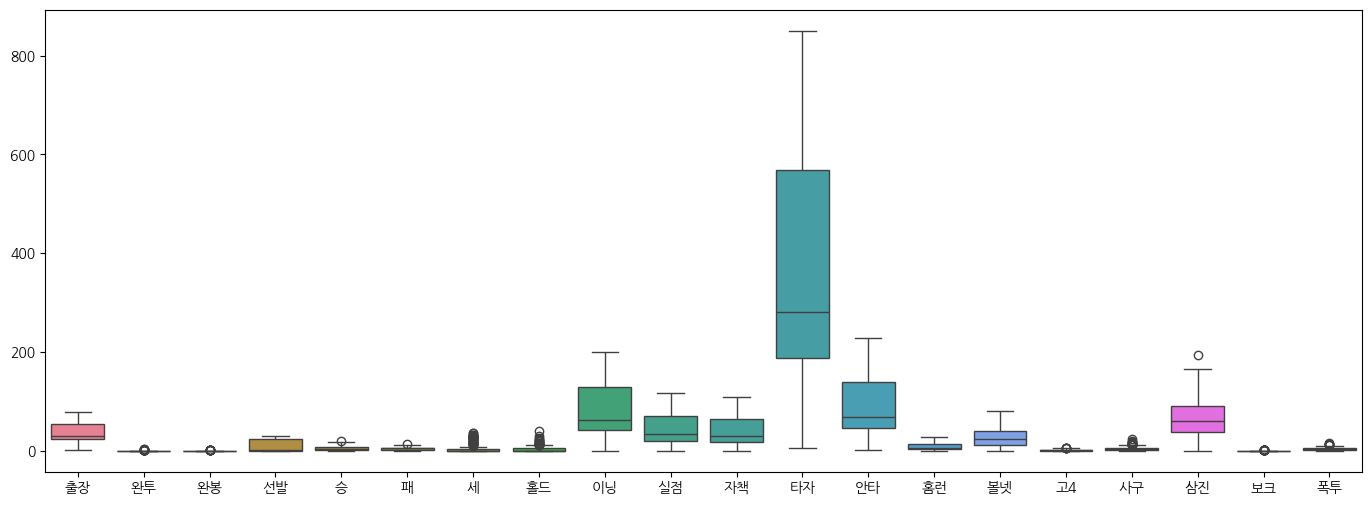

In [398]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(17,6))
sns.boxplot(data=pch_fg1);

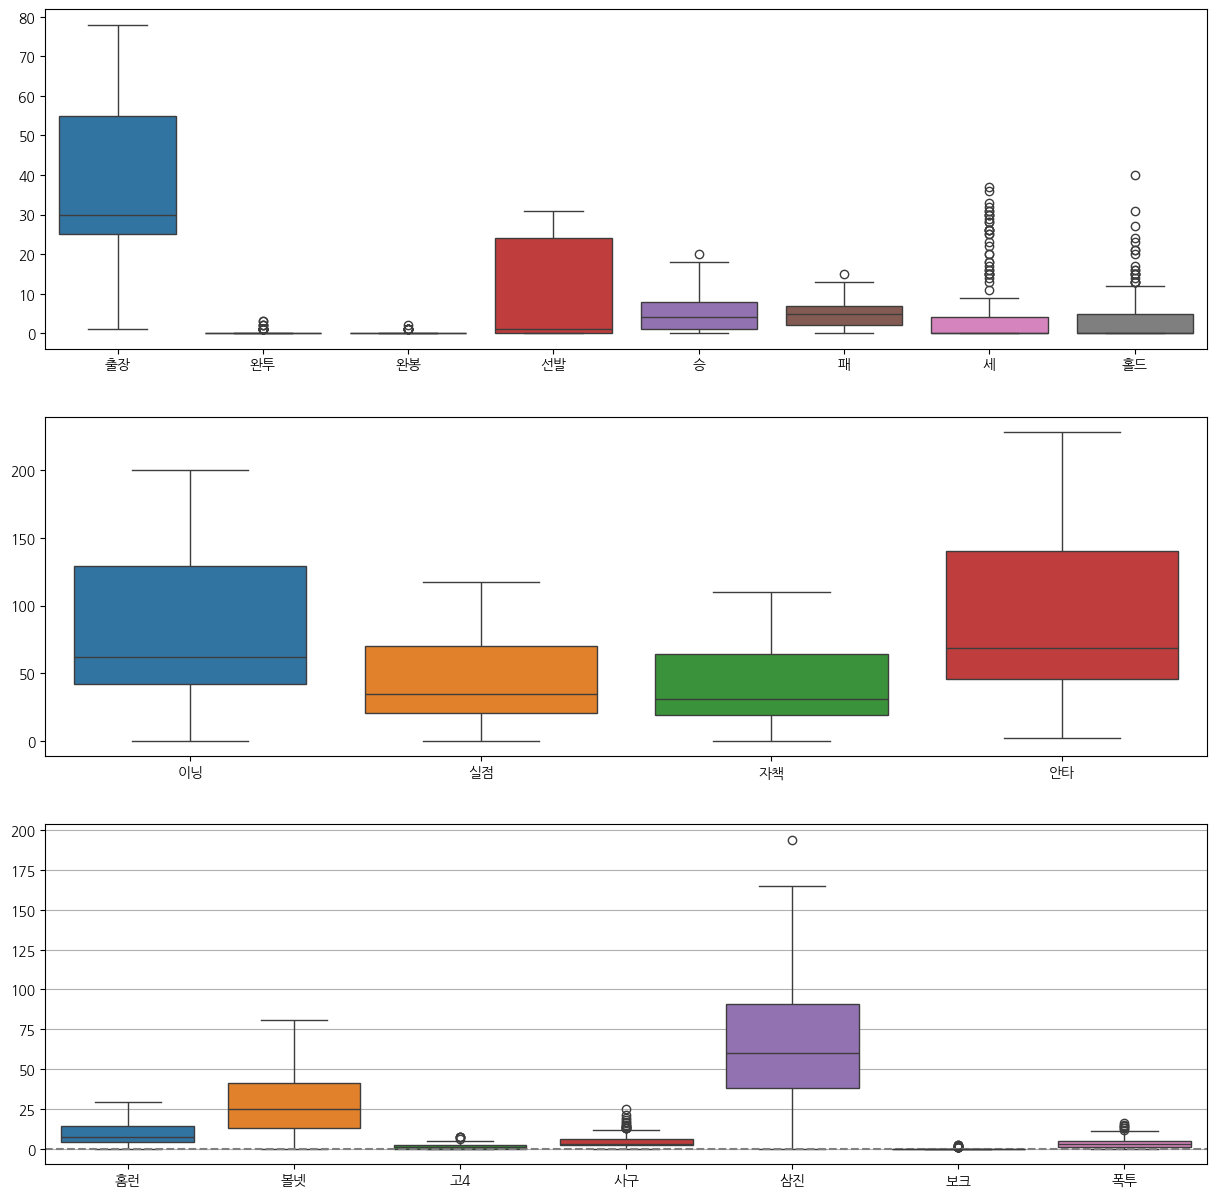

In [410]:
# 범위가 비슷한 수치인 것끼리 모아서 boxplot

tmp = pch_fg1.drop(columns='타자')

fig,ax = plt.subplots(3, 1, figsize=(15,15))
sns.boxplot(tmp.iloc[:, :8], ax=ax[0])
sns.boxplot(tmp.iloc[:, 8:12], ax=ax[1])
sns.boxplot(tmp.iloc[:, 12:], ax=ax[2])
plt.axhline(y=0, color='gray', linestyle='--')
plt.grid(axis='y')
plt.show()

- __Correlation__

In [415]:
corr_matrix = pitcher_features_g1.iloc[:, 3:].corr().round(1)
corr_matrix

연봉(만원)   출장   완투   완봉   선발    승    패    세   홀드   이닝   실점   자책   타자  \
연봉(만원)     1.0  0.1  0.4  0.3  0.4  0.5  0.4  0.1 -0.1  0.5  0.3  0.3  0.4   
출장         0.1  1.0 -0.2 -0.1 -0.3  0.0  0.1  0.5  0.6  0.0 -0.0 -0.0  0.0   
완투         0.4 -0.2  1.0  0.6  0.6  0.5  0.4 -0.2 -0.2  0.6  0.5  0.5  0.6   
완봉         0.3 -0.1  0.6  1.0  0.4  0.4  0.3 -0.1 -0.1  0.4  0.3  0.3  0.4   
선발         0.4 -0.3  0.6  0.4  1.0  0.8  0.7 -0.4 -0.4  0.9  0.9  0.9  0.9   
승          0.5  0.0  0.5  0.4  0.8  1.0  0.6 -0.2 -0.1  0.9  0.8  0.8  0.9   
패          0.4  0.1  0.4  0.3  0.7  0.6  1.0 -0.1 -0.1  0.7  0.8  0.8  0.8   
세          0.1  0.5 -0.2 -0.1 -0.4 -0.2 -0.1  1.0 -0.1 -0.2 -0.3 -0.3 -0.2   
홀드        -0.1  0.6 -0.2 -0.1 -0.4 -0.1 -0.1 -0.1  1.0 -0.2 -0.2 -0.2 -0.2   
이닝         0.5  0.0  0.6  0.4  0.9  0.9  0.7 -0.2 -0.2  1.0  0.9  0.9  1.0   
실점         0.3 -0.0  0.5  0.3  0.9  0.8  0.8 -0.3 -0.2  0.9  1.0  1.0  0.9   
자책         0.3 -0.0  0.5  0.3  0.9  0.8  0.8 -0.3 -0.2  0.9  1.0  1.0  0.9   
타자         0.4  0.0  0.6  0.4  0.9  0.9  0.8 -0.2 -0.2  1.0  0.9  0.9  1.0   
안타         0.4 -0.0  0.6  0.4  0.9  0.9  0.8 -0.3 -0.2  1.0  1.0  0.9  1.0   
홈런         0.3 -0.0  0.4  0.3  0.8  0.7  0.7 -0.3 -0.2  0.8  0.9  0.9  0.8   
볼넷         0.3  0.1  0.4  0.3  0.8  0.8  0.7 -0.2 -0.1  0.9  0.8  0.8  0.9   
고4         0.1  0.6 -0.2 -0.1 -0.3 -0.1  0.1  0.4  0.2 -0.1 -0.1 -0.1 -0.1   
사구         0.0 -0.0  0.3  0.2  0.6  0.5  0.5 -0.2 -0.1  0.6  0.6  0.6  0.6   
삼진         0.5  0.2  0.5  0.4  0.8  0.9  0.7 -0.1 -0.1  0.9  0.8  0.8  0.9   
보크         0.1  0.1  0.3 -0.0  0.1  0.1  0.2  0.1  0.0  0.2  0.1  0.1  0.2   
폭투         0.2  0.1  0.1  0.0  0.4  0.4  0.4 -0.1 -0.1  0.5  0.5  0.5  0.5   

         안타   홈런   볼넷   고4   사구   삼진   보크   폭투  
연봉(만원)  0.4  0.3  0.3  0.1  0.0  0.5  0.1  0.2  
출장     -0.0 -0.0  0.1  0.6 -0.0  0.2  0.1  0.1  
완투      0.6  0.4  0.4 -0.2  0.3  0.5  0.3  0.1  
완봉      0.4  0.3  0.3 -0.1  0.2  0.4 -0.0  0.0  
선발      0.9  0.8  0.8 -0.3  0.6  0.8  0.1  0.4  
승       0.9  0.7  0.8 -0.1  0.5  0.9  0.1  0.4  
패       0.8  0.7  0.7  0.1  0.5  0.7  0.2  0.4  
세      -0.3 -0.3 -0.2  0.4 -0.2 -0.1  0.1 -0.1  
홀드     -0.2 -0.2 -0.1  0.2 -0.1 -0.1  0.0 -0.1  
이닝      1.0  0.8  0.9 -0.1  0.6  0.9  0.2  0.5  
실점      1.0  0.9  0.8 -0.1  0.6  0.8  0.1  0.5  
자책      0.9  0.9  0.8 -0.1  0.6  0.8  0.1  0.5  
타자      1.0  0.8  0.9 -0.1  0.6  0.9  0.2  0.5  
안타      1.0  0.8  0.8 -0.1  0.6  0.9  0.2  0.5  
홈런      0.8  1.0  0.7 -0.1  0.5  0.8  0.1  0.4  
볼넷      0.8  0.7  1.0 -0.0  0.5  0.8  0.1  0.6  
고4     -0.1 -0.1 -0.0  1.0 -0.1  0.0  0.1  0.1  
사구      0.6  0.5  0.5 -0.1  1.0  0.5  0.1  0.2  
삼진      0.9  0.8  0.8  0.0  0.5  1.0  0.2  0.5  
보크      0.2  0.1  0.1  0.1  0.1  0.2  1.0  0.0  
폭투      0.5  0.4  0.6  0.1  0.2  0.5  0.0  1.0

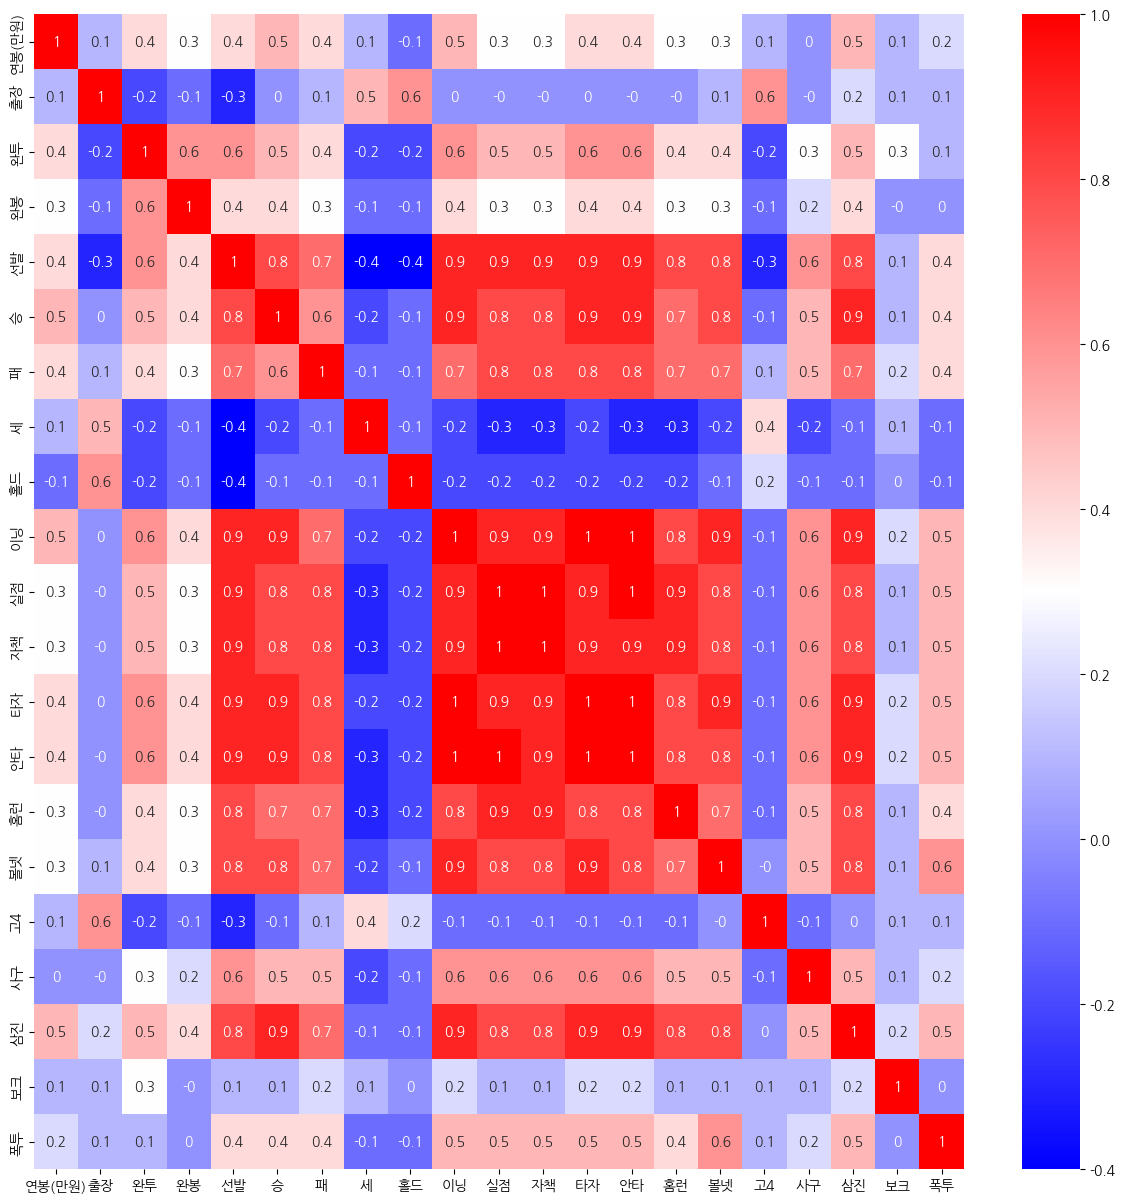

In [417]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_matrix, annot=True, cmap='bwr');
plt.show()

- __Pairplot__

c:\Users\happy\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 1700x1700 with 0 Axes>

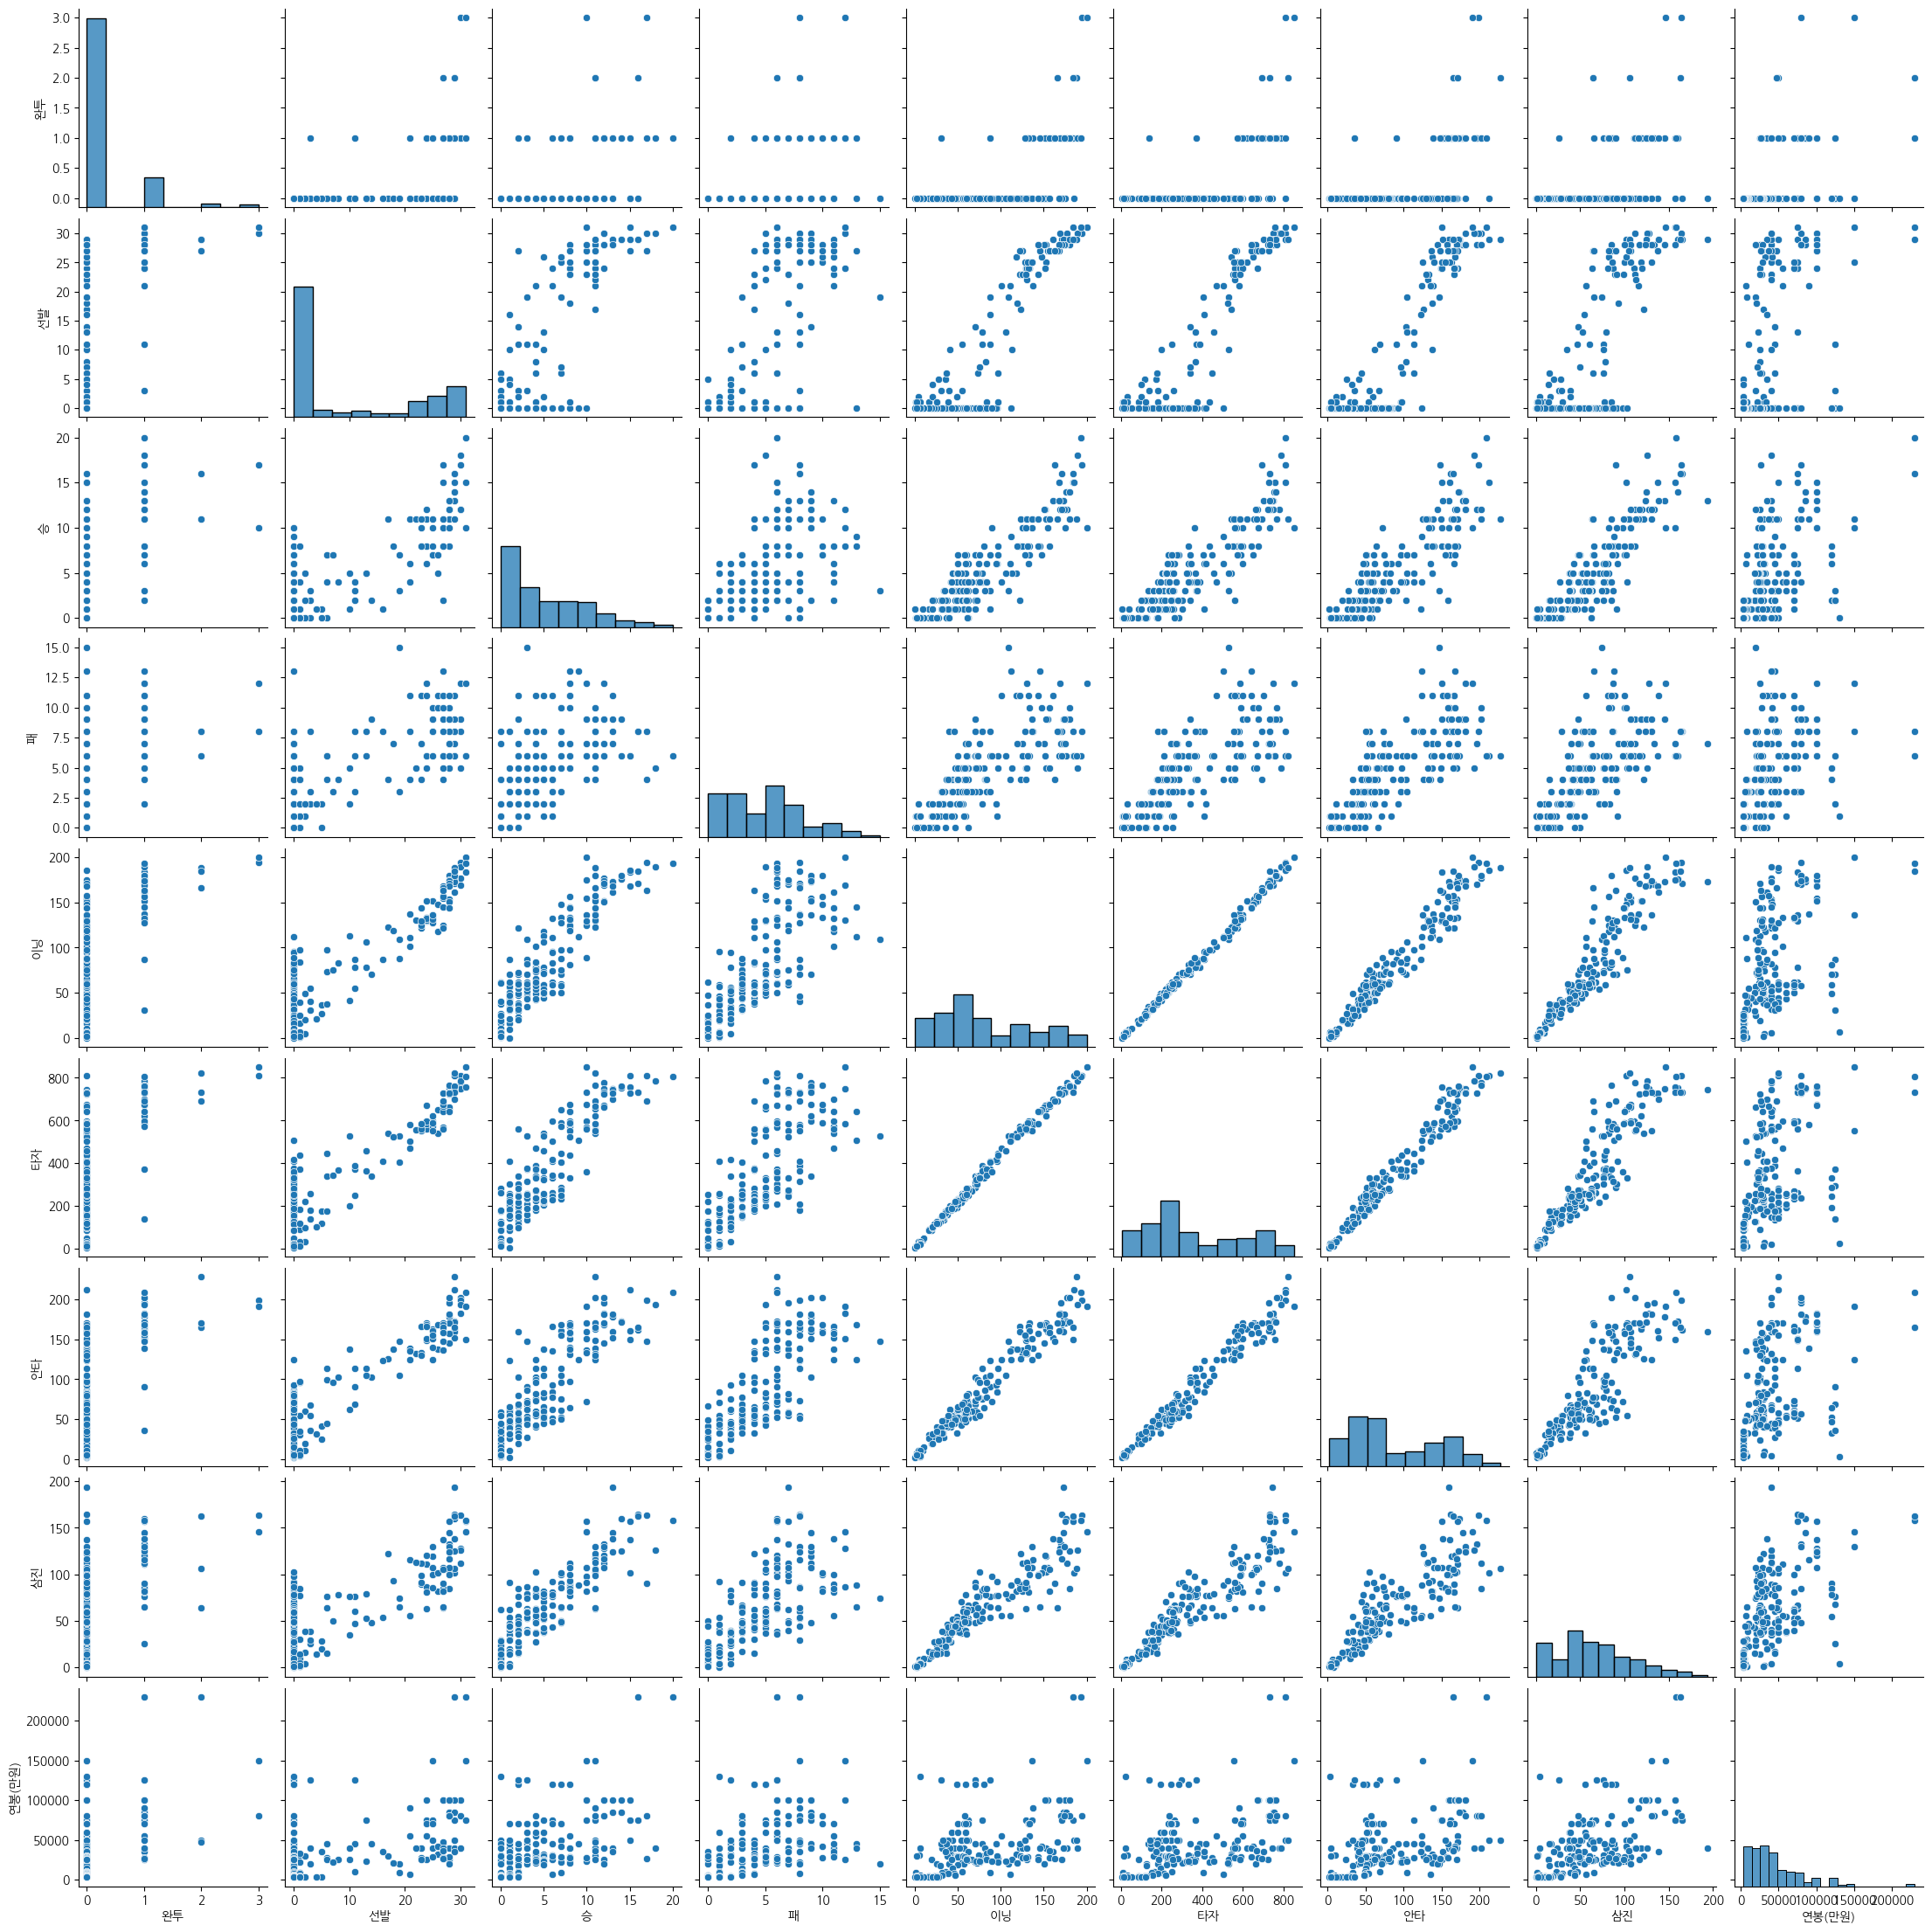

In [418]:
# correlation >= 0.4

columns = ['완투','선발','승','패','이닝','타자','안타','삼진','연봉(만원)']

plt.figure(figsize=(17,17))
sns.pairplot(pitcher_features_g1.loc[:, columns])
plt.show()

c:\Users\happy\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

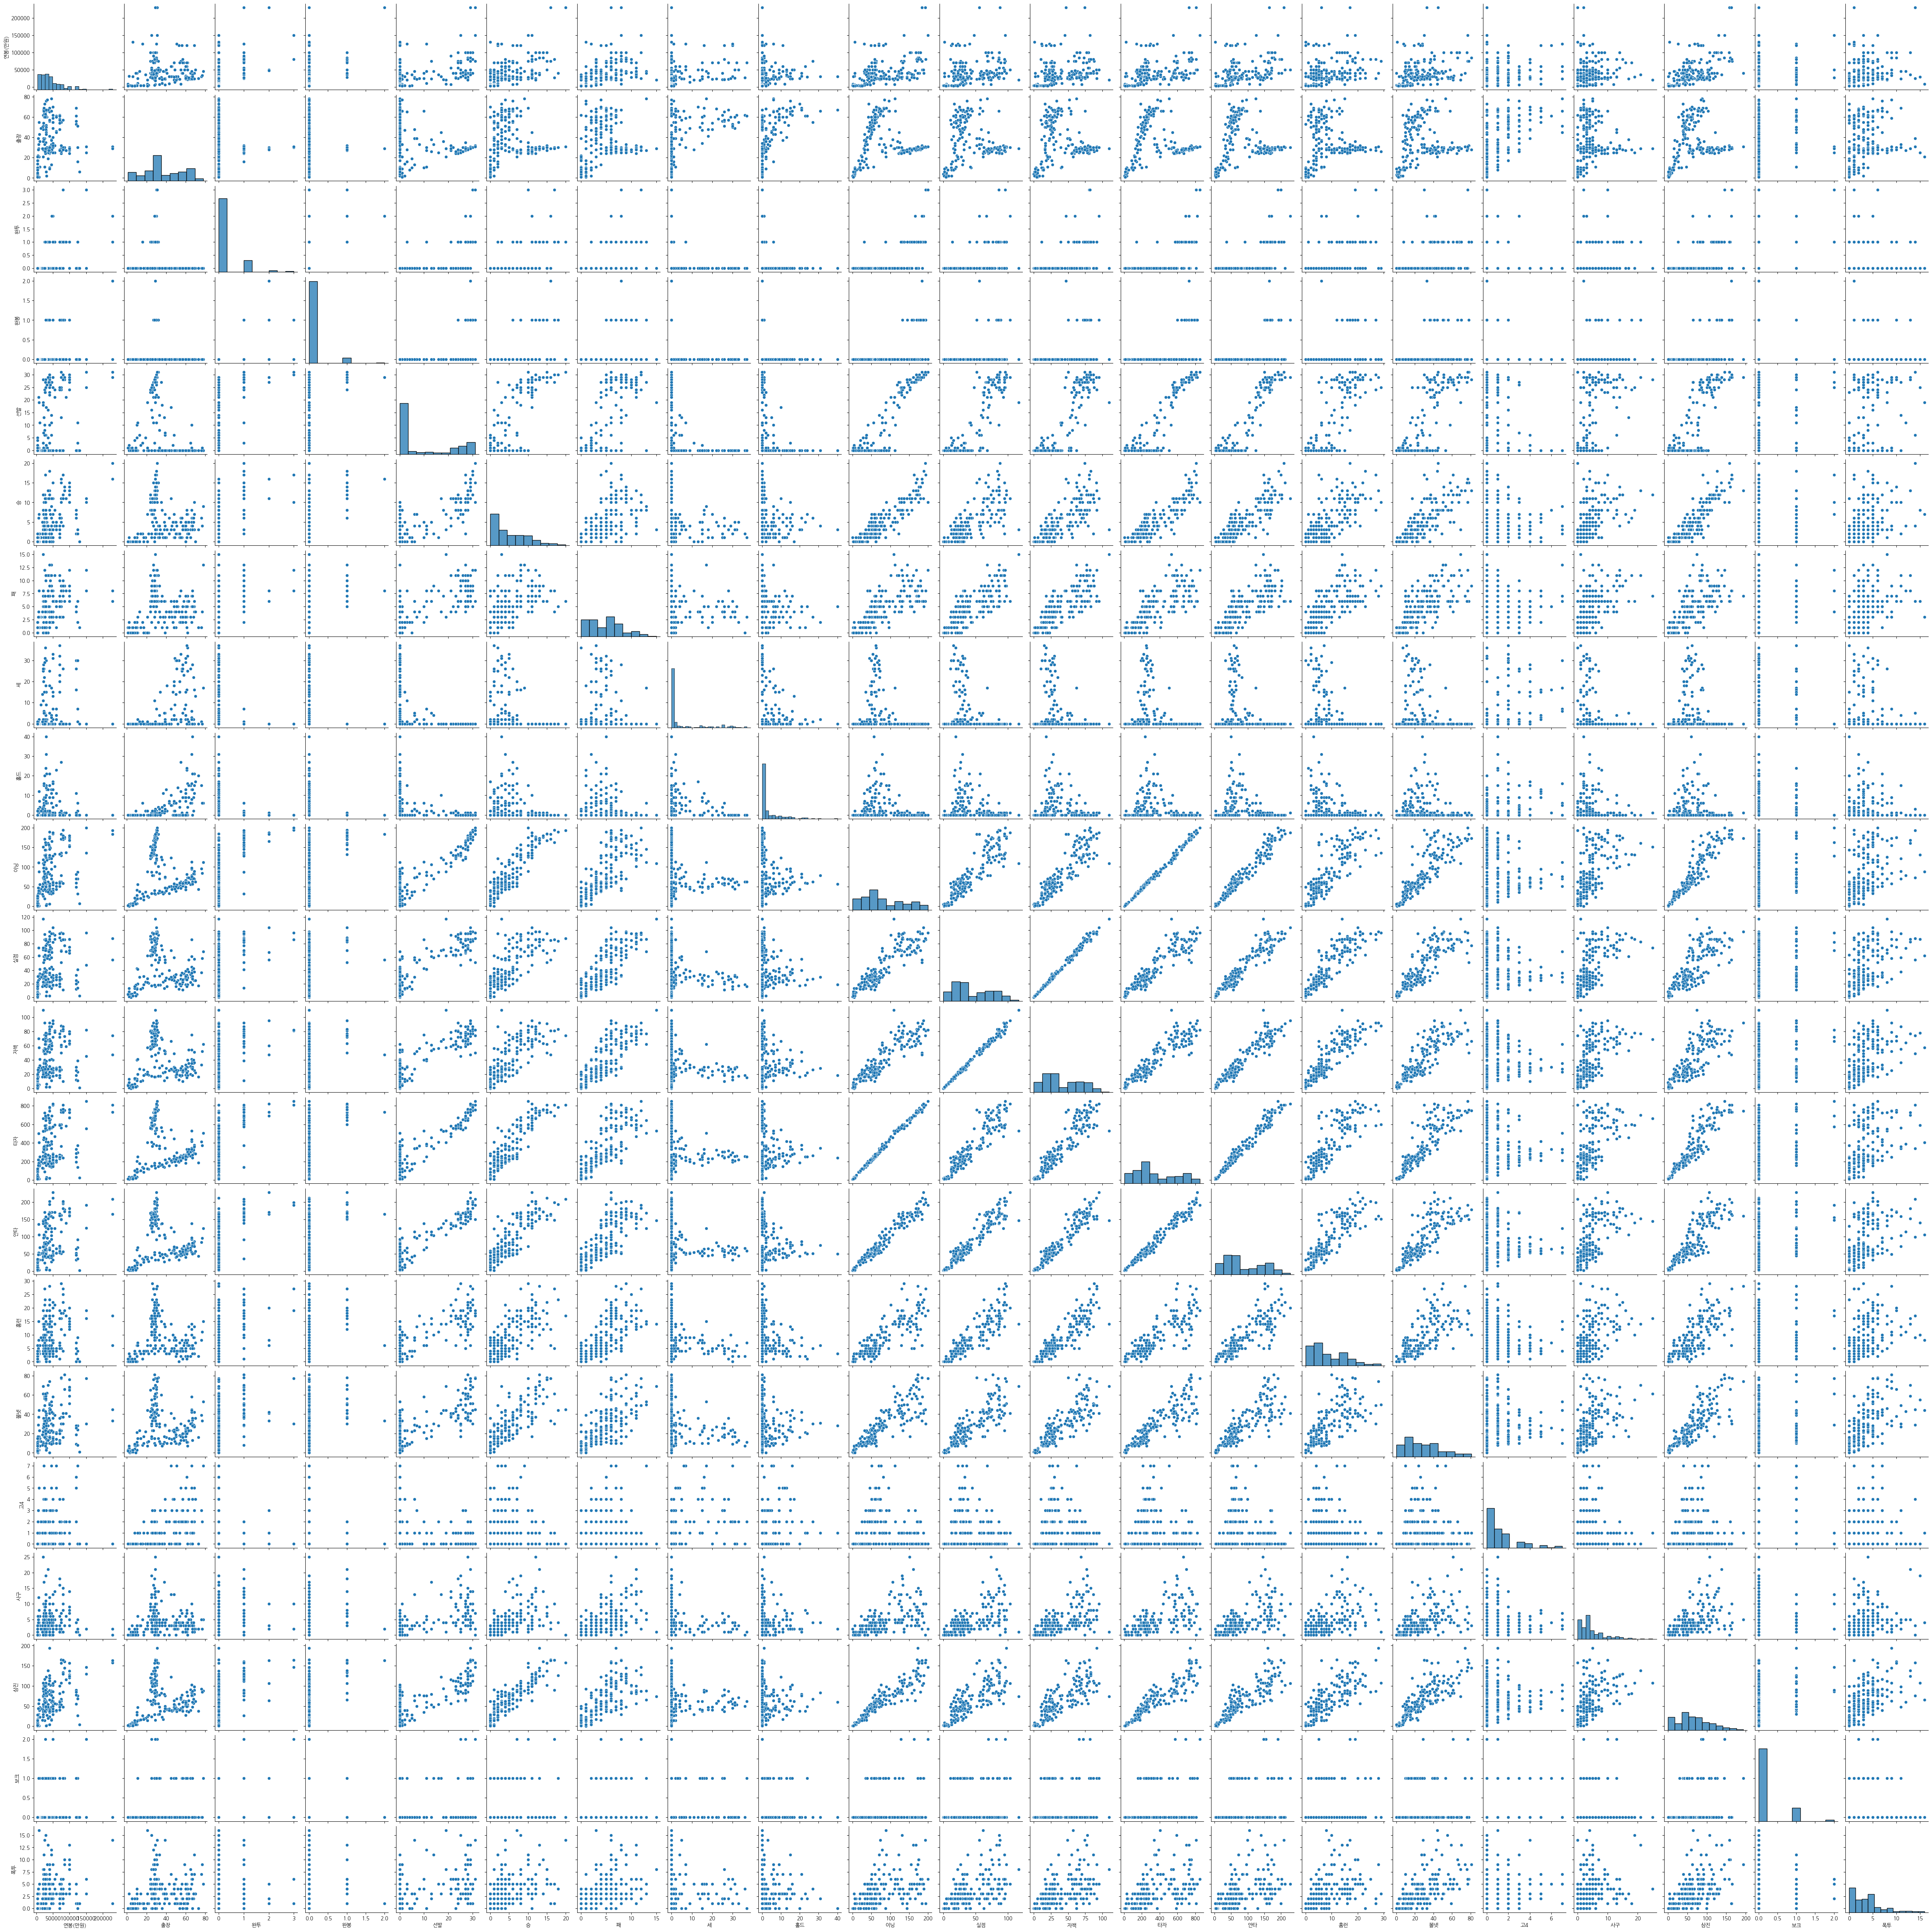

In [ ]:
# plt.figure(figsize=(15,15))
# sns.pairplot(pitcher_features_g1.iloc[:, 3:])
# plt.show()

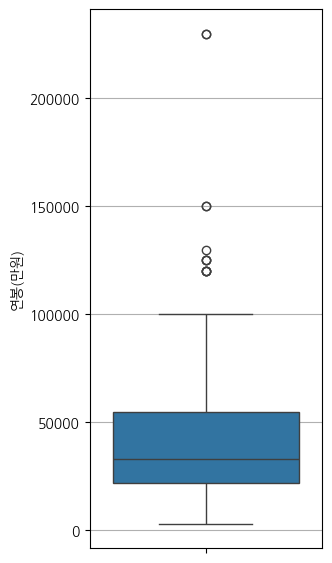

In [409]:
plt.figure(figsize=(3,7))
sns.boxplot(data=pitcher_features_g1['연봉(만원)'])
plt.grid(axis='y')
plt.show()

In [412]:
import plotly.express as px

fig = px.histogram(pitcher_features_g1, x='연봉(만원)')
fig.show()

- __Scale__

In [ ]:
# 피처 각각에 대한 스케일링을 수행하는 함수를 정의한다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [489]:
pch_fig1 = pitcher_features_g1.iloc[:, 3:]

X = pch_fig1.drop(columns='연봉(만원)')
y = pch_fig1['연봉(만원)']

In [490]:
from sklearn.preprocessing import StandardScaler


std_scaler = StandardScaler()
std_amount = std_scaler.fit_transform(X)

std_amount

array([[-0.35084701,  1.5747851 , -0.25764051, ...,  0.24962912,
         1.88461538, -1.11444385],
       [ 0.81667985, -0.39098113, -0.25764051, ..., -0.25160716,
        -0.43589744, -0.81202356],
       [-0.50313312, -0.39098113, -0.25764051, ...,  0.98954934,
        -0.43589744,  1.60733881],
       ...,
       [ 1.17201411, -0.39098113, -0.25764051, ..., -0.15613358,
        -0.43589744,  0.39765763],
       [-0.55389516, -0.39098113, -0.25764051, ...,  0.79860219,
        -0.43589744, -1.11444385],
       [ 1.83192059, -0.39098113, -0.25764051, ..., -0.65736986,
        -0.43589744, -1.11444385]])

In [491]:
std_X = pd.DataFrame(data=std_amount, columns=X.columns)
std_X

출장        완투        완봉        선발         승         패         세  \
0   -0.350847  1.574785 -0.257641  0.124457 -0.498448  0.356842  0.210505   
1    0.816680 -0.390981 -0.257641 -0.789911 -0.712237 -0.243980  2.624640   
2   -0.503133 -0.390981 -0.257641  1.454446  0.998076  1.258074 -0.524232   
3   -0.452371  1.574785 -0.257641  1.537570  1.639444  1.258074 -0.524232   
4   -0.452371  1.574785  3.329508  1.537570  1.425655  0.657253 -0.524232   
..        ...       ...       ...       ...       ...       ...       ...   
176  1.324300 -0.390981 -0.257641 -0.789911 -0.712237  0.356842 -0.419270   
177 -0.401609  1.574785 -0.257641  1.454446  2.494600 -0.243980 -0.524232   
178  1.172014 -0.390981 -0.257641 -0.789911 -0.498448 -0.544391  2.729603   
179 -0.553895 -0.390981 -0.257641  1.121948  1.211865  0.657253 -0.524232   
180  1.831921 -0.390981 -0.257641 -0.789911 -0.498448 -1.145213 -0.524232   

           홀드        이닝        실점        자책        타자        안타        홈런  \
0   -0.246509  0.088599 -0.134991 -0.073954  0.048250  0.041099  0.012240   
1   -0.553162 -0.605558 -1.128771 -1.097791 -0.716173 -0.959968 -1.316994   
2   -0.553162  1.320639  1.441351  1.442841  1.337946  1.232024  0.898396   
3   -0.553162  1.651363  1.098668  0.949882  1.658235  1.542700  0.159932   
4   -0.553162  1.595031  1.441351  1.594520  1.568554  1.853376  1.341474   
..        ...       ...       ...       ...       ...       ...       ...   
176  0.826778 -0.405670 -0.237795 -0.225634 -0.340367 -0.148758 -0.430838   
177 -0.553162  1.467829  0.858790  0.949882  1.414815  1.024906 -0.578531   
178 -0.553162 -0.405670 -0.477673 -0.528993 -0.447130 -0.459434 -0.726224   
179 -0.246509  1.120751  0.618912  0.798203  0.962141  0.714231  2.079937   
180  2.513373 -0.714589 -0.957429 -0.946111 -0.737525 -0.770110 -1.021609   

           볼넷        고4        사구        삼진        보크        폭투  
0   -0.033937 -0.776121 -0.828806  0.249629  1.884615 -1.114444  
1   -1.014690  0.456141 -0.151032 -0.251607 -0.435897 -0.812024  
2    1.979187 -0.159990 -0.376957  0.989549 -0.435897  1.607339  
3    2.701848 -0.159990 -0.376957  1.896548  1.884615  1.607339  
4    0.430630 -0.776121  0.752665  1.610128 -0.435897  0.095237  
..        ...       ...       ...       ...       ...       ...  
176 -0.292030  1.688404 -0.376957 -0.705107 -0.435897 -0.207183  
177  1.669476 -0.159990  1.204514  0.583787  4.205128  0.397658  
178 -0.601741  0.456141 -0.376957 -0.156134 -0.435897  0.397658  
179  0.224156 -0.159990 -0.376957  0.798602 -0.435897 -1.114444  
180 -0.653360 -0.776121 -0.602881 -0.657370 -0.435897 -1.114444  

[181 rows x 20 columns]

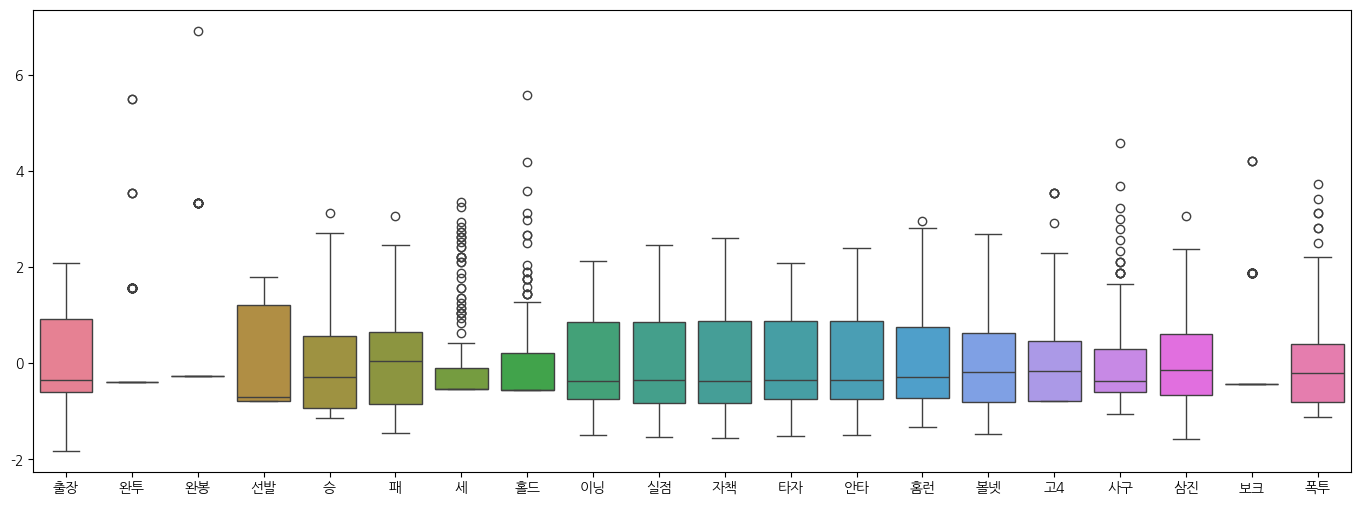

In [425]:
plt.figure(figsize=(17,6))
sns.boxplot(data=std_X);

In [497]:
std_fig1 = std_X.copy()
std_fig1['연봉'] = y.values
std_fig1

출장        완투        완봉        선발         승         패         세  \
0   -0.350847  1.574785 -0.257641  0.124457 -0.498448  0.356842  0.210505   
1    0.816680 -0.390981 -0.257641 -0.789911 -0.712237 -0.243980  2.624640   
2   -0.503133 -0.390981 -0.257641  1.454446  0.998076  1.258074 -0.524232   
3   -0.452371  1.574785 -0.257641  1.537570  1.639444  1.258074 -0.524232   
4   -0.452371  1.574785  3.329508  1.537570  1.425655  0.657253 -0.524232   
..        ...       ...       ...       ...       ...       ...       ...   
176  1.324300 -0.390981 -0.257641 -0.789911 -0.712237  0.356842 -0.419270   
177 -0.401609  1.574785 -0.257641  1.454446  2.494600 -0.243980 -0.524232   
178  1.172014 -0.390981 -0.257641 -0.789911 -0.498448 -0.544391  2.729603   
179 -0.553895 -0.390981 -0.257641  1.121948  1.211865  0.657253 -0.524232   
180  1.831921 -0.390981 -0.257641 -0.789911 -0.498448 -1.145213 -0.524232   

           홀드        이닝        실점        자책        타자        안타        홈런  \
0   -0.246509  0.088599 -0.134991 -0.073954  0.048250  0.041099  0.012240   
1   -0.553162 -0.605558 -1.128771 -1.097791 -0.716173 -0.959968 -1.316994   
2   -0.553162  1.320639  1.441351  1.442841  1.337946  1.232024  0.898396   
3   -0.553162  1.651363  1.098668  0.949882  1.658235  1.542700  0.159932   
4   -0.553162  1.595031  1.441351  1.594520  1.568554  1.853376  1.341474   
..        ...       ...       ...       ...       ...       ...       ...   
176  0.826778 -0.405670 -0.237795 -0.225634 -0.340367 -0.148758 -0.430838   
177 -0.553162  1.467829  0.858790  0.949882  1.414815  1.024906 -0.578531   
178 -0.553162 -0.405670 -0.477673 -0.528993 -0.447130 -0.459434 -0.726224   
179 -0.246509  1.120751  0.618912  0.798203  0.962141  0.714231  2.079937   
180  2.513373 -0.714589 -0.957429 -0.946111 -0.737525 -0.770110 -1.021609   

           볼넷        고4        사구        삼진        보크        폭투      연봉  
0   -0.033937 -0.776121 -0.828806  0.249629  1.884615 -1.114444  125000  
1   -1.014690  0.456141 -0.151032 -0.251607 -0.435897 -0.812024  120000  
2    1.979187 -0.159990 -0.376957  0.989549 -0.435897  1.607339  100000  
3    2.701848 -0.159990 -0.376957  1.896548  1.884615  1.607339   85000  
4    0.430630 -0.776121  0.752665  1.610128 -0.435897  0.095237   80000  
..        ...       ...       ...       ...       ...       ...     ...  
176 -0.292030  1.688404 -0.376957 -0.705107 -0.435897 -0.207183   27000  
177  1.669476 -0.159990  1.204514  0.583787  4.205128  0.397658   27000  
178 -0.601741  0.456141 -0.376957 -0.156134 -0.435897  0.397658   26000  
179  0.224156 -0.159990 -0.376957  0.798602 -0.435897 -1.114444   25700  
180 -0.653360 -0.776121 -0.602881 -0.657370 -0.435897 -1.114444   25000  

[181 rows x 21 columns]

In [428]:
corr_matrix = std_fig1.corr().round(1)
corr_matrix

출장   완투   완봉   선발    승    패    세   홀드   이닝   실점   자책   타자   안타   홈런   볼넷  \
출장  1.0 -0.2 -0.1 -0.3  0.0  0.1  0.5  0.6  0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.1   
완투 -0.2  1.0  0.6  0.6  0.5  0.4 -0.2 -0.2  0.6  0.5  0.5  0.6  0.6  0.4  0.4   
완봉 -0.1  0.6  1.0  0.4  0.4  0.3 -0.1 -0.1  0.4  0.3  0.3  0.4  0.4  0.3  0.3   
선발 -0.3  0.6  0.4  1.0  0.8  0.7 -0.4 -0.4  0.9  0.9  0.9  0.9  0.9  0.8  0.8   
승   0.0  0.5  0.4  0.8  1.0  0.6 -0.2 -0.1  0.9  0.8  0.8  0.9  0.9  0.7  0.8   
패   0.1  0.4  0.3  0.7  0.6  1.0 -0.1 -0.1  0.7  0.8  0.8  0.8  0.8  0.7  0.7   
세   0.5 -0.2 -0.1 -0.4 -0.2 -0.1  1.0 -0.1 -0.2 -0.3 -0.3 -0.2 -0.3 -0.3 -0.2   
홀드  0.6 -0.2 -0.1 -0.4 -0.1 -0.1 -0.1  1.0 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.1   
이닝  0.0  0.6  0.4  0.9  0.9  0.7 -0.2 -0.2  1.0  0.9  0.9  1.0  1.0  0.8  0.9   
실점 -0.0  0.5  0.3  0.9  0.8  0.8 -0.3 -0.2  0.9  1.0  1.0  0.9  1.0  0.9  0.8   
자책 -0.0  0.5  0.3  0.9  0.8  0.8 -0.3 -0.2  0.9  1.0  1.0  0.9  0.9  0.9  0.8   
타자  0.0  0.6  0.4  0.9  0.9  0.8 -0.2 -0.2  1.0  0.9  0.9  1.0  1.0  0.8  0.9   
안타 -0.0  0.6  0.4  0.9  0.9  0.8 -0.3 -0.2  1.0  1.0  0.9  1.0  1.0  0.8  0.8   
홈런 -0.0  0.4  0.3  0.8  0.7  0.7 -0.3 -0.2  0.8  0.9  0.9  0.8  0.8  1.0  0.7   
볼넷  0.1  0.4  0.3  0.8  0.8  0.7 -0.2 -0.1  0.9  0.8  0.8  0.9  0.8  0.7  1.0   
고4  0.6 -0.2 -0.1 -0.3 -0.1  0.1  0.4  0.2 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.0   
사구 -0.0  0.3  0.2  0.6  0.5  0.5 -0.2 -0.1  0.6  0.6  0.6  0.6  0.6  0.5  0.5   
삼진  0.2  0.5  0.4  0.8  0.9  0.7 -0.1 -0.1  0.9  0.8  0.8  0.9  0.9  0.8  0.8   
보크  0.1  0.3 -0.0  0.1  0.1  0.2  0.1  0.0  0.2  0.1  0.1  0.2  0.2  0.1  0.1   
폭투  0.1  0.1  0.0  0.4  0.4  0.4 -0.1 -0.1  0.5  0.5  0.5  0.5  0.5  0.4  0.6   
연봉  0.1  0.4  0.3  0.4  0.5  0.4  0.1 -0.1  0.5  0.3  0.3  0.4  0.4  0.3  0.3   

     고4   사구   삼진   보크   폭투   연봉  
출장  0.6 -0.0  0.2  0.1  0.1  0.1  
완투 -0.2  0.3  0.5  0.3  0.1  0.4  
완봉 -0.1  0.2  0.4 -0.0  0.0  0.3  
선발 -0.3  0.6  0.8  0.1  0.4  0.4  
승  -0.1  0.5  0.9  0.1  0.4  0.5  
패   0.1  0.5  0.7  0.2  0.4  0.4  
세   0.4 -0.2 -0.1  0.1 -0.1  0.1  
홀드  0.2 -0.1 -0.1  0.0 -0.1 -0.1  
이닝 -0.1  0.6  0.9  0.2  0.5  0.5  
실점 -0.1  0.6  0.8  0.1  0.5  0.3  
자책 -0.1  0.6  0.8  0.1  0.5  0.3  
타자 -0.1  0.6  0.9  0.2  0.5  0.4  
안타 -0.1  0.6  0.9  0.2  0.5  0.4  
홈런 -0.1  0.5  0.8  0.1  0.4  0.3  
볼넷 -0.0  0.5  0.8  0.1  0.6  0.3  
고4  1.0 -0.1  0.0  0.1  0.1  0.1  
사구 -0.1  1.0  0.5  0.1  0.2  0.0  
삼진  0.0  0.5  1.0  0.2  0.5  0.5  
보크  0.1  0.1  0.2  1.0  0.0  0.1  
폭투  0.1  0.2  0.5  0.0  1.0  0.2  
연봉  0.1  0.0  0.5  0.1  0.2  1.0

In [521]:
corr_rlt = corr_matrix['연봉'].to_frame(name='Corr')
corr_rlt

Corr
출장   0.1
완투   0.4
완봉   0.3
선발   0.4
승    0.5
패    0.4
세    0.1
홀드  -0.1
이닝   0.5
실점   0.3
자책   0.3
타자   0.4
안타   0.4
홈런   0.3
볼넷   0.3
고4   0.1
사구   0.0
삼진   0.5
보크   0.1
폭투   0.2
연봉   1.0

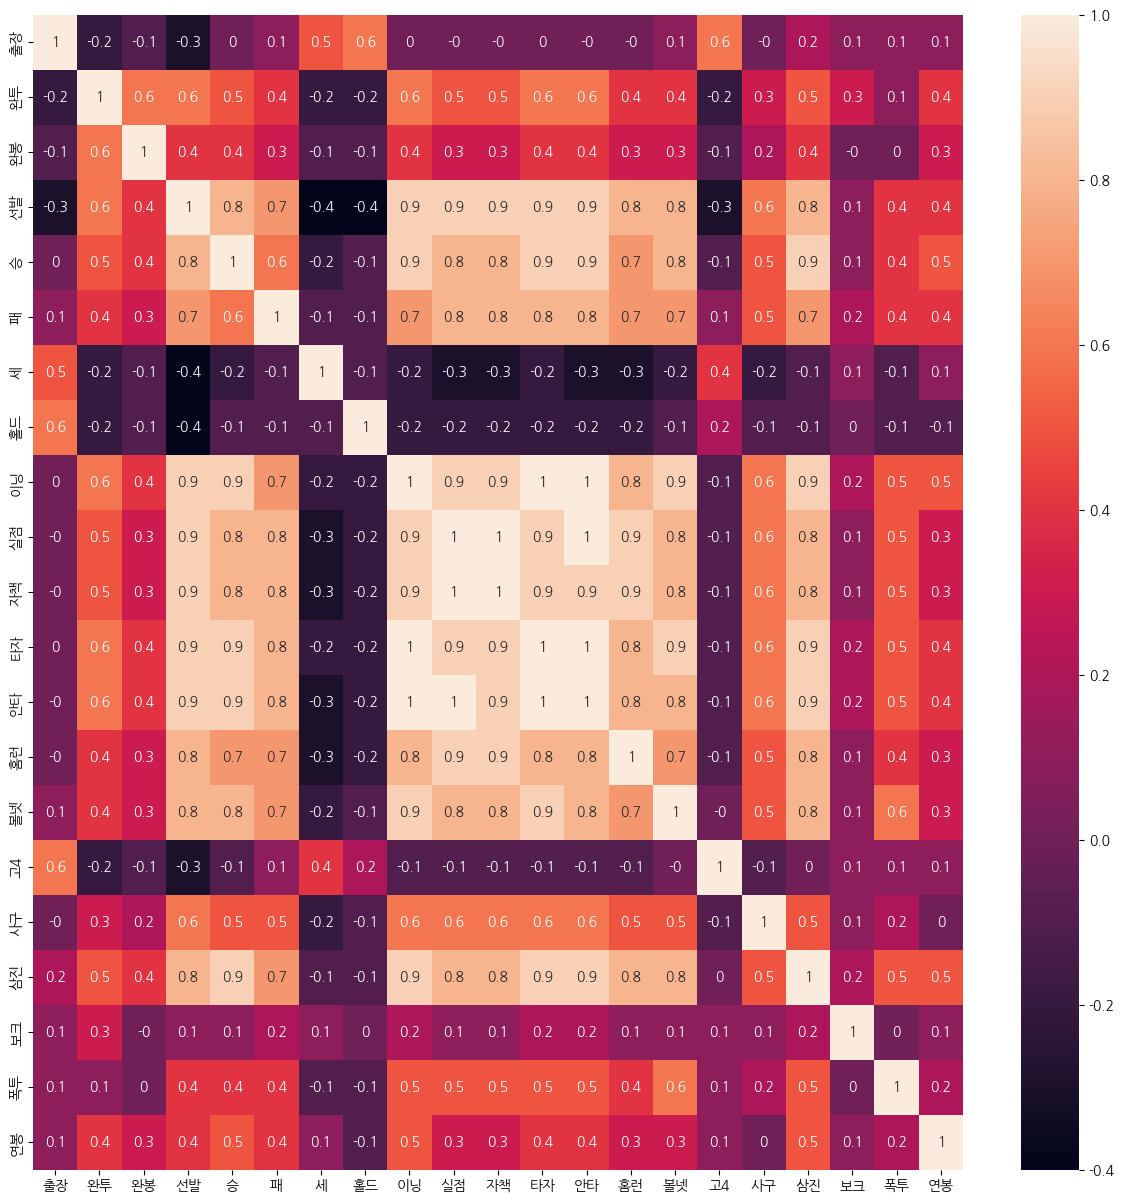

In [429]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_matrix, annot=True);
plt.show()

👉 해석 : 다중 공선성

- 회귀 분석은 피처 간의 '독립성'을 전제로 하는 분석 방법이기 때문에 올바른 회귀 분석을 하려면 이러한 피처 쌍을 제거해야 한다.
- 그래서 다중 공선성이라는 것을 살펴봐야 한다.

- 다중 공선성이란 변수 간 상관 관계가 높아 분석에 부정적인 영향을 미치는 것을 의미한다.
- 다중 공선성을 살펴봄으로써 여러 피처간의 연관성을 고려했을 때 어떤 피처를 제거하는 것이 옳은 판단일지 

	혹은 제거하는 것 자체가 맞는 판단인지에 대한 기준을 제시해 줄 수 있다.
	
- 다중 공선성은 분산팽창요인(VIF)이라는 계수로 평가할 수 있다.<br></br>


> 다중 공선성(multicollinearity)은 회귀 분석에서 독립 변수 간에 높은 상관 관계가 있는 경우 발생합니다.</br>
> 이는 회귀 모델에서 독립 변수들 간의 선형 종속성이나 근접한 선형 종속성이 있음을 의미합니다.</br>
> 이러한 상황은 회귀 분석 결과를 해석하거나 모델을 예측하는 데 어려움을 초래할 수 있습니다.</br>
>
> 분산팽창요인(Variance Inflation Factor, VIF)은 다중 공선성을 측정하는 통계적 지표 중 하나입니다.</br>
> VIF는 각 독립 변수가 다른 독립 변수들과 상관 관계를 갖는 정도를 나타냅니다.</br>
> 일반적으로 VIF가 10 이상이면 다중 공선성이 높다고 판단되며, 5 이하면 다중 공선성이 낮다고 판단됩니다.</br>
> 더 나아가, VIF가 1에 가까울수록 다른 독립 변수들과의 상관 관계가 낮다는 것을 의미합니다.
>
> VIF는 다음과 같이 계산됩니다:
>
> $~~~~~~~~VIF_i = \cfrac{1}{~1 - {R_i}^2~}$
>
> 여기서 $R_i^2$는 독립 변수 $ i $를 다른 모든 독립 변수들의 선형 조합으로 선형 회귀한 결과의 결정 계수입니다.
>
> 따라서 VIF는 독립 변수 간의 상관 관계 정도를 측정하여 다중 공선성의 존재를 파악하는 데 사용됩니다.</br>
> 일반적으로 VIF가 높은 독립 변수는 모델에서 제거하여 모델의 안정성을 높이는데 도움이 됩니다.


</br>

◼ 회귀 분석 예측 성능을 높이기 위한 방법 : 다중 공선성 확인

In [496]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = std_X.columns
vif['VIF_factor'] = [variance_inflation_factor(std_X.values, i) for i in range(std_X.shape[1])]
vif.round(1).sort_values(by='VIF_factor')

Features  VIF_factor
18       보크         1.2
2        완봉         1.7
15       고4         1.8
19       폭투         1.9
1        완투         2.8
16       사구         3.2
6         세         3.7
5         패         3.8
7        홀드         3.8
13       홈런         5.9
4         승         8.3
0        출장        10.6
17       삼진        11.9
14       볼넷        30.8
3        선발        40.4
10       자책       151.6
9        실점       180.1
12       안타       274.2
8        이닝      2656.4
11       타자      4986.5

In [523]:
vif_rlt = vif.set_index('Features')
vif_rlt

VIF_factor
Features             
출장          10.558394
완투           2.781268
완봉           1.744619
선발          40.400361
승            8.258843
패            3.845319
세            3.735785
홀드           3.837519
이닝        2656.441789
실점         180.117582
자책         151.635287
타자        4986.545573
안타         274.178882
홈런           5.938016
볼넷          30.797949
고4           1.796540
사구           3.154626
삼진          11.897048
보크           1.209359
폭투           1.919312

- __Feature Engineering : VIF ＜ 10__

<Figure size 1700x1700 with 0 Axes>

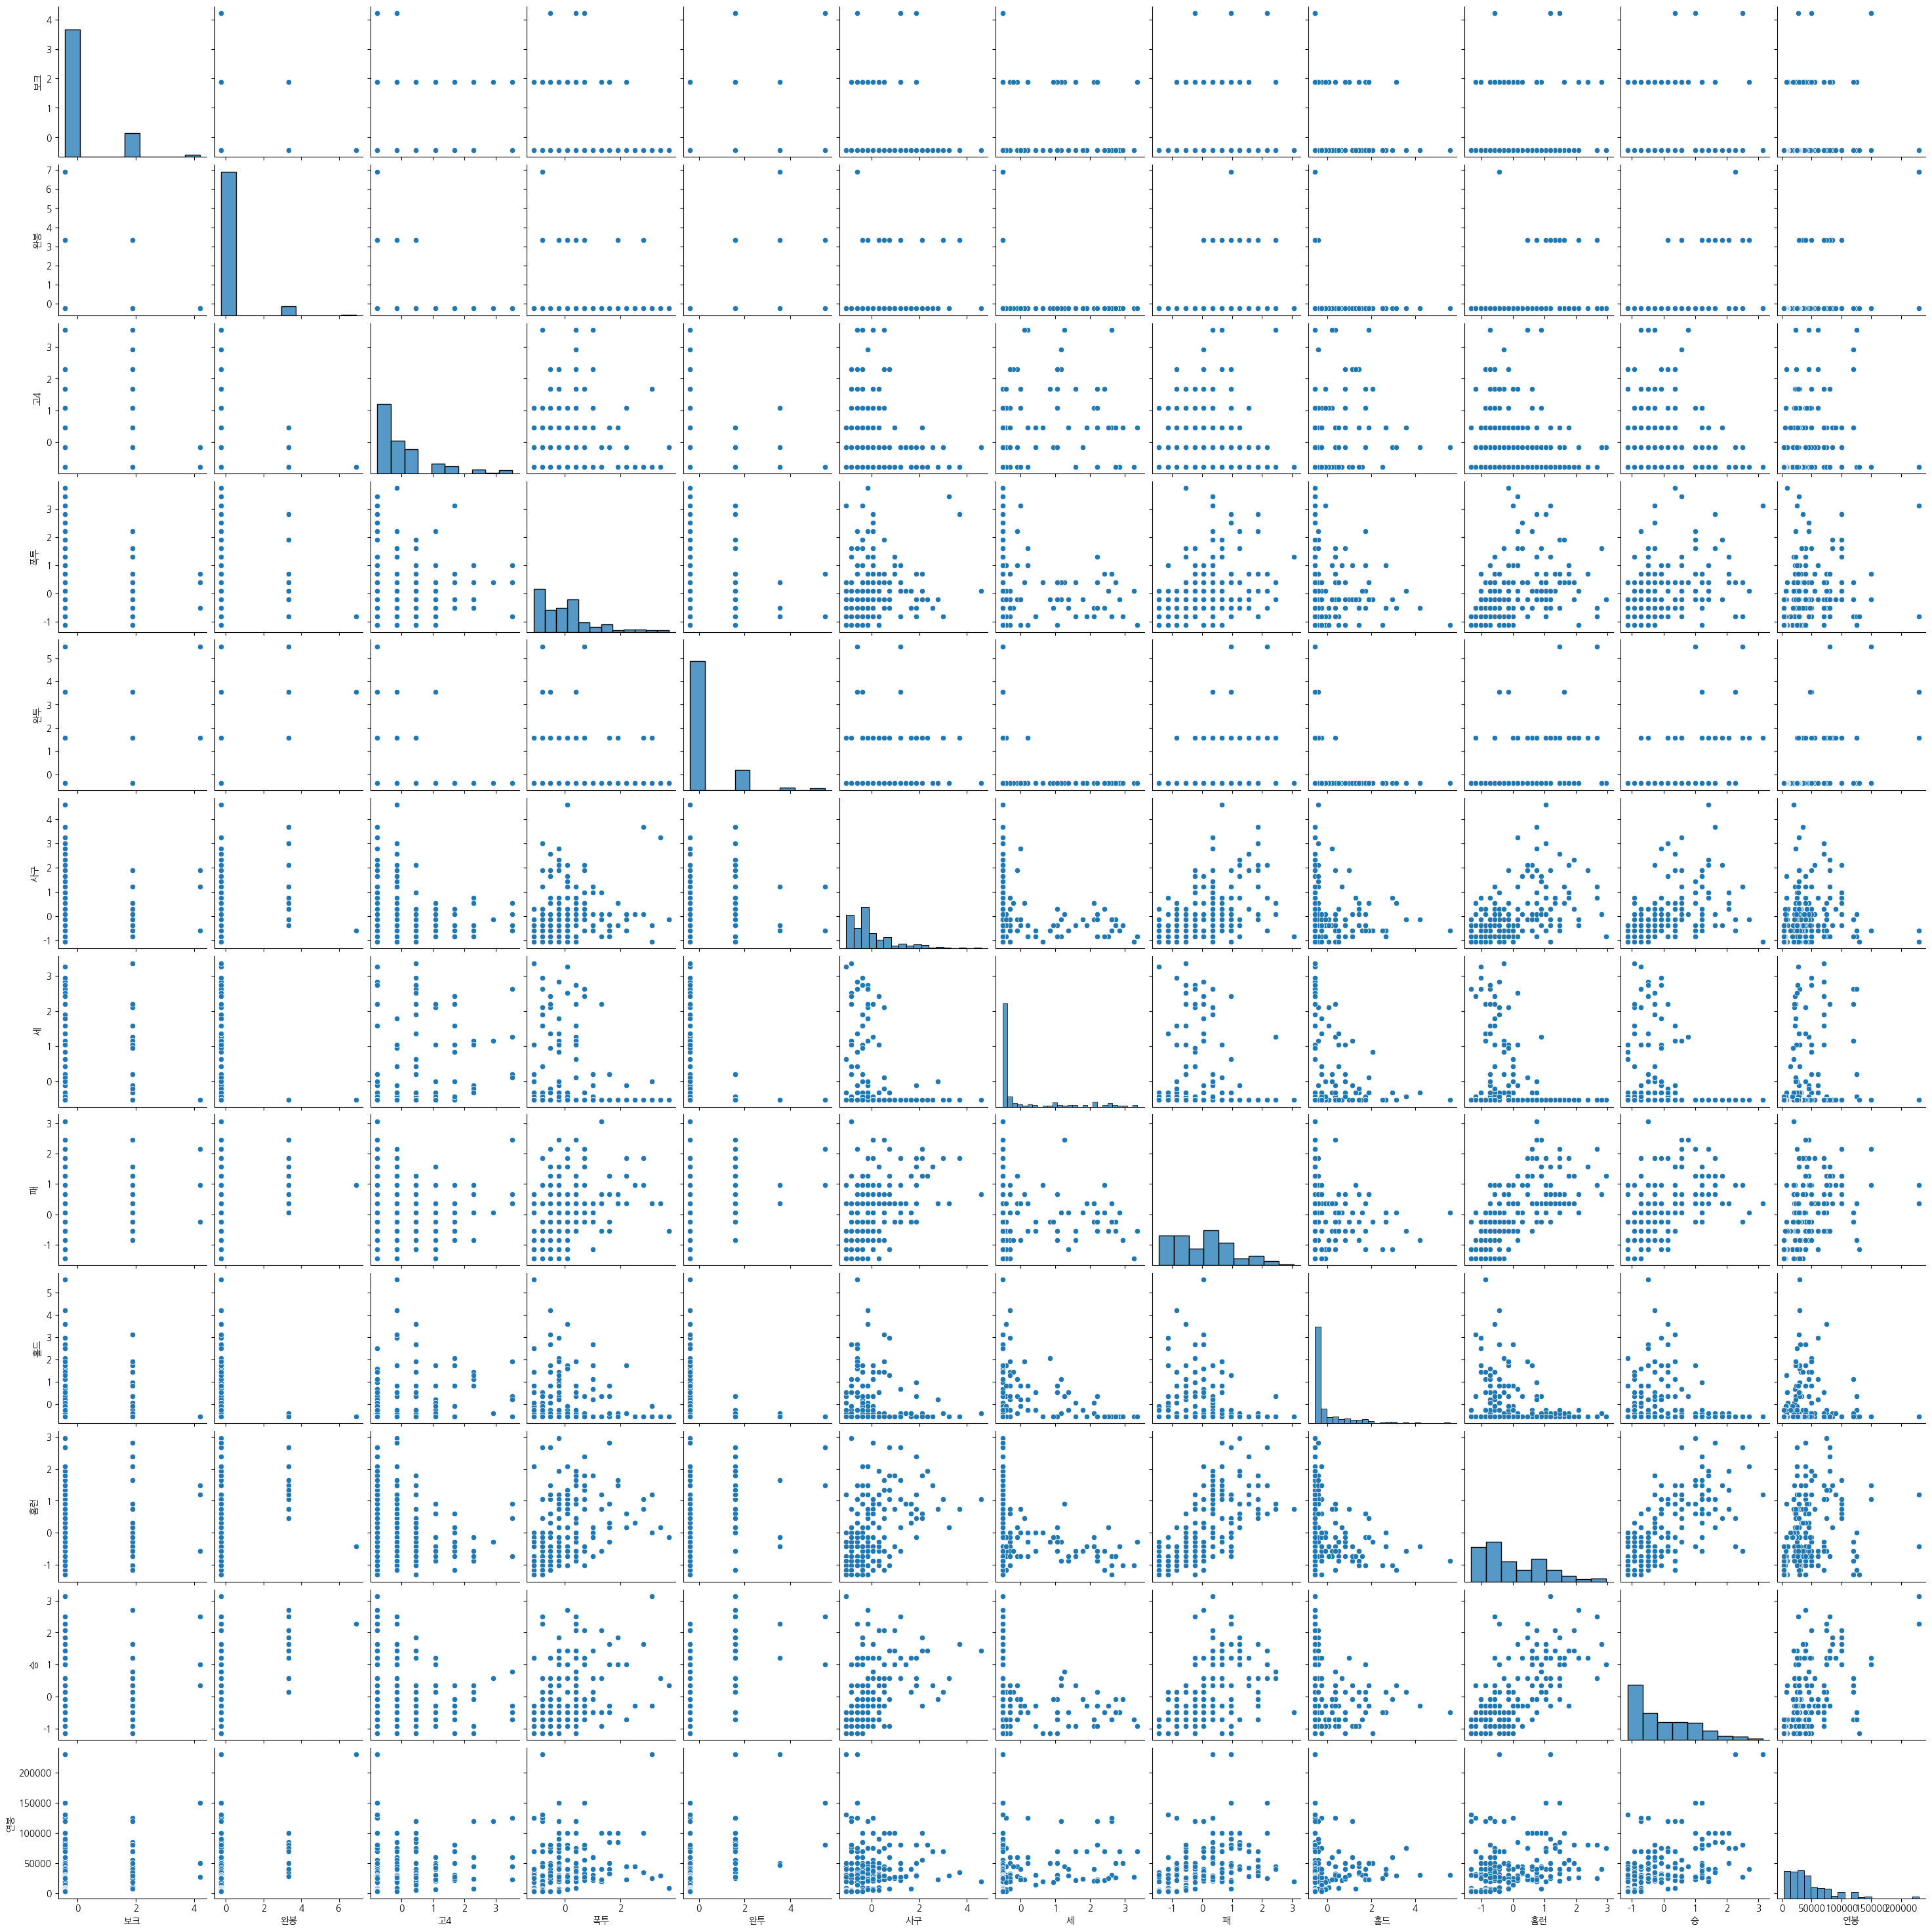

In [499]:
# VIF_factor < 10

columns = ['보크','완봉','고4','폭투','완투','사구','세','패','홀드','홈런','승', '연봉']

plt.figure(figsize=(17,17))
sns.pairplot(std_fig1.loc[:, columns]);
plt.show()

- __Feature Engineering : corr ≥ 0.4__

<Figure size 1700x1700 with 0 Axes>

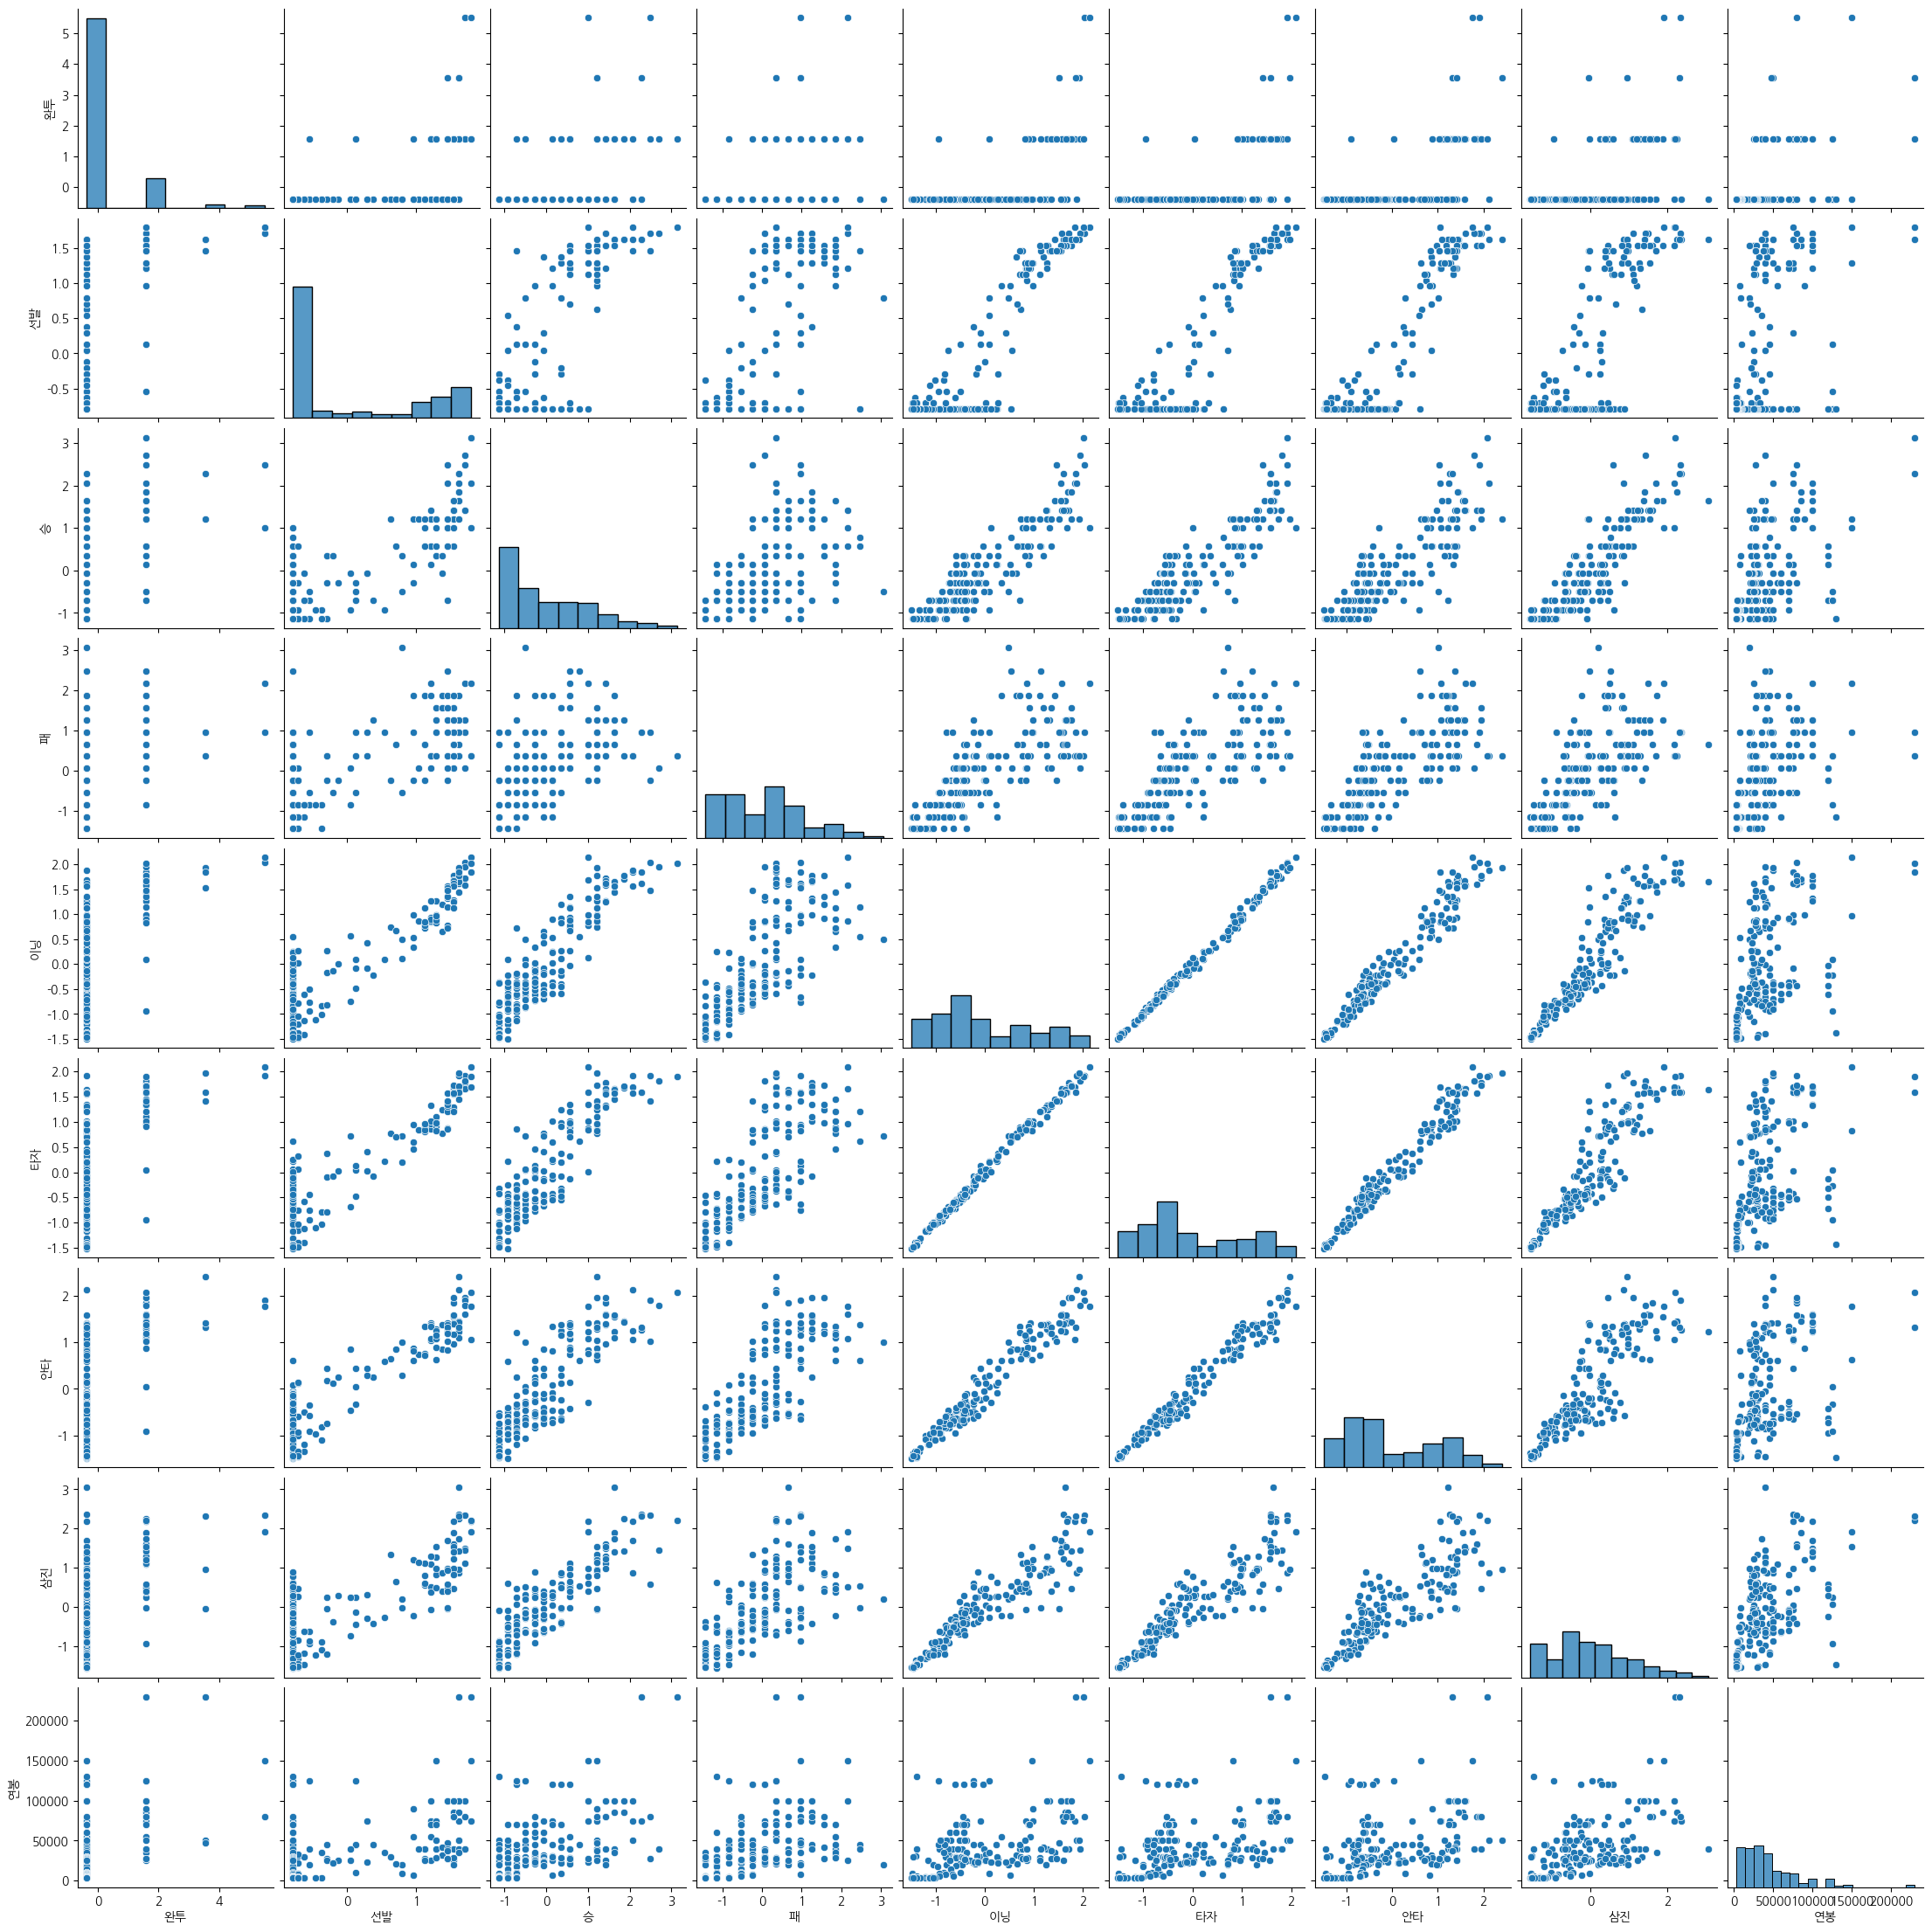

In [430]:
# corr >= 0.4

import warnings
warnings.simplefilter("ignore")

columns = ['완투','선발','승','패','이닝','타자','안타','삼진','연봉']

plt.figure(figsize=(17,17))
sns.pairplot(std_fig1.loc[:, columns]);
plt.show()

In [439]:
# 피처 각각에 대한 histogram을 출력한다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [17, 17]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력한다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

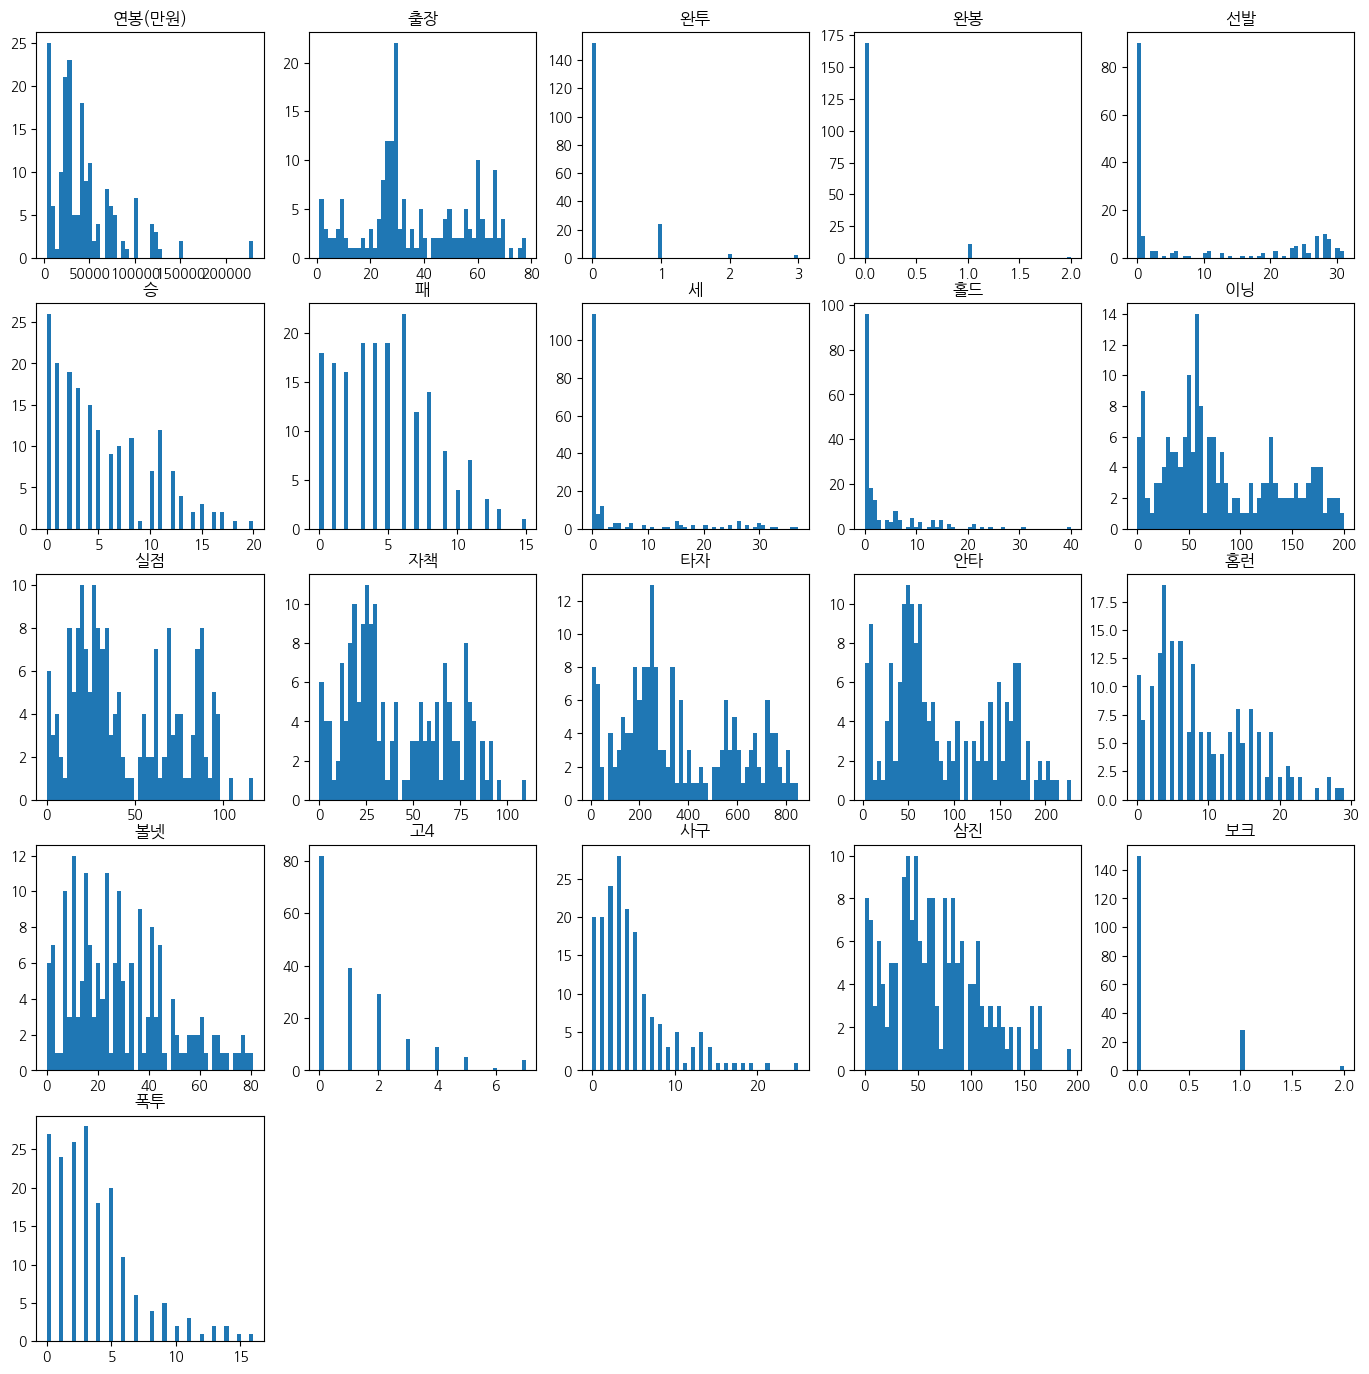

In [440]:
plot_hist_each_column(pch_fig1)

</br>


### ◾ Pitcher Features Group 2.

- 

<br></br>

# 문제 3. Predict

> 이제 2번의 데이터를 기준으로 최동원의 성적이라면 연봉이 어떨지 예측하시오.
>
> 여기서 여러분들은 어쩌면 많은 고민을 해야하고, 다시 1번 문제로 돌아갈 수도 있습니다.


</br>

## ◾ Pitcher Features Group 1.

In [480]:
pitcher_features_g1

선수    연도    팀  연봉(만원)  출장  완투  완봉  선발   승  패   세  홀드     이닝  실점  자책  \
0    윤석민  2015  KIA  125000  30   1   0  11   3  6   7   2   87.2  41  39   
1    정우람  2015   한화  120000  53   0   0   0   2  4  30   0   49.0  12  12   
2    장원준  2015   두산  100000  27   0   0  27  10  9   0   0  155.0  87  79   
3    김광현  2015   SK   85000  28   1   0  28  13  9   0   0  173.2  77  66   
4    윤성환  2015   삼성   80000  28   1   1  28  12  7   0   0  170.1  87  83   
..   ...   ...  ...     ...  ..  ..  ..  ..  .. ..  ..  ..    ...  ..  ..   
176  송은범  2020   LG   27000  63   0   0   0   2  6   1   9   60.0  38  35   
177  이영하  2020   두산   27000  29   1   0  27  17  4   0   0  163.1  70  66   
178  원종현  2020   NC   26000  60   0   0   0   3  3  31   0   60.0  31  27   
179  문승원  2020   SK   25700  26   0   0  23  11  7   0   2  144.0  63  62   
180  진해수  2020   LG   25000  73   0   0   0   3  1   0  20   43.0  17  16   

      타자   안타  홈런  볼넷  고4  사구   삼진  보크  폭투  
0    372   91   9  28   0   1   76   1   0  
1    193   33   0   9   2   4   55   0   1  
2    674  160  15  67   1   3  107   0   9  
3    749  178  10  81   1   3  145   1   9  
4    728  196  18  37   0   8  133   0   4  
..   ...  ...  ..  ..  ..  ..  ...  ..  ..  
176  281   80   6  23   4   3   36   0   3  
177  692  148   5  61   1  10   90   2   5  
178  256   62   4  17   2   3   59   0   5  
179  586  130  23  33   1   3   99   0   0  
180  188   44   2  16   0   2   38   0   0  

[181 rows x 24 columns]

In [500]:
pch_fig1 = pitcher_features_g1.iloc[:, 3:]

X = pch_fig1.drop(columns='연봉(만원)')
y = pch_fig1['연봉(만원)']


### --▶ Data Scaling

In [482]:
# 피처 각각에 대한 스케일링을 수행하는 함수를 정의한다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [501]:
std_X = standard_scaling(X, X.columns)
std_X

출장        완투        완봉        선발         승         패         세  \
0   -0.349876  1.570429 -0.256928  0.124113 -0.497069  0.355855  0.209922   
1    0.814421 -0.389900 -0.256928 -0.787725 -0.710267 -0.243305  2.617380   
2   -0.501741 -0.389900 -0.256928  1.450422  0.995315  1.254594 -0.522782   
3   -0.451120  1.570429 -0.256928  1.533317  1.634909  1.254594 -0.522782   
4   -0.451120  1.570429  3.320298  1.533317  1.421711  0.655434 -0.522782   
..        ...       ...       ...       ...       ...       ...       ...   
176  1.320637 -0.389900 -0.256928 -0.787725 -0.710267  0.355855 -0.418110   
177 -0.400498  1.570429 -0.256928  1.450422  2.487700 -0.243305 -0.522782   
178  1.168772 -0.389900 -0.256928 -0.787725 -0.497069 -0.542885  2.722052   
179 -0.552363 -0.389900 -0.256928  1.118845  1.208513  0.655434 -0.522782   
180  1.826853 -0.389900 -0.256928 -0.787725 -0.497069 -1.142045 -0.522782   

           홀드        이닝        실점        자책        타자        안타        홈런  \
0   -0.245827  0.088354 -0.134617 -0.073750  0.048116  0.040986  0.012206   
1   -0.551632 -0.603883 -1.125648 -1.094754 -0.714192 -0.957312 -1.313351   
2   -0.551632  1.316986  1.437364  1.438849  1.334245  1.228616  0.895911   
3   -0.551632  1.646795  1.095629  0.947255  1.653648  1.538432  0.159490   
4   -0.551632  1.590619  1.437364  1.590109  1.564215  1.848249  1.337763   
..        ...       ...       ...       ...       ...       ...       ...   
176  0.824491 -0.404548 -0.237138 -0.225010 -0.339426 -0.148347 -0.429646   
177 -0.551632  1.463769  0.856414  0.947255  1.410902  1.022071 -0.576931   
178 -0.551632 -0.404548 -0.476352 -0.527529 -0.445893 -0.458163 -0.724215   
179 -0.245827  1.117650  0.617200  0.795995  0.959479  0.712255  2.074183   
180  2.506420 -0.712612 -0.954781 -0.943494 -0.735485 -0.767980 -1.018783   

           볼넷        고4        사구        삼진        보크        폭투  
0   -0.033843 -0.773974 -0.826513  0.248939  1.879402 -1.111361  
1   -1.011883  0.454880 -0.150615 -0.250911 -0.434692 -0.809777  
2    1.973713 -0.159547 -0.375914  0.986812 -0.434692  1.602892  
3    2.694374 -0.159547 -0.375914  1.891302  1.879402  1.602892  
4    0.429439 -0.773974  0.750583  1.605674 -0.434692  0.094974  
..        ...       ...       ...       ...       ...       ...  
176 -0.291222  1.683733 -0.375914 -0.703156 -0.434692 -0.206610  
177  1.664858 -0.159547  1.201182  0.582172  4.193496  0.396558  
178 -0.600077  0.454880 -0.375914 -0.155702 -0.434692  0.396558  
179  0.223536 -0.159547 -0.375914  0.796393 -0.434692 -1.111361  
180 -0.651553 -0.773974 -0.601213 -0.655551 -0.434692 -1.111361  

[181 rows x 20 columns]

### --▶ Data Split

In [455]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(std_X, y, test_size=0.2, random_state=17)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((144, 20), (144,), (37, 20), (37,))

### --▶ Add Constant

In [456]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
X_train_const

const        출장        완투        완봉        선발         승         패  \
94     1.0 -0.401609  1.574785  3.329508  1.620694  1.853233  1.258074   
80     1.0 -0.401609  1.574785  3.329508  1.620694  1.639444  1.858896   
64     1.0 -0.503133 -0.390981 -0.257641  1.454446  2.067022  0.356842   
179    1.0 -0.553895 -0.390981 -0.257641  1.121948  1.211865  0.657253   
137    1.0 -1.366088 -0.390981 -0.257641 -0.789911 -1.139815 -1.445624   
..     ...       ...       ...       ...       ...       ...       ...   
57     1.0 -0.198561 -0.390981 -0.257641 -0.124916 -0.284658 -0.243980   
150    1.0 -1.467612 -0.390981 -0.257641 -0.789911 -0.926026 -1.445624   
134    1.0 -0.198561 -0.390981 -0.257641 -0.706786 -0.926026 -0.243980   
143    1.0 -1.772184 -0.390981 -0.257641 -0.789911 -1.139815 -1.145213   
111    1.0 -0.452371 -0.390981 -0.257641  1.537570  1.425655  0.356842   

            세        홀드        이닝        실점        자책        타자        안타  \
94  -0.524232 -0.553162  1.776748  0.858790  0.836123  1.705211  1.439141   
80  -0.524232 -0.553162  1.431486  1.304278  1.367001  1.453250  1.093946   
64  -0.524232 -0.553162  1.556871  0.721717  0.798203  1.564283  1.249284   
179 -0.524232 -0.246509  1.120751  0.618912  0.798203  0.962141  0.714231   
137 -0.524232 -0.553162 -1.385123 -1.402917 -1.439070 -1.399456 -1.374202   
..        ...       ...       ...       ...       ...       ...       ...   
57  -0.524232 -0.399835  0.012278  0.379034  0.570684  0.026897  0.248217   
150 -0.524232 -0.553162 -1.328791 -1.300112 -1.325310 -1.361021 -1.339683   
134 -0.524232 -0.093182 -0.787275 -0.443405 -0.453153 -0.758878 -0.597512   
143 -0.524232 -0.553162 -1.457810 -1.265844 -1.249470 -1.476325 -1.391462   
111 -0.524232 -0.553162  1.613203  0.995863  1.101562  1.555742  1.404622   

           홈런        볼넷        고4        사구        삼진        보크        폭투  
94   0.455318  1.153290  0.456141  2.108212  1.419180 -0.435897 -0.207183  
80   0.750703  2.134043 -0.776121  3.689683  1.729470 -0.435897  2.817020  
64   0.750703  2.443755 -0.776121  0.978590  1.705601 -0.435897  1.304919  
179  2.079937  0.224156 -0.159990 -0.376957  0.798602 -0.435897 -1.114444  
137 -1.316994 -1.324402 -0.776121 -0.376957 -1.468895 -0.435897 -1.114444  
..        ...       ...       ...       ...       ...       ...       ...  
57   1.193781 -0.085556 -0.159990 -0.376957  0.297366 -0.435897  0.095237  
150 -1.169302 -1.272783 -0.776121 -0.828806 -1.468895 -0.435897 -0.509603  
134 -0.135453 -0.859834 -0.776121  0.074892 -0.848317  1.884615 -0.812024  
143 -1.316994 -1.427639 -0.776121 -1.054730 -1.564369 -0.435897 -1.114444  
111  1.784552  1.411383  0.456141  0.978590  1.228233 -0.435897  1.002498  

[144 rows x 21 columns]

### --▶ OLS

In [458]:
lr_model = sm.OLS(y_train, X_train_const).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 연봉(만원)   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     8.243
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.01e-14
Time:                        00:52:49   Log-Likelihood:                -1667.6
No. Observations:                 144   AIC:                             3377.
Df Residuals:                     123   BIC:                             3440.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.475e+04   2361.580     18.950      0.000    4.01e+04    4.94e+04
출장         -1874.4064   7977.509     -0.235      0.815   -1.77e+04    1.39e+04
완투          6302.6797   3744.558      1.683      0.095   -1109.442    1.37e+04
완봉         -1804.2734   2976.175     -0.606      0.545   -7695.429    4086.882
선발          1.122e+04   1.51e+04      0.745      0.458   -1.86e+04     4.1e+04
승           1.547e+04   7056.851      2.192      0.030    1498.728    2.94e+04
패           1.232e+04   4443.056      2.773      0.006    3527.441    2.11e+04
세           4998.2319   4771.596      1.047      0.297   -4446.850    1.44e+04
홀드          3044.1094   4604.094      0.661      0.510   -6069.412    1.22e+04
이닝           9.09e+04   1.23e+05      0.741      0.460   -1.52e+05    3.34e+05
실점          8.382e+04   3.09e+04      2.713      0.008    2.27e+04    1.45e+05
자책         -9.518e+04   2.81e+04     -3.385      0.001   -1.51e+05   -3.95e+04
타자          -1.41e+05    1.7e+05     -0.831      0.408   -4.77e+05    1.95e+05
안타          3.213e+04   3.99e+04      0.806      0.422   -4.68e+04    1.11e+05
홈런         -4509.4811   5828.146     -0.774      0.441    -1.6e+04    7026.977
볼넷         -2310.3273   1.33e+04     -0.174      0.862   -2.86e+04     2.4e+04
고4          3612.1173   3411.949      1.059      0.292   -3141.626    1.04e+04
사구         -8697.3727   4430.512     -1.963      0.052   -1.75e+04      72.554
삼진          2.359e+04   7783.383      3.030      0.003    8179.330     3.9e+04
보크         -1523.5031   2444.713     -0.623      0.534   -6362.662    3315.656
폭투          1168.1813   3396.684      0.344      0.731   -5555.346    7891.708
==============================================================================
Omnibus:                       15.541   Durbin-Watson:                   2.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.290
Skew:                           0.699   Prob(JB):                     0.000107
Kurtosis:                       4.046   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

👉 해석 : 피처 영향력 시각화

- 위 실행 결과에선 결정계수(R-squared), 혹은 수정 결정계수(Adj.R-squared)라는 점수를 눈여겨 볼 필요가 있다. 
- 이 점수들은 회귀 분석이 얼마나 잘 되었는지 평가하는 지표이며, '회귀 분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명하는가?' 에 대한 점수이다.
- 이 점수들이 1에 가까울 수록 데이터를 잘 설명하는 모델이라고 할 수 있다.<br></br>

- 다음으로 F 통계량(F-statistic)이라는 수치를 살펴본다.
- F 통계량은 회귀식의 유의성 검정에 사용되는 값으로 F 통계량에 대한 p-value인 Prob(F-statistic) 수치외 함께 살펴봐야 한다.
- 일반적으로 p-value가 0.05 이하면 'F 통계량이 유의한 의미를 가진다'라는 결론을 내려도 무방하다.
- 또한 P>|t| 라는 정보는 각 피처의 검정 통계량(t-statistic) 이 얼마나 유의미한지에 대한 p-value를 나타낸다.
- 위 분석에서 회귀 분석에서 유의미한 피처들이라는 결론을 내릴 수 있는 0.05 미만의 p-value를 가진 피처들은...

	'승', '패', '실점', '자책', '삼진' 4개가 유의미한 피처들이라고 결론을 내릴 수 있다.

<br></br>

◼ 어떤 피처가 가장 영향력이 강한 피처일까??

[Text(0, 0, 'const'),
 Text(1, 0, '출장'),
 Text(2, 0, '완투'),
 Text(3, 0, '완봉'),
 Text(4, 0, '선발'),
 Text(5, 0, '승'),
 Text(6, 0, '패'),
 Text(7, 0, '세'),
 Text(8, 0, '홀드'),
 Text(9, 0, '이닝'),
 Text(10, 0, '실점'),
 Text(11, 0, '자책'),
 Text(12, 0, '타자'),
 Text(13, 0, '안타'),
 Text(14, 0, '홈런'),
 Text(15, 0, '볼넷'),
 Text(16, 0, '고4'),
 Text(17, 0, '사구'),
 Text(18, 0, '삼진'),
 Text(19, 0, '보크'),
 Text(20, 0, '폭투')]

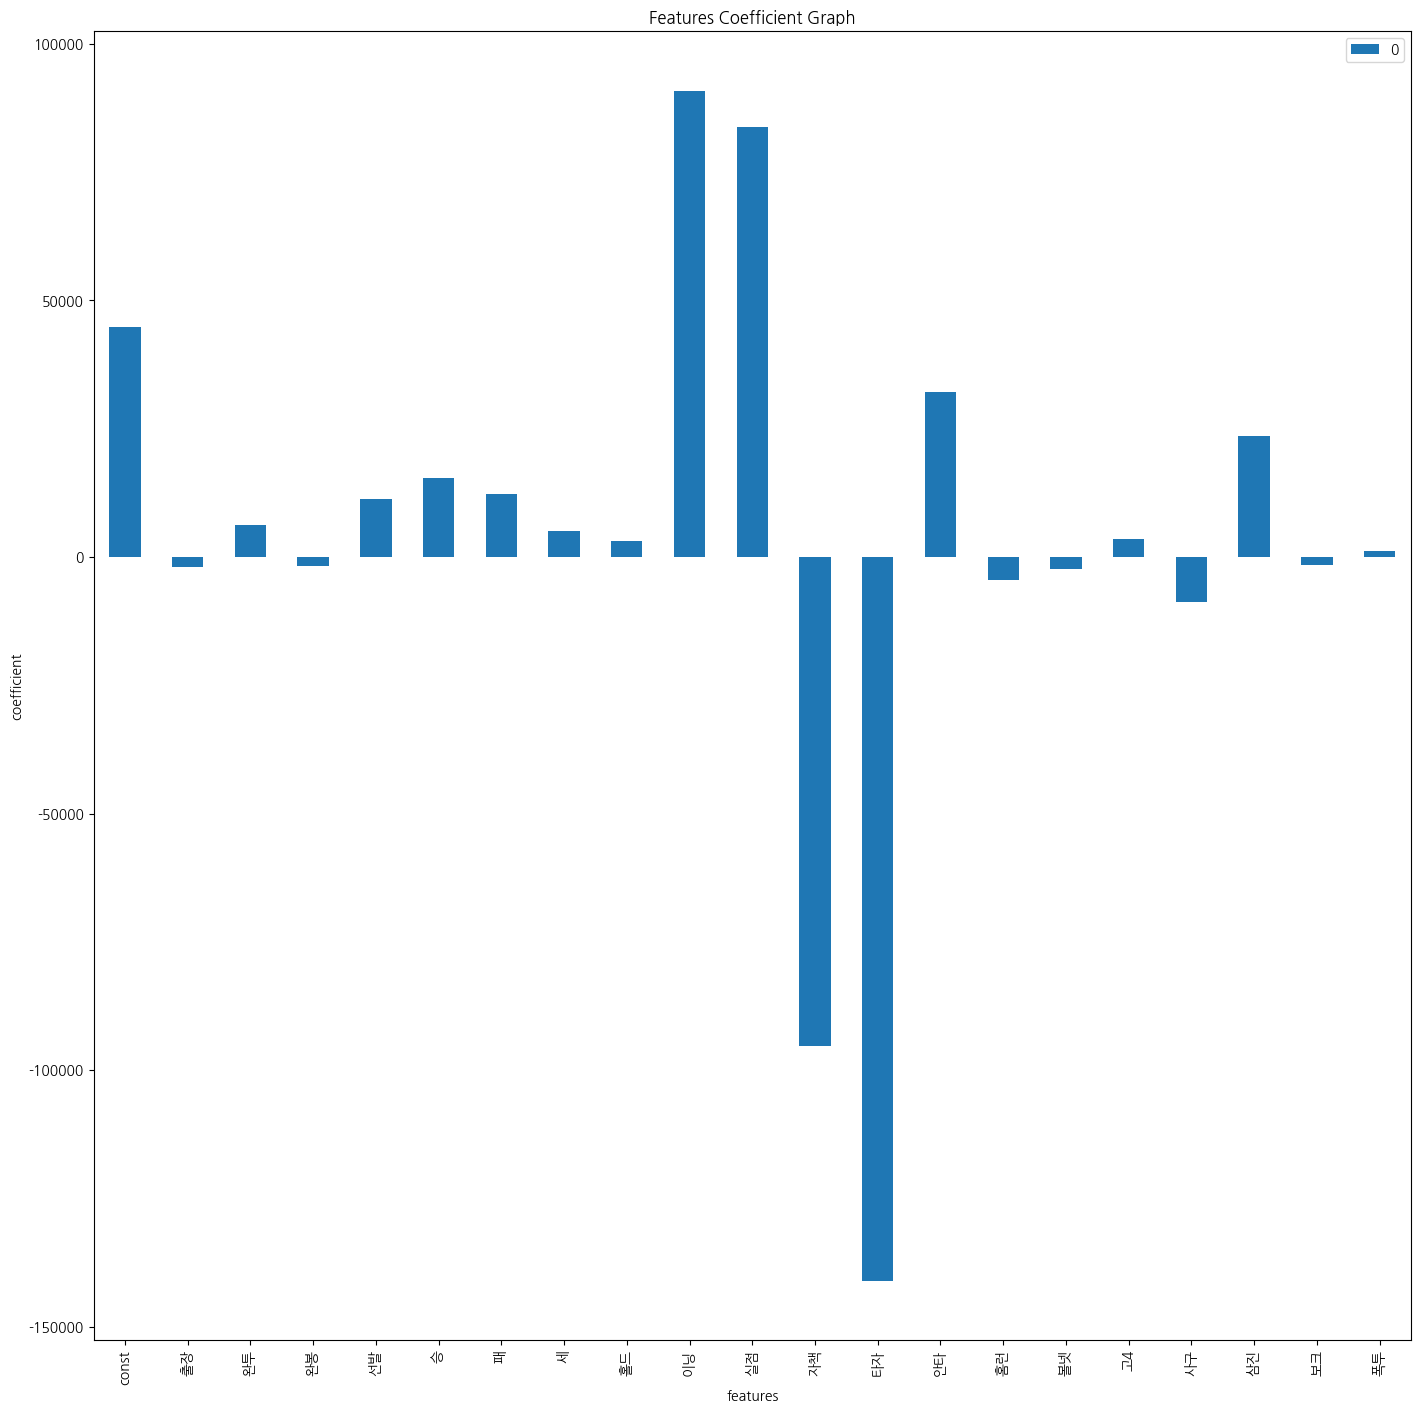

In [459]:
# 회귀 계수를 리스트로 반환한다.
coefs = lr_model.params.to_frame()

# 변수명을 리스트로 반환한다.
x_labels = lr_model.params.index.to_list()

# 회귀 계수를 출력한다.
ax = coefs.plot(kind='bar')
ax.set_title("Features Coefficient Graph")
ax.set_xlabel("features")
ax.set_ylabel("coefficient")
ax.set_xticklabels(x_labels)

👉 해석

- 시각화한 결과 '이닝','실점','자책','타자' 피처가 가장 영향력이 큰 것으로 보인다.

In [531]:
coefs_rlt = coefs.iloc[1:, :]
coefs_rlt = coefs_rlt.rename(columns={0:'Coef'})
coefs_rlt.sort_values(by='Coef')

Coef
타자 -140992.639217
자책  -95184.176747
사구   -8697.372728
홈런   -4509.481050
볼넷   -2310.327275
출장   -1874.406392
완봉   -1804.273426
보크   -1523.503127
폭투    1168.181342
홀드    3044.109386
고4    3612.117315
세     4998.231940
완투    6302.679721
선발   11218.709514
패    12322.198404
승    15467.331980
삼진   23586.059471
안타   32134.756133
실점   83824.547823
이닝   90899.443556

◼ 참 값 $\,vs.$ 예측 값

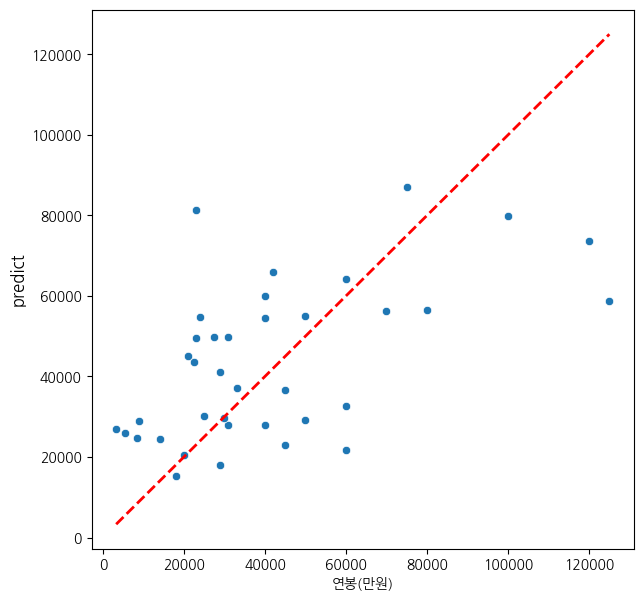

In [461]:
pred = lr_model.predict(X_test_const)

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='--', lw=2);
plt.ylabel('predict', fontsize=12)
plt.show()

👉 해석

- 형편없군...ㅠㅠ

### --▶ R2 score : 예측 모델 평가 1.

- 수정 결정 계수(R2 score)를 sklearn의 LinearRegression 클래스로 출력해 본다.

In [464]:
from sklearn.linear_model import LinearRegression

# 학습 데이터와 테스트 데이터로 분리한 후 회귀 분석 모델을 학습한다.
lreg = LinearRegression()
lreg.fit(X_train, y_train)

#회귀 분석 모델을 평가한다.
print(lreg.score(X_train, y_train)) # train R2 score 촐력
print(lreg.score(X_test, y_test))   # test R2 score 출력

0.5727045941955082
0.3050721949870495


👉 폭망 수준이군...

- 실행 결과의 각 값은 학습 데이터셋과 테스트 데이터셋에 대한 평가 점수를 의미하며, 이 두 점수는 최대한 벌어지지 않는 것이 좋다. 
- 만약 학습 점수가 테스트 점수에 비해 높다면 과적합이 발생한 것이다.

- 회귀 모델을 평가할 때는 RMSE score라는 측정 지표를 활용할 수도 있다.
- 이 점수는 실제값과 예측값의 차이를 절대적인 수치로 나타낸 것이다.
- 이 값이 높으면 높을수록 예측이 부정확하다는 것을 의미한다.


</br>

◼ 참 값 $\,vs.$ 예측 값

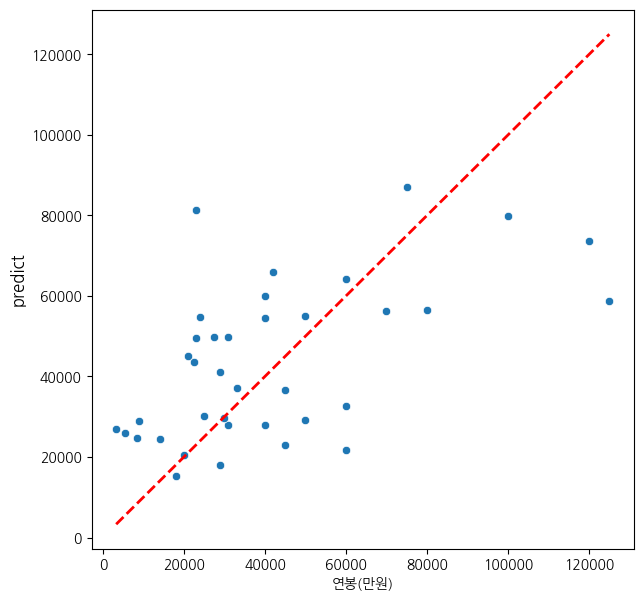

In [465]:
pred = lreg.predict(X_test)

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='--', lw=2);
plt.ylabel('predict', fontsize=12)
plt.show()

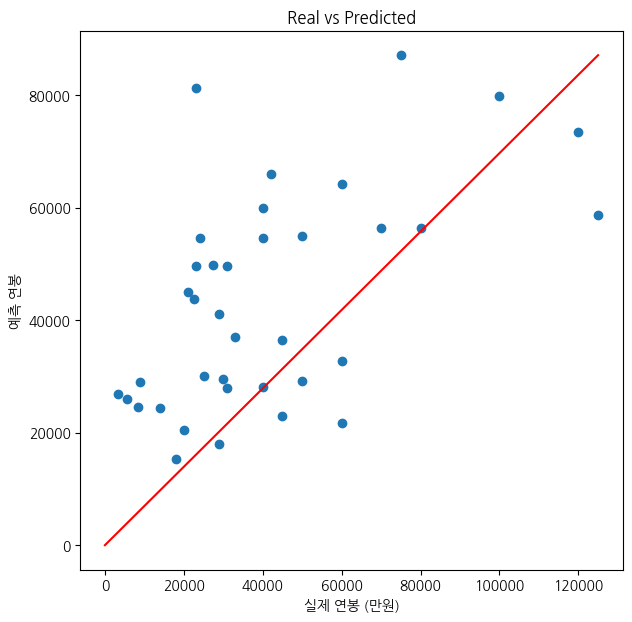

In [472]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, pred_test)
plt.xlabel("실제 연봉 (만원)")
plt.ylabel("예측 연봉")
plt.title("Real vs Predicted")
plt.plot([0,max(y_test)], [0,max(pred_test)], 'r')
plt.show()

### --▶ MSE : 예측 모델 평가 2.

- 수치적으로 해석하기 어려우므로 RMSE가 더 나을 것 같다.

In [466]:
from sklearn.metrics import mean_squared_error

pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print("MSE train :", mean_squared_error(y_train, pred_train))
print("MSE test :", mean_squared_error(y_test, pred_test))

MSE train : 670565903.4274564
MSE test : 578934983.744689


### --▶ RMSE : 예측 모델 평가 3.

In [468]:
import numpy as np

print("RMSE train:", np.sqrt(mean_squared_error(y_train, pred_train)))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, pred_test)))

RMSE train: 25895.28728219589
RMSE test: 24061.067801423298


### --▶ Feature Engineering

1. 의미있고 영향력이 컸던 '승', '패', '이닝', '실점', '자책', '타자', '삼진' 특성으로 다시 모델 학습

In [502]:
columns = ['승', '패', '이닝', '실점', '자책', '타자', '삼진']
X = std_X[columns]
X

승         패        이닝        실점        자책        타자        삼진
0   -0.497069  0.355855  0.088354 -0.134617 -0.073750  0.048116  0.248939
1   -0.710267 -0.243305 -0.603883 -1.125648 -1.094754 -0.714192 -0.250911
2    0.995315  1.254594  1.316986  1.437364  1.438849  1.334245  0.986812
3    1.634909  1.254594  1.646795  1.095629  0.947255  1.653648  1.891302
4    1.421711  0.655434  1.590619  1.437364  1.590109  1.564215  1.605674
..        ...       ...       ...       ...       ...       ...       ...
176 -0.710267  0.355855 -0.404548 -0.237138 -0.225010 -0.339426 -0.703156
177  2.487700 -0.243305  1.463769  0.856414  0.947255  1.410902  0.582172
178 -0.497069 -0.542885 -0.404548 -0.476352 -0.527529 -0.445893 -0.155702
179  1.208513  0.655434  1.117650  0.617200  0.795995  0.959479  0.796393
180 -0.497069 -1.142045 -0.712612 -0.954781 -0.943494 -0.735485 -0.655551

[181 rows x 7 columns]

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 연봉(만원)   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     18.69
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.67e-17
Time:                        02:34:17   Log-Likelihood:                -1680.3
No. Observations:                 144   AIC:                             3377.
Df Residuals:                     136   BIC:                             3400.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.505e+04   2434.454     18.506      0.0

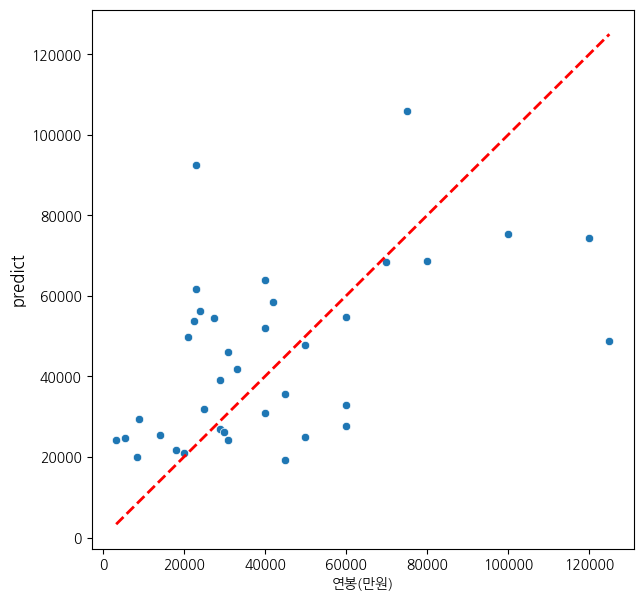

In [486]:
pred = ols_model.predict(X_test_const)

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='--', lw=2);
plt.ylabel('predict', fontsize=12)
plt.show()

In [487]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

#회귀 분석 모델을 평가한다.
print(lreg.score(X_train, y_train)) # train R2 score 촐력
print(lreg.score(X_test, y_test))   # test R2 score 출력

0.4903115722345843
0.1636619039713183


In [488]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print("RMSE train:", np.sqrt(mean_squared_error(y_train, pred_train)))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, pred_test)))

RMSE train: 28281.927743332097
RMSE test: 26395.870706832153


2. 다중 공선성(multicollinearity)이 큰 요소를 제거하고 다시 모델 학습

In [552]:
columns = ['보크','완봉','고4','폭투','완투','사구','세','패','홀드','홈런','승']
X = std_X[columns]
X

보크        완봉        고4        폭투        완투        사구         세  \
0    1.879402 -0.256928 -0.773974 -1.111361  1.570429 -0.826513  0.209922   
1   -0.434692 -0.256928  0.454880 -0.809777 -0.389900 -0.150615  2.617380   
2   -0.434692 -0.256928 -0.159547  1.602892 -0.389900 -0.375914 -0.522782   
3    1.879402 -0.256928 -0.159547  1.602892  1.570429 -0.375914 -0.522782   
4   -0.434692  3.320298 -0.773974  0.094974  1.570429  0.750583 -0.522782   
..        ...       ...       ...       ...       ...       ...       ...   
176 -0.434692 -0.256928  1.683733 -0.206610 -0.389900 -0.375914 -0.418110   
177  4.193496 -0.256928 -0.159547  0.396558  1.570429  1.201182 -0.522782   
178 -0.434692 -0.256928  0.454880  0.396558 -0.389900 -0.375914  2.722052   
179 -0.434692 -0.256928 -0.159547 -1.111361 -0.389900 -0.375914 -0.522782   
180 -0.434692 -0.256928 -0.773974 -1.111361 -0.389900 -0.601213 -0.522782   

            패        홀드        홈런         승  
0    0.355855 -0.245827  0.012206 -0.497069  
1   -0.243305 -0.551632 -1.313351 -0.710267  
2    1.254594 -0.551632  0.895911  0.995315  
3    1.254594 -0.551632  0.159490  1.634909  
4    0.655434 -0.551632  1.337763  1.421711  
..        ...       ...       ...       ...  
176  0.355855  0.824491 -0.429646 -0.710267  
177 -0.243305 -0.551632 -0.576931  2.487700  
178 -0.542885 -0.551632 -0.724215 -0.497069  
179  0.655434 -0.245827  2.074183  1.208513  
180 -1.142045  2.506420 -1.018783 -0.497069  

[181 rows x 11 columns]

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 연봉(만원)   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     9.778
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           8.65e-13
Time:                        03:19:48   Log-Likelihood:                -1685.9
No. Observations:                 144   AIC:                             3396.
Df Residuals:                     132   BIC:                             3432.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.454e+04   2580.905     17.258      0.0

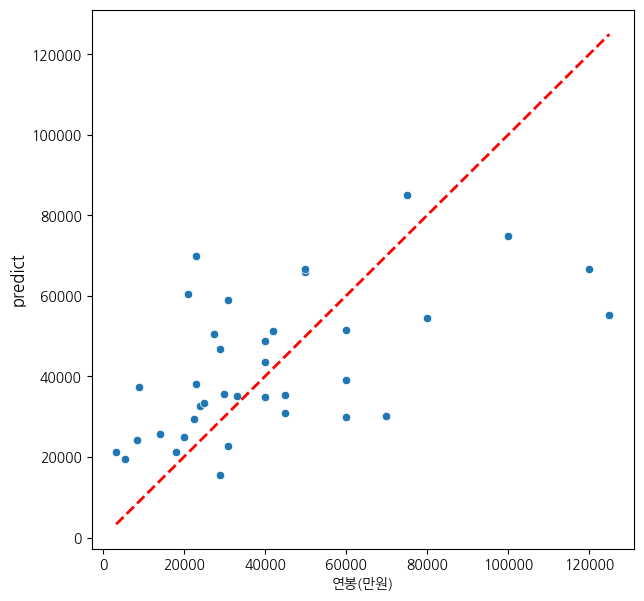

In [506]:
pred = ols_model.predict(X_test_const)

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='--', lw=2);
plt.ylabel('predict', fontsize=12)
plt.show()

In [554]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

#회귀 분석 모델을 평가한다.
print(lreg.score(X_train, y_train)) # train R2 score 촐력
print(lreg.score(X_test, y_test))   # test R2 score 출력

0.44898052271153877
0.3207708852528455


In [555]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print("RMSE train:", np.sqrt(mean_squared_error(y_train, pred_train)))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, pred_test)))

RMSE train: 29406.2805957069
RMSE test: 23787.74088832369


3. 영향력 + 다중 공선성

- columns = ['승', '패', '실점', '자책', '보크', '완봉', '고4', '폭투'] --> 최악~!

In [548]:
columns = ['보크','완투','세','패','홀드','홈런','승','이닝','삼진']
X = std_X[columns]
X

보크        완투         세         패        홀드        홈런         승  \
0    1.879402  1.570429  0.209922  0.355855 -0.245827  0.012206 -0.497069   
1   -0.434692 -0.389900  2.617380 -0.243305 -0.551632 -1.313351 -0.710267   
2   -0.434692 -0.389900 -0.522782  1.254594 -0.551632  0.895911  0.995315   
3    1.879402  1.570429 -0.522782  1.254594 -0.551632  0.159490  1.634909   
4   -0.434692  1.570429 -0.522782  0.655434 -0.551632  1.337763  1.421711   
..        ...       ...       ...       ...       ...       ...       ...   
176 -0.434692 -0.389900 -0.418110  0.355855  0.824491 -0.429646 -0.710267   
177  4.193496  1.570429 -0.522782 -0.243305 -0.551632 -0.576931  2.487700   
178 -0.434692 -0.389900  2.722052 -0.542885 -0.551632 -0.724215 -0.497069   
179 -0.434692 -0.389900 -0.522782  0.655434 -0.245827  2.074183  1.208513   
180 -0.434692 -0.389900 -0.522782 -1.142045  2.506420 -1.018783 -0.497069   

           이닝        삼진  
0    0.088354  0.248939  
1   -0.603883 -0.250911  
2    1.316986  0.986812  
3    1.646795  1.891302  
4    1.590619  1.605674  
..        ...       ...  
176 -0.404548 -0.703156  
177  1.463769  0.582172  
178 -0.404548 -0.155702  
179  1.117650  0.796393  
180 -0.712612 -0.655551  

[181 rows x 9 columns]

In [549]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 연봉(만원)   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     11.65
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.18e-13
Time:                        03:18:15   Log-Likelihood:                -1687.2
No. Observations:                 144   AIC:                             3394.
Df Residuals:                     134   BIC:                             3424.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.507e+04   2578.352     17.482      0.0

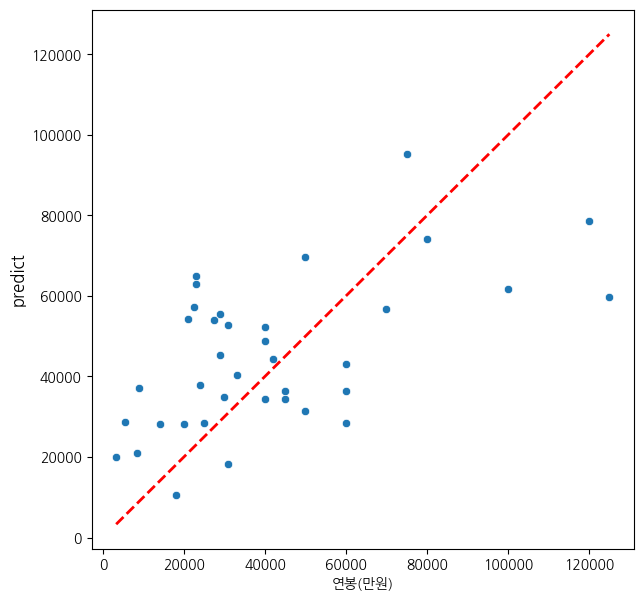

In [550]:
pred = ols_model.predict(X_test_const)

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='--', lw=2);
plt.ylabel('predict', fontsize=12)
plt.show()

In [551]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

#회귀 분석 모델을 평가한다.
print(lreg.score(X_train, y_train)) # train R2 score 촐력
print(lreg.score(X_test, y_test))   # test R2 score 출력

0.43891470799766896
0.3052496331283111


In [547]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print("RMSE train:", np.sqrt(mean_squared_error(y_train, pred_train)))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, pred_test)))

RMSE train: 29421.824348250007
RMSE test: 23745.415803084066


### --▶ 예측 결과 시각화

- 다중 공선성으로 선택한 피처로 학습한 모델이 그나마 제일 낫다

In [557]:
report_df = pitcher_features_g1[['선수','연봉(만원)']]
report_df

선수  연봉(만원)
0    윤석민  125000
1    정우람  120000
2    장원준  100000
3    김광현   85000
4    윤성환   80000
..   ...     ...
176  송은범   27000
177  이영하   27000
178  원종현   26000
179  문승원   25700
180  진해수   25000

[181 rows x 2 columns]

In [561]:
columns = ['보크','완봉','고4','폭투','완투','사구','세','패','홀드','홈런','승']
X = std_X[columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

lreg = LinearRegression()
lreg.fit(X_train, y_train)

predict_salary = pd.Series(lreg.predict(X)).round(1)

report_df['예측연봉'] = predict_salary
report_df.head(15)

선수  연봉(만원)      예측연봉
0   윤석민  125000   55332.9
1   정우람  120000   56986.3
2   장원준  100000   70405.4
3   김광현   85000  102639.2
4   윤성환   80000   70417.2
5   양현종   75000   97753.5
6   장원삼   75000   55136.4
7   안지만   75000   48010.2
8   손승락   70000   62496.2
9   이동현   60000   29949.1
10  배영수   55000   57321.6
11  임창용   50000   66036.6
12  윤길현   50000   41209.1
13  송은범   45000   37974.0
14   권혁   45000   37145.0

<Axes: xlabel='선수'>

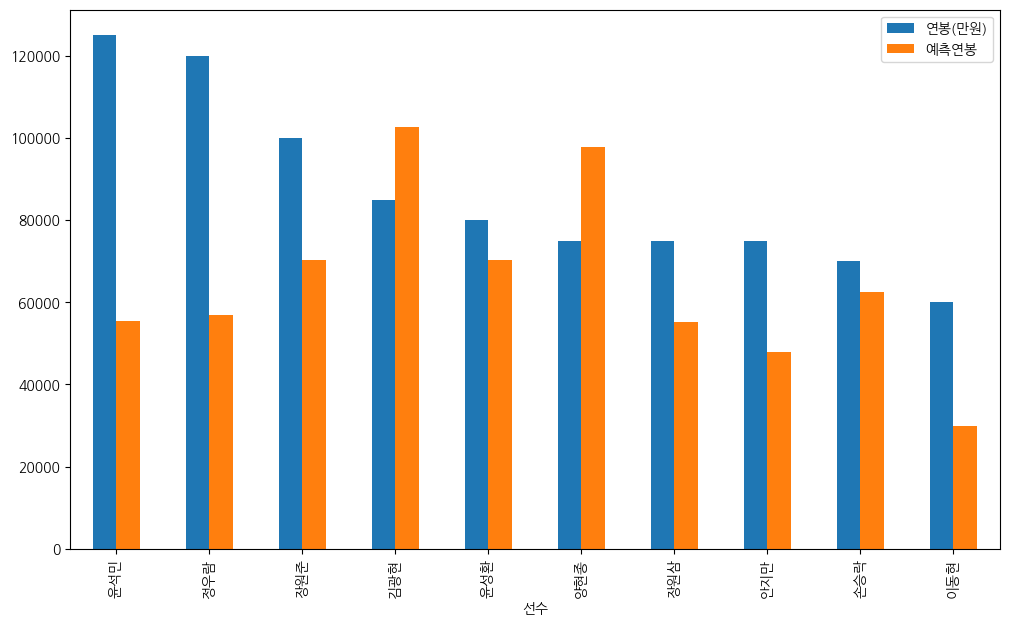

In [564]:
report_df.iloc[:10, :].plot(x='선수', y=['연봉(만원)','예측연봉'], kind='bar', figsize=(12,7))

</br>

## ◾ Pitcher Features Group 2.